# 全链接网络

## 鸢尾花数据识别

In [1]:
% matplotlib inline
import  tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

INPUT_SIZE = 4      
OUTPUT_SIZE = 3      # 输出的维数长度（比如鸢尾花有3类样本，使用长度为3的向量表示输出） 

LEARNING_RATE=0.01

# ===========定义深度学习模型===========
# 1. 定义训练数据（特征数据与标签数据）
#  定义特征数据
x = tf.placeholder(dtype=tf.float32, shape=[None, INPUT_SIZE])      
# 定义标签数据
y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_SIZE])

# 2. 定义被训练的变量(根据训练的层数来决定)
# 神经网络层数设计4，8，5，3
# 第1层
w_init1 = tf.random.normal(shape=[INPUT_SIZE, 8], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init1 = tf.random.normal(shape=[8], mean=0, stddev=0.1, dtype=tf.float32)

w1 = tf.Variable(initial_value=w_init1)
b1 = tf.Variable(initial_value=b_init1)

# 第2层
w_init2 = tf.random.normal(shape=[8, 5], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init2 = tf.random.normal(shape=[5], mean=0, stddev=0.1, dtype=tf.float32)

w2 = tf.Variable(initial_value=w_init2)
b2 = tf.Variable(initial_value=b_init2)

# 第3层
w_init3 = tf.random.normal(shape=[5, 3], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init3 = tf.random.normal(shape=[3], mean=0, stddev=0.1, dtype=tf.float32)

w3 = tf.Variable(initial_value=w_init3)
b3 = tf.Variable(initial_value=b_init3)

# 3. 定义前向输出
# 第1层
# 加权求和
o_1 = tf.linalg.matmul(x, w1)
# 加偏置项
o_1 = tf.math.add(o_1, b1)
# 激活函数
o_1 = tf.math.tanh(o_1)

# 第2层
o_2 = tf.linalg.matmul(o_1, w2)
o_2 = tf.math.add(o_2, b2)
o_2 = tf.math.tanh(o_2)

# 第3层
o_3 = tf.linalg.matmul(o_2, w3)
o_3 = tf.math.add(o_3, b3)
o_3 = tf.math.sigmoid(o_3)

y_ = o_3

# 4. 定义损失函数与反向梯度更新优化算法
# 定义损失函数
loss = tf.losses.mean_squared_error(y, y_)

# ===========定义训练模型===========
# 1. 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
# 2. 最小化优化操作
trainer = optimizer.minimize(loss=loss)

# ===========执行训练与预测=========
# 1. 执行环境
# 构造一个执行会话
session = tf.Session()

# 获取上面定义的全局变量
global_v = tf.global_variables()
# print(global_v)

# 定义一个全局变量的初始化操作
op_init = tf.initializers.variables(global_v)
# op_init = tf.initializers.global_variables()    # 另外一种快捷方式

# 执行全局变量初始化操作(需要分配空间)
session.run(op_init)

# 2. 加载数据
data,target = datasets.load_iris(return_X_y=True)

# 3. 训练
# 把数据样本分成训练集与测试集
data,target = datasets.load_iris(return_X_y=True)
train_data, test_data,train_target, test_target = train_test_split(data, target, test_size=0.4,shuffle=True)

# print(np.where(train_target==1))
# print(train_target==1)

# 把训练的标签数据格式化成前面定义的3个特征输出格式
labels = np.zeros(shape=[len(train_target), 3], dtype=np.float32)
labels[np.where(train_target==0), 0] = 1
labels[np.where(train_target==1), 1] = 1
labels[np.where(train_target==2), 2] = 1
train_target=labels

# 训练
TIMES=100000
for time in range(TIMES):
    _, loss_v = session.run(fetches=[trainer, loss], feed_dict={x: train_data, y: train_target})
    print(loss_v)
# 4. 预测输出
predict = session.run(fetches=y_, feed_dict={x: test_data})
# print(predict)
category=predict.argmax(axis=1)
counter= (category==test_target).sum()
print('识别正确的样本数：%d，总得样本数：%d，识别正确率：%8.2f%%' % (counter,len(test_data),100.0*counter/len(test_data)))


0.25237802
0.25234297
0.25230798
0.25227293
0.25223798
0.25220302
0.25216812
0.25213325
0.25209844
0.25206363
0.25202888
0.25199413
0.2519594
0.25192478
0.25189015
0.25185558
0.25182098
0.25178647
0.251752
0.2517175
0.2516831
0.2516487
0.25161433
0.25158003
0.25154573
0.25151142
0.2514772
0.25144303
0.25140887
0.25137472
0.25134063
0.2513066
0.25127256
0.25123855
0.2512046
0.25117067
0.25113678
0.2511029
0.25106907
0.25103524
0.25100148
0.25096774
0.25093403
0.25090042
0.25086674
0.25083315
0.25079957
0.250766
0.2507325
0.25069907
0.25066563
0.2506322
0.25059882
0.25056547
0.25053215
0.2504989
0.25046563
0.2504324
0.2503992
0.2503661
0.25033295
0.25029987
0.25026676
0.2502338
0.25020075
0.25016782
0.2501349
0.25010198
0.25006908
0.25003624
0.2500035
0.24997067
0.24993795
0.24990523
0.24987254
0.2498399
0.24980728
0.24977465
0.2497421
0.2497096
0.2496771
0.24964464
0.2496122
0.24957982
0.24954744
0.24951512
0.24948278
0.24945052
0.24941827
0.24938603
0.24935387
0.24932171
0.24928959
0.2

0.23253359
0.23251761
0.23250167
0.23248574
0.23246984
0.23245394
0.23243806
0.2324222
0.23240638
0.23239054
0.23237473
0.23235893
0.23234315
0.23232739
0.23231165
0.23229592
0.23228021
0.23226452
0.23224883
0.23223318
0.23221752
0.23220189
0.23218629
0.2321707
0.23215511
0.23213953
0.23212399
0.23210844
0.23209293
0.23207745
0.23206197
0.23204648
0.23203102
0.2320156
0.23200019
0.23198476
0.23196939
0.231954
0.23193866
0.23192333
0.231908
0.2318927
0.2318774
0.23186211
0.23184687
0.23183163
0.23181641
0.23180118
0.23178598
0.2317708
0.23175563
0.2317405
0.23172538
0.23171026
0.23169515
0.23168007
0.23166502
0.23164995
0.23163491
0.23161988
0.23160487
0.23158988
0.23157492
0.23155995
0.23154502
0.23153012
0.2315152
0.2315003
0.23148543
0.23147054
0.23145571
0.23144089
0.23142606
0.23141126
0.23139647
0.23138168
0.23136696
0.23135222
0.23133749
0.23132278
0.2313081
0.23129341
0.23127875
0.2312641
0.23124947
0.23123486
0.23122026
0.23120567
0.23119111
0.23117653
0.23116201
0.2311475
0.23

0.2229647
0.22295861
0.22295256
0.22294645
0.2229404
0.22293432
0.22292827
0.22292224
0.22291616
0.22291009
0.22290406
0.22289804
0.222892
0.22288595
0.22287992
0.2228739
0.22286788
0.22286187
0.22285587
0.22284985
0.22284386
0.22283785
0.22283188
0.22282588
0.22281988
0.22281393
0.22280794
0.22280198
0.222796
0.22279005
0.2227841
0.22277816
0.2227722
0.22276624
0.2227603
0.22275439
0.22274846
0.22274251
0.22273658
0.22273068
0.22272478
0.22271883
0.22271293
0.22270706
0.22270115
0.22269526
0.22268936
0.22268347
0.22267762
0.22267173
0.22266586
0.22265998
0.2226541
0.22264823
0.22264238
0.22263654
0.2226307
0.22262484
0.222619
0.22261316
0.22260734
0.2226015
0.22259569
0.22258985
0.22258404
0.22257821
0.22257242
0.2225666
0.2225608
0.22255501
0.22254923
0.22254342
0.22253765
0.22253184
0.22252607
0.2225203
0.22251451
0.22250874
0.22250298
0.22249724
0.22249147
0.22248572
0.22247995
0.22247423
0.22246848
0.22246274
0.222457
0.22245127
0.22244556
0.22243983
0.2224341
0.22242841
0.2224226

0.21732959
0.21732253
0.21731544
0.21730833
0.21730123
0.2172941
0.217287
0.21727984
0.21727273
0.2172656
0.21725842
0.21725126
0.2172441
0.21723692
0.21722972
0.21722254
0.21721533
0.21720813
0.21720092
0.2171937
0.21718647
0.21717922
0.21717197
0.21716474
0.21715745
0.21715017
0.2171429
0.21713564
0.21712834
0.21712103
0.2171137
0.2171064
0.21709906
0.21709172
0.21708441
0.21707703
0.21706969
0.21706231
0.21705495
0.21704754
0.21704015
0.21703273
0.21702534
0.21701795
0.21701053
0.21700306
0.21699564
0.21698819
0.21698073
0.21697326
0.21696578
0.2169583
0.21695079
0.21694331
0.2169358
0.21692829
0.21692073
0.21691321
0.21690567
0.2168981
0.21689054
0.21688299
0.2168754
0.21686783
0.21686023
0.21685265
0.216845
0.2168374
0.21682975
0.21682213
0.21681447
0.21680681
0.21679917
0.2167915
0.21678379
0.2167761
0.21676841
0.21676072
0.21675298
0.21674524
0.21673752
0.21672978
0.21672203
0.21671426
0.2167065
0.2166987
0.21669093
0.21668312
0.2166753
0.21666749
0.21665968
0.21665181
0.2166439

0.20188387
0.20185488
0.2018259
0.2017968
0.20176771
0.20173861
0.20170943
0.20168021
0.20165098
0.20162167
0.20159236
0.20156297
0.20153357
0.20150414
0.20147465
0.20144512
0.20141555
0.20138595
0.20135629
0.20132661
0.20129688
0.20126711
0.20123732
0.20120747
0.2011776
0.20114766
0.20111771
0.2010877
0.20105766
0.20102759
0.20099746
0.20096731
0.20093709
0.20090687
0.20087656
0.20084627
0.2008159
0.2007855
0.20075506
0.20072459
0.20069404
0.20066349
0.20063289
0.20060226
0.20057157
0.20054086
0.2005101
0.2004793
0.20044845
0.20041756
0.20038666
0.20035566
0.20032468
0.20029365
0.20026255
0.20023143
0.20020026
0.20016906
0.20013781
0.20010653
0.20007522
0.20004384
0.20001243
0.199981
0.1999495
0.19991797
0.1998864
0.19985479
0.19982316
0.19979148
0.19975975
0.19972797
0.19969617
0.1996643
0.1996324
0.19960046
0.19956848
0.1995365
0.19950442
0.19947232
0.1994402
0.199408
0.19937581
0.19934353
0.19931126
0.1992789
0.19924651
0.1992141
0.19918165
0.19914913
0.1991166
0.19908401
0.1990513

0.16946429
0.16941619
0.16936809
0.16932002
0.16927195
0.1692239
0.16917588
0.16912785
0.16907987
0.16903184
0.16898386
0.16893591
0.16888796
0.16884
0.1687921
0.16874419
0.16869631
0.16864845
0.16860057
0.16855274
0.1685049
0.16845708
0.1684093
0.16836151
0.16831374
0.168266
0.16821826
0.16817053
0.16812283
0.16807516
0.16802749
0.16797982
0.16793223
0.1678846
0.167837
0.16778941
0.16774186
0.16769429
0.16764675
0.16759925
0.16755173
0.1675043
0.1674568
0.16740939
0.16736196
0.16731454
0.16726717
0.1672198
0.16717245
0.16712512
0.16707781
0.16703053
0.16698326
0.16693598
0.16688876
0.16684154
0.16679433
0.16674715
0.1667
0.16665287
0.16660574
0.16655864
0.16651158
0.16646454
0.16641748
0.16637047
0.16632347
0.16627651
0.16622955
0.16618262
0.1661357
0.16608879
0.16604194
0.16599508
0.16594826
0.16590145
0.16585468
0.16580789
0.16576116
0.16571444
0.16566774
0.16562107
0.16557442
0.16552779
0.16548118
0.1654346
0.16538803
0.1653415
0.16529496
0.16524848
0.16520202
0.16515554
0.16510916

0.1404057
0.14038289
0.14036012
0.1403374
0.14031467
0.14029197
0.14026931
0.1402467
0.1402241
0.14020152
0.14017896
0.14015645
0.14013395
0.14011148
0.14008904
0.14006661
0.14004421
0.14002185
0.13999951
0.13997719
0.1399549
0.13993265
0.13991041
0.1398882
0.13986602
0.13984387
0.13982174
0.13979962
0.13977756
0.1397555
0.1397335
0.13971148
0.13968949
0.13966756
0.13964564
0.13962375
0.13960187
0.13958
0.1395582
0.13953641
0.13951464
0.13949291
0.13947119
0.13944948
0.13942783
0.13940617
0.13938457
0.13936299
0.13934141
0.1393199
0.13929836
0.13927688
0.1392554
0.13923398
0.13921253
0.13919115
0.13916981
0.13914846
0.13912714
0.13910587
0.13908459
0.13906336
0.13904214
0.13902095
0.1389998
0.13897865
0.13895755
0.13893643
0.13891537
0.13889435
0.13887334
0.13885233
0.13883138
0.13881043
0.13878949
0.1387686
0.13874774
0.13872689
0.13870607
0.13868527
0.13866448
0.13864376
0.13862301
0.13860232
0.13858165
0.138561
0.13854039
0.13851976
0.13849919
0.13847864
0.1384581
0.1384376
0.138417

0.12832129
0.12831102
0.12830076
0.1282905
0.12828025
0.12827002
0.1282598
0.12824956
0.12823933
0.12822913
0.12821892
0.12820873
0.12819855
0.12818837
0.12817821
0.12816802
0.12815788
0.1281477
0.12813759
0.12812744
0.12811732
0.1281072
0.12809712
0.12808701
0.12807691
0.12806684
0.12805675
0.12804668
0.12803662
0.12802656
0.1280165
0.12800646
0.12799643
0.1279864
0.1279764
0.12796637
0.12795639
0.12794639
0.1279364
0.12792642
0.12791646
0.12790649
0.12789653
0.12788658
0.12787665
0.1278667
0.12785678
0.12784687
0.12783694
0.12782705
0.12781714
0.12780724
0.12779738
0.1277875
0.12777762
0.12776774
0.1277579
0.12774809
0.12773822
0.12772839
0.12771858
0.12770875
0.12769894
0.12768915
0.12767935
0.12766956
0.12765978
0.12765
0.12764023
0.1276305
0.12762074
0.127611
0.12760125
0.12759152
0.1275818
0.12757207
0.12756236
0.12755267
0.12754297
0.12753329
0.12752359
0.12751395
0.12750424
0.1274946
0.12748495
0.12747532
0.12746567
0.12745602
0.12744641
0.12743677
0.12742718
0.12741758
0.12740

0.12182486
0.1218182
0.12181155
0.12180488
0.12179824
0.1217916
0.12178495
0.1217783
0.12177166
0.121765025
0.12175837
0.12175174
0.12174509
0.12173848
0.12173183
0.121725224
0.1217186
0.121711954
0.121705346
0.12169872
0.121692106
0.12168548
0.12167887
0.12167227
0.12166564
0.12165905
0.12165245
0.12164584
0.12163924
0.12163264
0.12162606
0.12161944
0.12161286
0.121606275
0.121599674
0.121593095
0.12158651
0.12157992
0.12157336
0.12156679
0.121560186
0.12155362
0.12154705
0.12154048
0.12153391
0.12152735
0.12152079
0.121514216
0.12150766
0.1215011
0.12149455
0.12148799
0.12148143
0.12147488
0.12146834
0.1214618
0.12145526
0.1214487
0.12144218
0.121435635
0.1214291
0.12142257
0.12141603
0.121409506
0.121402964
0.12139644
0.121389925
0.1213834
0.12137689
0.12137036
0.12136384
0.12135733
0.12135082
0.12134429
0.121337794
0.12133129
0.12132478
0.12131828
0.121311784
0.12130528
0.12129878
0.121292286
0.12128578
0.1212793
0.12127282
0.12126633
0.121259846
0.12125335
0.121246874
0.12124039
0

0.1169832
0.11697741
0.116971605
0.1169658
0.11696002
0.116954215
0.11694842
0.116942614
0.11693682
0.11693103
0.11692523
0.11691944
0.11691365
0.11690785
0.11690205
0.11689626
0.11689046
0.116884686
0.116878875
0.116873085
0.11686728
0.11686151
0.1168557
0.11684992
0.11684411
0.11683833
0.11683253
0.11682675
0.11682096
0.11681516
0.11680937
0.11680359
0.11679779
0.116792
0.116786204
0.11678042
0.11677463
0.116768844
0.116763055
0.116757266
0.11675148
0.11674569
0.1167399
0.116734125
0.11672833
0.11672254
0.11671675
0.11671097
0.11670517
0.11669938
0.11669359
0.11668783
0.11668202
0.11667625
0.11667047
0.11666468
0.11665889
0.11665311
0.11664731
0.11664154
0.116635755
0.11662997
0.116624184
0.116618395
0.11661262
0.11660683
0.11660105
0.11659527
0.11658948
0.1165837
0.11657792
0.116572134
0.116566345
0.116560586
0.11655478
0.116549015
0.116543226
0.116537444
0.11653166
0.11652587
0.11652011
0.11651432
0.11650855
0.116502754
0.11649697
0.116491206
0.11648542
0.11647964
0.11647385
0.1164

0.112303406
0.11229744
0.11229146
0.11228547
0.11227949
0.112273514
0.112267524
0.11226155
0.11225556
0.112249576
0.112243585
0.11223761
0.11223161
0.112225614
0.11221964
0.11221364
0.11220766
0.11220167
0.11219568
0.11218969
0.11218368
0.11217769
0.112171695
0.11216572
0.112159714
0.11215372
0.112147726
0.11214173
0.11213573
0.112129726
0.112123735
0.11211773
0.11211174
0.112105735
0.11209974
0.11209374
0.11208773
0.11208172
0.11207572
0.11206972
0.11206371
0.1120577
0.1120517
0.11204568
0.11203967
0.11203366
0.11202766
0.11202165
0.11201566
0.11200964
0.11200362
0.111997604
0.111991584
0.11198558
0.11197956
0.11197355
0.11196753
0.111961514
0.11195549
0.11194948
0.11194345
0.11193744
0.11193143
0.111925386
0.11191936
0.111913346
0.111907326
0.1119013
0.11189527
0.11188925
0.11188323
0.1118772
0.11187116
0.111865126
0.11185911
0.11185308
0.11184705
0.111841016
0.11183498
0.11182896
0.11182291
0.11181688
0.111810856
0.11180482
0.11179877
0.11179274
0.11178669
0.11178066
0.11177463
0.11

0.1069964
0.10698963
0.10698284
0.106976055
0.10696926
0.10696248
0.106955685
0.1069489
0.10694211
0.10693531
0.106928505
0.10692172
0.10691492
0.10690812
0.10690132
0.10689452
0.10688771
0.10688091
0.10687411
0.1068673
0.106860496
0.106853686
0.10684687
0.10684006
0.10683325
0.10682643
0.10681962
0.1068128
0.10680599
0.10679917
0.106792346
0.10678551
0.106778696
0.10677187
0.10676505
0.10675822
0.10675139
0.106744565
0.10673774
0.1067309
0.10672407
0.10671723
0.1067104
0.10670356
0.10669673
0.10668989
0.106683046
0.106676206
0.106669374
0.10666251
0.10665567
0.10664882
0.10664197
0.10663513
0.10662828
0.10662142
0.10661457
0.10660771
0.10660085
0.10659401
0.10658715
0.10658028
0.10657344
0.10656657
0.106559694
0.10655285
0.10654597
0.1065391
0.10653223
0.10652537
0.10651849
0.10651162
0.10650476
0.10649788
0.106491
0.10648412
0.106477246
0.10647036
0.10646349
0.10645659
0.106449716
0.10644283
0.10643595
0.10642906
0.10642217
0.10641527
0.10640838
0.106401496
0.106394604
0.106387705
0.

0.09964295
0.099634744
0.09962653
0.09961832
0.09961013
0.09960191
0.09959369
0.09958547
0.09957726
0.099569045
0.09956083
0.09955261
0.09954439
0.099536166
0.09952794
0.09951971
0.09951149
0.09950326
0.099495016
0.0994868
0.09947855
0.099470325
0.09946207
0.09945384
0.099445604
0.09943736
0.09942912
0.099420875
0.09941262
0.09940438
0.09939613
0.099387884
0.099379614
0.09937136
0.09936311
0.09935485
0.0993466
0.09933833
0.09933007
0.09932181
0.09931354
0.09930527
0.09929701
0.09928874
0.09928046
0.09927219
0.099263914
0.09925564
0.09924736
0.09923907
0.099230796
0.09922252
0.099214226
0.09920595
0.09919766
0.09918937
0.09918107
0.09917278
0.099164486
0.0991562
0.09914789
0.09913961
0.0991313
0.099123
0.09911469
0.099106394
0.09909809
0.09908978
0.099081464
0.09907316
0.09906484
0.09905654
0.099048205
0.099039905
0.09903158
0.09902327
0.09901493
0.09900661
0.09899828
0.09898996
0.098981634
0.0989733
0.09896497
0.098956645
0.0989483
0.09893997
0.09893163
0.098923296
0.09891495
0.0989066

0.09288188
0.0928725
0.092863105
0.09285372
0.09284433
0.092834935
0.09282554
0.092816144
0.09280675
0.09279734
0.092787944
0.09277855
0.09276914
0.09275973
0.092750326
0.092740916
0.0927315
0.09272209
0.092712685
0.09270326
0.09269384
0.092684425
0.092675015
0.09266558
0.092656165
0.09264675
0.09263733
0.0926279
0.092618465
0.09260903
0.092599615
0.092590176
0.09258074
0.09257132
0.09256186
0.09255244
0.09254299
0.092533566
0.092524104
0.09251467
0.092505224
0.09249578
0.09248632
0.09247689
0.092467435
0.09245798
0.09244854
0.09243908
0.092429616
0.09242016
0.09241071
0.09240125
0.09239179
0.092382334
0.09237285
0.092363395
0.092353925
0.092344455
0.092334986
0.09232552
0.09231605
0.09230658
0.092297085
0.09228761
0.092278145
0.09226866
0.09225918
0.09224969
0.09224022
0.09223073
0.09222124
0.09221175
0.09220226
0.09219278
0.092183284
0.092173785
0.09216429
0.0921548
0.09214529
0.092135794
0.092126295
0.09211679
0.09210729
0.092097774
0.092088275
0.092078775
0.09206925
0.09205975
0.09

0.08365734
0.083646886
0.08363643
0.08362599
0.08361553
0.08360507
0.08359462
0.08358416
0.0835737
0.08356324
0.08355278
0.08354232
0.08353186
0.08352139
0.083510935
0.083500475
0.08349001
0.08347954
0.08346907
0.08345861
0.08344816
0.08343768
0.083427206
0.08341674
0.08340627
0.08339581
0.08338533
0.08337486
0.08336439
0.083353914
0.08334344
0.08333296
0.08332249
0.08331201
0.08330154
0.08329106
0.08328058
0.083270095
0.08325962
0.08324914
0.08323866
0.08322818
0.08321769
0.08320721
0.08319672
0.08318623
0.08317575
0.083165266
0.08315478
0.08314429
0.0831338
0.08312331
0.08311283
0.08310234
0.08309184
0.08308135
0.08307085
0.08306036
0.083049856
0.08303937
0.08302888
0.08301838
0.08300788
0.08299738
0.0829869
0.082976386
0.08296589
0.08295539
0.082944885
0.08293438
0.08292388
0.08291337
0.08290286
0.08289236
0.08288186
0.08287136
0.08286085
0.08285034
0.08283983
0.08282933
0.082818806
0.08280829
0.082797796
0.08278728
0.08277677
0.08276626
0.082755744
0.082745224
0.08273471
0.0827242


0.07366347
0.07365279
0.0736421
0.0736314
0.07362071
0.073610015
0.07359933
0.07358863
0.07357794
0.07356724
0.07355656
0.073545866
0.07353517
0.07352449
0.0735138
0.07350311
0.073492415
0.07348173
0.07347104
0.07346035
0.073449664
0.07343897
0.07342829
0.0734176
0.07340691
0.07339622
0.07338553
0.07337485
0.07336417
0.073353484
0.0733428
0.073332116
0.073321424
0.07331074
0.073300056
0.07328937
0.07327869
0.073268004
0.07325732
0.073246635
0.07323596
0.073225275
0.0732146
0.073203914
0.07319324
0.07318255
0.07317187
0.07316119
0.073150516
0.07313984
0.07312916
0.07311848
0.07310779
0.073097125
0.07308644
0.073075764
0.07306509
0.0730544
0.073043734
0.07303306
0.07302238
0.073011704
0.07300103
0.07299035
0.07297969
0.072969005
0.07295833
0.072947666
0.07293699
0.07292632
0.07291564
0.07290497
0.0728943
0.07288363
0.07287295
0.07286228
0.07285162
0.07284094
0.07283027
0.072819605
0.072808936
0.07279827
0.0727876
0.07277693
0.07276626
0.0727556
0.07274493
0.07273426
0.07272359
0.07271293

0.06493888
0.06492878
0.064918645
0.06490853
0.064898424
0.064888306
0.06487819
0.06486808
0.06485797
0.064847864
0.06483775
0.06482765
0.06481754
0.064807445
0.06479734
0.06478724
0.064777136
0.06476703
0.06475694
0.064746834
0.06473674
0.06472664
0.06471654
0.06470646
0.064696364
0.064686276
0.06467618
0.0646661
0.064656004
0.06464592
0.06463583
0.06462574
0.06461566
0.06460558
0.06459549
0.06458542
0.06457534
0.064565256
0.06455519
0.0645451
0.06453503
0.064524956
0.06451488
0.06450481
0.064494744
0.06448466
0.0644746
0.06446454
0.06445447
0.0644444
0.06443434
0.06442428
0.064414226
0.06440415
0.06439409
0.064384036
0.064373985
0.06436392
0.06435387
0.06434381
0.06433376
0.0643237
0.06431366
0.0643036
0.064293556
0.06428351
0.06427346
0.06426341
0.06425337
0.06424333
0.06423328
0.06422324
0.0642132
0.064203165
0.06419312
0.06418309
0.064173065
0.06416302
0.064152986
0.06414296
0.06413292
0.0641229
0.064112864
0.064102836
0.064092815
0.06408279
0.064072765
0.064062744
0.064052716
0.0

0.057220753
0.057211675
0.057202604
0.05719353
0.057184473
0.0571754
0.057166334
0.057157274
0.05714821
0.05713915
0.05713009
0.05712104
0.05711198
0.057102922
0.057093862
0.057084814
0.05707576
0.057066713
0.057057668
0.057048623
0.057039578
0.05703053
0.057021495
0.05701245
0.057003405
0.05699437
0.056985337
0.0569763
0.05696727
0.056958236
0.056949206
0.05694018
0.056931153
0.056922127
0.056913104
0.056904078
0.05689506
0.056886043
0.05687702
0.05686801
0.05685899
0.056849983
0.05684096
0.056831956
0.056822944
0.056813944
0.056804933
0.05679592
0.05678693
0.056777924
0.056768924
0.05675992
0.056750927
0.056741938
0.056732938
0.05672395
0.05671496
0.056705967
0.05669697
0.056687996
0.056679007
0.05667002
0.05666104
0.056652065
0.056643073
0.056634106
0.05662512
0.05661615
0.05660718
0.056598205
0.05658923
0.056580264
0.056571305
0.05656233
0.05655337
0.05654441
0.056535445
0.056526486
0.056517523
0.056508567
0.056499615
0.05649066
0.056481708
0.056472756
0.056463815
0.056454856
0.056

0.05032734
0.05031953
0.05031173
0.050303917
0.05029612
0.050288312
0.050280515
0.050272707
0.050264917
0.050257117
0.05024932
0.05024153
0.05023374
0.050225947
0.050218165
0.050210375
0.050202593
0.050194804
0.050187018
0.050179243
0.05017146
0.050163683
0.050155908
0.050148137
0.050140366
0.050132588
0.05012482
0.050117053
0.050109286
0.050101522
0.050093755
0.05008599
0.05007823
0.05007048
0.050062716
0.050054964
0.050047208
0.05003946
0.050031707
0.050023954
0.05001621
0.050008465
0.050000716
0.04999297
0.049985234
0.049977493
0.04996975
0.049962014
0.049954284
0.049946543
0.049938817
0.049931087
0.049923364
0.049915623
0.04990791
0.04990018
0.049892467
0.04988474
0.04987702
0.049869303
0.04986159
0.04985387
0.049846157
0.049838442
0.04983073
0.04982303
0.04981532
0.04980761
0.04979991
0.049792204
0.049784504
0.04977681
0.049769107
0.04976141
0.04975372
0.04974602
0.049738336
0.049730647
0.04972296
0.04971527
0.049707588
0.049699903
0.049692225
0.049684543
0.049676865
0.04966918
0.

0.044331472
0.044324934
0.044318404
0.04431187
0.04430534
0.044298816
0.044292286
0.044285763
0.04427924
0.04427272
0.044266198
0.044259682
0.044253163
0.044246644
0.04424013
0.04423362
0.0442271
0.044220597
0.04421408
0.04420757
0.04420107
0.04419456
0.04418806
0.044181563
0.04417506
0.04416856
0.044162065
0.044155564
0.044149075
0.044142578
0.044136085
0.044129595
0.044123106
0.04411662
0.044110134
0.044103656
0.044097167
0.044090685
0.044084206
0.044077735
0.044071253
0.04406478
0.044058304
0.04405183
0.04404535
0.04403888
0.04403242
0.044025946
0.044019487
0.044013023
0.044006556
0.044000097
0.043993637
0.04398718
0.04398072
0.04397426
0.04396781
0.043961357
0.043954898
0.043948457
0.043942012
0.043935556
0.043929115
0.043922674
0.04391623
0.043909788
0.043903347
0.043896914
0.043890473
0.04388404
0.043877605
0.043871164
0.043864742
0.04385831
0.04385188
0.043845456
0.04383903
0.043832608
0.04382618
0.04381976
0.043813344
0.04380693
0.043800507
0.043794096
0.04378768
0.043781266
0.

0.039466694
0.039461274
0.03945584
0.039450407
0.039444983
0.039439555
0.03943413
0.039428707
0.039423294
0.039417867
0.03941245
0.039407033
0.03940161
0.039396193
0.039390784
0.039385367
0.03937996
0.03937454
0.039369136
0.039363723
0.039358325
0.039352916
0.039347507
0.039342105
0.039336707
0.039331306
0.039325904
0.039320502
0.03931511
0.039309718
0.03930432
0.03929892
0.039293528
0.039288145
0.03928275
0.039277364
0.039271977
0.039266586
0.039261203
0.03925582
0.039250437
0.039245054
0.039239682
0.0392343
0.039228927
0.03922355
0.039218172
0.039212804
0.03920743
0.039202057
0.039196685
0.039191324
0.039185952
0.039180584
0.039175216
0.03916985
0.03916449
0.03915913
0.03915377
0.039148413
0.03914306
0.0391377
0.039132338
0.039126985
0.039121635
0.039116286
0.039110932
0.039105587
0.039100237
0.03909489
0.039089546
0.039084204
0.039078858
0.03907352
0.039068177
0.03906284
0.039057493
0.03905216
0.039046824
0.039041486
0.039036162
0.03903083
0.039025504
0.03902017
0.039014835
0.039009

0.035840172
0.03583557
0.035830986
0.03582639
0.035821795
0.035817206
0.035812613
0.03580802
0.035803437
0.035798848
0.035794266
0.035789672
0.035785094
0.035780504
0.035775922
0.035771344
0.035766765
0.035762187
0.035757616
0.035753038
0.035748456
0.035743885
0.03573931
0.035734743
0.035730172
0.035725597
0.03572103
0.035716463
0.0357119
0.035707332
0.03570276
0.0356982
0.035693638
0.03568908
0.03568451
0.03567996
0.0356754
0.035670836
0.035666276
0.035661727
0.035657167
0.035652615
0.035648063
0.035643514
0.035638966
0.035634417
0.035629865
0.035625327
0.035620775
0.03561623
0.035611685
0.035607144
0.0356026
0.035598055
0.03559352
0.035588983
0.035584446
0.03557991
0.035575368
0.035570838
0.0355663
0.035561766
0.03555724
0.035552703
0.035548177
0.03554365
0.035539117
0.035534598
0.03553007
0.03552555
0.035521016
0.0355165
0.035511985
0.035507455
0.035502937
0.03549843
0.035493907
0.03548939
0.03548488
0.03548036
0.035475846
0.035471335
0.03546683
0.035462312
0.03545781
0.035453297
0.

0.032165296
0.03216154
0.03215778
0.03215402
0.032150265
0.032146513
0.03214276
0.032139007
0.032135252
0.0321315
0.032127753
0.032124005
0.032120246
0.032116506
0.03211276
0.03210901
0.03210526
0.03210152
0.03209778
0.032094035
0.032090288
0.032086544
0.032082804
0.032079063
0.032075327
0.032071594
0.032067854
0.03206412
0.03206038
0.032056645
0.03205291
0.03204918
0.03204545
0.032041717
0.03203798
0.032034256
0.032030523
0.0320268
0.032023072
0.032019343
0.03201562
0.032011896
0.03200817
0.032004446
0.032000724
0.031997006
0.03199328
0.031989556
0.031985845
0.03198213
0.03197841
0.031974692
0.031970974
0.03196726
0.031963542
0.03195984
0.031956125
0.031952415
0.031948693
0.03194499
0.031941283
0.031937573
0.031933863
0.03193016
0.03192646
0.031922746
0.031919044
0.031915344
0.031911645
0.031907935
0.031904243
0.03190054
0.031896837
0.03189313
0.03188944
0.031885743
0.031882048
0.031878352
0.031874657
0.031870965
0.031867273
0.03186358
0.031859897
0.031856205
0.031852517
0.03184883
0.

0.02971287
0.029709663
0.029706439
0.029703226
0.029700011
0.029696804
0.029693592
0.029690383
0.029687164
0.02968396
0.02968075
0.02967754
0.029674336
0.029671133
0.029667929
0.029664718
0.029661514
0.029658314
0.02965511
0.02965191
0.029648706
0.02964551
0.02964231
0.029639106
0.02963591
0.02963271
0.029629514
0.029626317
0.029623117
0.029619923
0.029616728
0.029613538
0.029610336
0.029607145
0.029603954
0.029600762
0.029597573
0.029594386
0.029591193
0.029588005
0.029584825
0.029581636
0.029578451
0.029575268
0.029572075
0.029568896
0.029565707
0.029562524
0.029559346
0.029556165
0.029552987
0.029549804
0.029546624
0.029543443
0.029540263
0.029537085
0.02953391
0.029530732
0.02952756
0.02952438
0.029521212
0.029518038
0.029514868
0.029511696
0.029508524
0.029505353
0.029502183
0.02949901
0.029495848
0.029492676
0.029489512
0.029486341
0.029483177
0.02948001
0.029476846
0.02947368
0.029470524
0.02946736
0.029464193
0.029461034
0.02945788
0.029454716
0.029451557
0.029448397
0.02944524

0.027486157
0.027483413
0.027480671
0.027477937
0.027475206
0.027472468
0.027469736
0.027467003
0.027464265
0.027461534
0.0274588
0.02745607
0.027453335
0.027450603
0.027447874
0.027445143
0.027442412
0.02743969
0.027436955
0.027434228
0.027431503
0.027428774
0.027426055
0.027423322
0.0274206
0.02741788
0.02741515
0.02741243
0.027409708
0.027406985
0.027404265
0.027401544
0.027398821
0.027396102
0.02739338
0.02739067
0.027387943
0.027385227
0.027382508
0.027379794
0.027377076
0.027374363
0.02737165
0.027368937
0.027366215
0.02736351
0.027360797
0.027358083
0.02735537
0.027352655
0.027349943
0.02734724
0.02734453
0.027341817
0.027339112
0.02733641
0.027333697
0.027330993
0.02732828
0.027325582
0.02732288
0.027320173
0.02731747
0.027314767
0.027312065
0.027309366
0.02730666
0.027303968
0.027301263
0.027298562
0.02729587
0.027293166
0.027290469
0.027287772
0.027285071
0.027282374
0.027279682
0.027276993
0.027274296
0.027271604
0.027268907
0.027266216
0.027263526
0.02726083
0.027258143
0.0

0.025250379
0.025248097
0.025245816
0.025243534
0.025241248
0.025238974
0.025236689
0.025234409
0.02523213
0.025229855
0.025227576
0.025225297
0.025223026
0.02522075
0.025218477
0.025216198
0.025213927
0.025211649
0.025209384
0.025207104
0.025204832
0.025202563
0.025200289
0.025198024
0.025195751
0.025193483
0.02519122
0.02518895
0.025186678
0.02518441
0.025182143
0.025179872
0.025177605
0.025175348
0.025173077
0.025170816
0.025168544
0.025166286
0.025164025
0.025161754
0.025159488
0.02515723
0.025154967
0.025152706
0.025150437
0.02514818
0.025145922
0.025143659
0.025141396
0.025139133
0.025136879
0.025134621
0.025132366
0.025130102
0.025127845
0.025125587
0.025123334
0.025121082
0.025118826
0.025116567
0.02511431
0.025112063
0.025109809
0.025107551
0.025105294
0.025103046
0.025100792
0.025098542
0.02509629
0.025094038
0.025091793
0.025089543
0.025087295
0.025085045
0.025082797
0.025080554
0.025078302
0.025076054
0.025073806
0.025071567
0.025069315
0.025067074
0.025064826
0.025062585
0

0.02339053
0.02338861
0.02338669
0.023384774
0.02338285
0.023380926
0.023379007
0.023377094
0.023375174
0.023373256
0.023371339
0.023369422
0.023367504
0.023365587
0.023363668
0.023361756
0.023359837
0.023357918
0.023356004
0.023354093
0.023352176
0.023350263
0.023348343
0.02334643
0.023344524
0.02334261
0.02334069
0.023338782
0.023336874
0.023334961
0.023333054
0.023331143
0.023329228
0.023327323
0.02332541
0.023323506
0.023321595
0.023319686
0.023317786
0.023315871
0.02331397
0.023312062
0.023310155
0.023308251
0.023306344
0.02330444
0.023302535
0.023300631
0.023298724
0.02329682
0.02329492
0.023293016
0.023291113
0.023289207
0.023287302
0.023285406
0.0232835
0.023281602
0.0232797
0.023277802
0.023275902
0.023274
0.023272105
0.023270201
0.023268303
0.023266407
0.023264505
0.023262613
0.023260713
0.023258809
0.023256917
0.023255022
0.023253126
0.023251232
0.023249337
0.02324744
0.023245547
0.02324365
0.02324176
0.023239864
0.023237968
0.02323608
0.023234183
0.02323229
0.023230398
0.02

0.022129003
0.02212732
0.022125624
0.022123933
0.022122253
0.022120556
0.02211887
0.022117184
0.022115491
0.022113807
0.022112131
0.022110434
0.022108754
0.022107063
0.022105379
0.022103693
0.02210201
0.02210033
0.02209864
0.022096962
0.022095274
0.02209359
0.022091912
0.022090219
0.022088543
0.022086859
0.02208518
0.022083497
0.022081813
0.022080136
0.02207846
0.022076778
0.022075092
0.022073412
0.022071736
0.02207006
0.022068374
0.022066696
0.022065017
0.022063335
0.022061659
0.022059983
0.0220583
0.022056622
0.022054948
0.022053272
0.0220516
0.022049922
0.022048242
0.022046575
0.022044891
0.02204322
0.022041544
0.022039868
0.022038197
0.02203652
0.022034846
0.022033175
0.022031503
0.022029826
0.022028157
0.022026487
0.022024812
0.022023147
0.022021467
0.022019802
0.022018129
0.02201646
0.022014793
0.022013124
0.022011459
0.022009788
0.022008117
0.02200645
0.022004783
0.022003114
0.022001445
0.021999782
0.021998117
0.021996452
0.021994779
0.02199312
0.021991454
0.021989789
0.02198812

0.020969994
0.020968506
0.020967022
0.020965537
0.020964043
0.020962564
0.020961074
0.02095959
0.020958113
0.020956622
0.02095514
0.020953652
0.020952173
0.020950684
0.0209492
0.020947719
0.02094624
0.020944756
0.020943275
0.020941788
0.020940308
0.020938829
0.02093734
0.020935863
0.020934382
0.0209329
0.020931419
0.020929938
0.02092846
0.020926975
0.020925498
0.020924024
0.02092254
0.020921063
0.020919586
0.020918101
0.020916628
0.02091515
0.020913674
0.020912189
0.02091072
0.020909246
0.020907773
0.02090629
0.020904815
0.020903334
0.020901859
0.020900384
0.02089891
0.020897431
0.02089596
0.02089449
0.020893011
0.020891534
0.020890065
0.020888586
0.020887116
0.020885644
0.020884173
0.020882698
0.020881226
0.020879751
0.02087828
0.020876804
0.020875335
0.020873861
0.020872394
0.020870922
0.020869449
0.020867977
0.02086651
0.020865042
0.02086357
0.020862103
0.020860637
0.020859165
0.020857694
0.020856226
0.020854762
0.020853287
0.020851823
0.020850355
0.02084889
0.02084742
0.020845955
0

0.019723231
0.01972195
0.01972067
0.019719385
0.019718109
0.019716827
0.01971555
0.01971427
0.019712988
0.019711718
0.019710427
0.019709151
0.019707872
0.019706588
0.019705312
0.019704035
0.019702759
0.019701485
0.019700203
0.019698929
0.01969765
0.01969637
0.019695094
0.019693818
0.01969254
0.019691268
0.019689985
0.01968871
0.019687431
0.019686157
0.019684881
0.019683614
0.019682333
0.019681055
0.019679787
0.019678513
0.019677242
0.019675959
0.019674694
0.019673418
0.019672146
0.019670876
0.019669594
0.019668331
0.019667054
0.019665783
0.01966451
0.019663243
0.019661965
0.01966069
0.019659419
0.019658152
0.019656878
0.01965561
0.01965434
0.019653069
0.0196518
0.019650528
0.019649265
0.019647986
0.019646723
0.01964545
0.019644177
0.019642914
0.019641647
0.019640371
0.0196391
0.019637838
0.01963657
0.019635301
0.019634029
0.019632766
0.019631496
0.019630231
0.01962897
0.019627698
0.019626433
0.019625163
0.019623904
0.019622635
0.019621368
0.0196201
0.019618835
0.01961757
0.01961631
0.0

0.018829107
0.018827964
0.018826826
0.018825687
0.01882454
0.018823406
0.018822264
0.01882112
0.01881998
0.018818839
0.018817693
0.018816559
0.018815422
0.018814277
0.018813144
0.018811991
0.01881086
0.018809717
0.018808585
0.018807445
0.018806305
0.018805165
0.018804029
0.018802887
0.018801754
0.018800616
0.018799474
0.01879834
0.018797204
0.01879606
0.018794926
0.01879379
0.018792655
0.018791517
0.018790377
0.018789247
0.018788114
0.018786972
0.018785832
0.018784704
0.018783558
0.018782428
0.018781291
0.018780151
0.01877902
0.018777888
0.018776756
0.018775616
0.018774487
0.01877335
0.018772215
0.01877109
0.018769946
0.018768819
0.018767687
0.018766547
0.018765418
0.018764287
0.018763151
0.018762019
0.018760893
0.01875975
0.018758621
0.018757492
0.018756362
0.018755227
0.018754093
0.018752964
0.018751841
0.018750697
0.018749569
0.018748447
0.018747313
0.018746182
0.018745057
0.018743921
0.018742789
0.018741665
0.018740535
0.018739406
0.018738283
0.01873715
0.01873602
0.018734885
0.018

0.017984794
0.017983776
0.01798276
0.017981747
0.017980728
0.017979713
0.017978689
0.017977675
0.017976657
0.017975643
0.01797463
0.017973613
0.017972594
0.017971579
0.017970558
0.017969549
0.017968534
0.017967517
0.017966503
0.017965488
0.017964475
0.017963454
0.017962439
0.017961428
0.017960407
0.017959401
0.017958382
0.017957369
0.017956356
0.017955337
0.017954325
0.017953312
0.017952291
0.01795128
0.017950274
0.017949257
0.017948244
0.01794723
0.017946223
0.017945206
0.017944194
0.017943183
0.017942172
0.017941168
0.017940156
0.017939143
0.017938133
0.01793712
0.017936109
0.017935097
0.017934097
0.01793308
0.017932072
0.01793106
0.017930048
0.017929038
0.01792803
0.017927025
0.017926019
0.017925007
0.017923992
0.017922984
0.01792198
0.017920973
0.017919965
0.017918948
0.01791795
0.017916936
0.017915927
0.01791492
0.017913915
0.017912908
0.017911894
0.017910887
0.017909886
0.017908877
0.017907873
0.017906861
0.017905857
0.017904852
0.017903836
0.017902832
0.017901827
0.017900817
0.0

0.017308123
0.017307194
0.017306276
0.01730535
0.017304428
0.017303506
0.017302588
0.017301666
0.017300742
0.01729982
0.017298896
0.017297972
0.01729706
0.017296135
0.017295217
0.017294293
0.017293368
0.01729245
0.017291527
0.017290609
0.017289689
0.017288767
0.017287845
0.017286925
0.017286012
0.017285082
0.01728416
0.017283246
0.017282326
0.017281406
0.01728049
0.017279565
0.017278647
0.017277723
0.017276807
0.017275885
0.017274968
0.01727405
0.017273128
0.017272213
0.017271293
0.017270371
0.01726945
0.017268531
0.01726762
0.017266696
0.017265772
0.017264862
0.017263941
0.017263023
0.017262107
0.01726119
0.01726027
0.017259354
0.01725844
0.017257519
0.0172566
0.017255686
0.017254766
0.017253855
0.01725294
0.017252024
0.017251104
0.017250191
0.017249277
0.01724836
0.017247444
0.017246528
0.017245617
0.017244706
0.017243786
0.017242871
0.017241959
0.017241042
0.017240131
0.01723922
0.017238308
0.017237388
0.01723648
0.017235568
0.01723466
0.017233737
0.017232832
0.017231915
0.017231006

0.016453277
0.016452473
0.016451653
0.01645085
0.016450027
0.016449224
0.016448412
0.016447596
0.01644679
0.016445981
0.016445167
0.016444359
0.01644355
0.016442733
0.01644193
0.01644112
0.016440311
0.016439503
0.01643869
0.016437879
0.016437072
0.016436258
0.016435446
0.01643464
0.016433833
0.016433032
0.016432215
0.016431406
0.0164306
0.016429793
0.016428987
0.016428174
0.016427368
0.016426561
0.016425757
0.016424948
0.016424138
0.016423332
0.016422521
0.016421719
0.016420912
0.016420107
0.016419297
0.016418498
0.016417686
0.016416881
0.016416075
0.01641527
0.016414458
0.016413655
0.016412852
0.016412036
0.016411237
0.016410429
0.016409626
0.016408823
0.016408017
0.016407212
0.01640641
0.0164056
0.016404796
0.01640399
0.016403181
0.01640238
0.01640157
0.016400773
0.016399968
0.016399162
0.016398365
0.016397558
0.016396755
0.016395949
0.016395148
0.016394345
0.016393544
0.016392736
0.016391939
0.016391132
0.016390333
0.016389528
0.01638873
0.016387923
0.016387116
0.016386315
0.0163855

0.015823381
0.01582264
0.015821913
0.01582118
0.015820447
0.01581971
0.015818985
0.015818246
0.015817514
0.015816778
0.015816052
0.015815312
0.015814584
0.015813846
0.01581312
0.015812386
0.015811654
0.015810918
0.01581019
0.01580946
0.015808726
0.015807994
0.015807264
0.015806533
0.015805803
0.015805066
0.015804337
0.015803609
0.015802875
0.015802143
0.015801415
0.01580068
0.015799949
0.015799219
0.015798485
0.015797755
0.015797028
0.015796296
0.015795568
0.015794832
0.015794104
0.015793374
0.015792644
0.015791913
0.01579118
0.015790455
0.015789725
0.015788997
0.01578826
0.015787536
0.015786804
0.015786074
0.015785348
0.015784621
0.015783885
0.015783155
0.015782433
0.015781702
0.015780972
0.015780242
0.01577952
0.015778795
0.015778074
0.015777342
0.015776612
0.015775884
0.015775157
0.015774436
0.015773706
0.015772976
0.015772251
0.015771523
0.015770797
0.01577008
0.015769353
0.015768625
0.015767898
0.015767168
0.015766442
0.015765715
0.015764993
0.015764266
0.015763544
0.015762819
0.0

0.015317281
0.015316605
0.015315935
0.015315259
0.015314585
0.015313909
0.015313233
0.015312555
0.015311891
0.015311213
0.015310538
0.01530987
0.01530919
0.015308524
0.015307852
0.01530718
0.015306503
0.015305834
0.015305157
0.015304491
0.015303817
0.015303147
0.015302473
0.015301805
0.015301129
0.015300451
0.015299787
0.015299115
0.015298443
0.01529777
0.0152971
0.015296431
0.015295754
0.0152950855
0.015294418
0.015293742
0.015293074
0.015292399
0.015291726
0.015291055
0.015290389
0.01528972
0.0152890505
0.015288376
0.015287705
0.015287029
0.015286363
0.015285693
0.015285023
0.015284349
0.01528368
0.015283016
0.015282343
0.015281672
0.015281001
0.0152803315
0.015279662
0.015278989
0.015278316
0.015277646
0.015276985
0.015276306
0.015275648
0.015274972
0.015274298
0.015273631
0.015272964
0.015272296
0.015271623
0.015270954
0.015270284
0.0152696185
0.015268946
0.015268283
0.015267609
0.015266943
0.015266279
0.015265606
0.015264937
0.015264267
0.0152636105
0.015262937
0.015262263
0.01526

0.0147317285
0.014731122
0.014730511
0.014729905
0.014729292
0.014728686
0.01472807
0.014727465
0.01472685
0.014726249
0.014725638
0.014725028
0.014724415
0.014723812
0.014723202
0.014722589
0.014721982
0.014721376
0.014720765
0.014720158
0.014719548
0.014718943
0.014718335
0.014717724
0.014717112
0.014716508
0.014715904
0.01471529
0.014714692
0.014714079
0.014713472
0.01471287
0.014712257
0.014711653
0.014711046
0.01471044
0.014709832
0.0147092305
0.014708621
0.014708012
0.014707405
0.014706807
0.014706193
0.014705594
0.014704982
0.014704383
0.014703777
0.0147031685
0.0147025585
0.014701956
0.014701357
0.014700748
0.014700141
0.014699536
0.014698929
0.014698317
0.014697719
0.014697116
0.014696513
0.0146959
0.014695298
0.014694696
0.014694089
0.014693483
0.014692879
0.014692279
0.014691663
0.014691063
0.014690464
0.014689862
0.014689261
0.014688649
0.014688047
0.014687437
0.01468683
0.014686229
0.014685625
0.014685021
0.014684412
0.014683807
0.014683207
0.014682602
0.014681998
0.014681

0.014324134
0.014323572
0.0143230045
0.014322438
0.014321873
0.014321304
0.01432074
0.014320174
0.014319607
0.014319045
0.014318475
0.01431791
0.0143173495
0.01431678
0.01431622
0.014315647
0.014315081
0.014314518
0.014313956
0.014313393
0.0143128205
0.014312253
0.014311696
0.014311127
0.014310564
0.014310002
0.014309435
0.014308865
0.0143083
0.014307733
0.014307173
0.0143066095
0.014306043
0.0143054845
0.0143049145
0.014304343
0.014303778
0.014303216
0.014302654
0.014302091
0.014301527
0.014300962
0.0143003985
0.014299832
0.014299273
0.0142987
0.014298141
0.014297576
0.01429701
0.014296453
0.014295885
0.014295319
0.014294759
0.014294197
0.014293634
0.014293071
0.014292509
0.014291946
0.014291383
0.014290821
0.0142902555
0.014289693
0.014289132
0.014288572
0.0142880175
0.014287451
0.014286886
0.014286323
0.014285763
0.014285197
0.014284635
0.014284076
0.014283505
0.014282952
0.0142823905
0.014281827
0.014281268
0.014280706
0.014280144
0.014279578
0.014279014
0.014278457
0.014277896
0.0

0.013921897
0.013921367
0.013920846
0.013920316
0.013919797
0.013919265
0.013918739
0.0139182145
0.013917686
0.013917165
0.013916639
0.013916116
0.013915586
0.013915065
0.013914541
0.013914011
0.013913492
0.013912954
0.013912436
0.013911919
0.013911386
0.01391086
0.013910331
0.013909808
0.013909284
0.013908759
0.013908234
0.013907714
0.013907192
0.013906663
0.013906137
0.013905615
0.013905087
0.013904565
0.013904046
0.013903523
0.013902994
0.013902469
0.01390194
0.013901425
0.013900896
0.013900376
0.013899847
0.013899327
0.013898813
0.013898277
0.013897755
0.013897233
0.013896709
0.013896182
0.013895661
0.013895138
0.013894609
0.013894088
0.013893568
0.01389305
0.0138925165
0.013891996
0.013891473
0.01389095
0.0138904285
0.0138898995
0.013889373
0.013888859
0.013888337
0.013887808
0.013887283
0.013886766
0.013886246
0.013885717
0.013885203
0.013884677
0.013884145
0.013883632
0.013883112
0.013882583
0.013882065
0.01388154
0.0138810165
0.0138805
0.013879969
0.01387945
0.013878928
0.01387

0.013464529
0.013464045
0.013463564
0.013463083
0.013462599
0.013462114
0.013461635
0.013461145
0.013460674
0.0134601835
0.013459708
0.013459216
0.013458739
0.013458256
0.013457775
0.013457294
0.013456813
0.01345632
0.013455844
0.013455366
0.0134548815
0.013454399
0.013453914
0.013453434
0.013452954
0.013452474
0.0134519925
0.013451511
0.013451024
0.013450549
0.013450057
0.013449585
0.0134491
0.013448619
0.013448138
0.013447659
0.013447173
0.013446686
0.0134462
0.013445726
0.013445248
0.0134447655
0.013444289
0.013443808
0.0134433275
0.013442847
0.013442369
0.013441877
0.013441405
0.013440921
0.013440448
0.013439962
0.013439484
0.013438998
0.013438525
0.013438046
0.013437566
0.013437079
0.013436601
0.013436124
0.013435643
0.0134351645
0.013434683
0.013434208
0.013433723
0.0134332515
0.013432773
0.0134322895
0.013431812
0.013431337
0.013430849
0.013430375
0.013429894
0.013429417
0.013428936
0.01342846
0.0134279765
0.013427495
0.01342702
0.013426542
0.0134260645
0.013425587
0.01342511
0.

0.013097737
0.013097286
0.013096832
0.013096381
0.013095939
0.013095486
0.013095036
0.013094595
0.013094137
0.013093696
0.0130932415
0.013092797
0.013092341
0.013091893
0.01309145
0.013091002
0.013090557
0.013090106
0.013089655
0.013089206
0.013088758
0.0130883055
0.013087861
0.013087412
0.013086965
0.013086517
0.013086068
0.013085618
0.01308517
0.013084718
0.013084267
0.013083824
0.013083376
0.013082924
0.013082479
0.013082034
0.013081578
0.013081134
0.01308069
0.013080241
0.013079792
0.013079347
0.013078891
0.013078448
0.013077994
0.013077548
0.013077103
0.013076657
0.013076213
0.013075764
0.0130753135
0.013074865
0.013074421
0.013073974
0.013073523
0.013073082
0.0130726285
0.01307218
0.013071738
0.013071289
0.013070844
0.013070397
0.013069948
0.013069499
0.013069057
0.013068602
0.013068163
0.013067709
0.013067269
0.013066821
0.013066386
0.0130659295
0.0130654825
0.01306504
0.013064597
0.013064144
0.013063695
0.013063252
0.013062806
0.013062362
0.013061916
0.013061471
0.013061021
0.0

0.012789301
0.012788884
0.0127884615
0.012788033
0.012787618
0.012787195
0.012786777
0.012786352
0.012785921
0.0127855
0.012785082
0.012784662
0.012784244
0.012783816
0.0127833905
0.012782971
0.012782547
0.012782126
0.012781707
0.012781277
0.012780865
0.012780444
0.012780019
0.012779598
0.012779173
0.012778757
0.012778329
0.012777908
0.01277749
0.01277707
0.012776643
0.012776224
0.012775802
0.012775379
0.0127749555
0.012774536
0.012774117
0.012773697
0.0127732735
0.012772853
0.01277243
0.012772008
0.012771591
0.0127711715
0.012770747
0.012770322
0.012769906
0.012769482
0.012769061
0.012768638
0.012768221
0.012767794
0.012767378
0.012766959
0.012766535
0.0127661135
0.012765694
0.012765267
0.012764856
0.012764429
0.012764004
0.012763591
0.0127631705
0.012762752
0.012762324
0.0127619095
0.012761493
0.01276107
0.012760646
0.012760237
0.012759807
0.012759389
0.01275897
0.012758547
0.012758135
0.012757709
0.012757293
0.012756874
0.012756452
0.012756036
0.012755618
0.012755194
0.0127547765
0.

0.01250446
0.012504051
0.01250365
0.012503256
0.012502857
0.012502457
0.012502057
0.012501662
0.012501269
0.012500868
0.01250047
0.012500069
0.012499681
0.012499276
0.012498876
0.012498473
0.012498086
0.012497684
0.012497287
0.012496889
0.012496491
0.012496091
0.012495694
0.012495291
0.012494901
0.012494502
0.0124941
0.012493706
0.012493315
0.01249291
0.012492512
0.012492112
0.012491723
0.012491317
0.01249092
0.012490526
0.01249013
0.012489732
0.012489328
0.012488934
0.012488542
0.012488142
0.012487738
0.0124873435
0.012486951
0.012486553
0.012486147
0.012485753
0.012485361
0.012484968
0.012484568
0.012484176
0.0124837775
0.012483372
0.0124829775
0.012482581
0.012482184
0.012481791
0.012481388
0.012480997
0.012480594
0.0124801975
0.0124798
0.012479404
0.012479008
0.012478614
0.012478215
0.012477821
0.012477423
0.012477028
0.012476628
0.012476237
0.012475841
0.012475441
0.012475043
0.012474646
0.012474252
0.012473857
0.01247346
0.012473058
0.012472671
0.0124722645
0.012471878
0.01247147

0.012228136
0.012227753
0.012227382
0.012227003
0.012226626
0.012226248
0.012225872
0.012225495
0.012225122
0.01222474
0.012224363
0.012223987
0.012223611
0.012223239
0.012222861
0.012222481
0.0122221075
0.012221732
0.012221352
0.012220981
0.012220596
0.012220223
0.012219849
0.012219474
0.012219097
0.012218716
0.012218341
0.012217967
0.012217585
0.012217206
0.012216836
0.01221646
0.012216083
0.012215708
0.012215339
0.012214954
0.012214581
0.01221421
0.012213835
0.012213458
0.012213083
0.012212705
0.012212327
0.012211957
0.012211586
0.01221121
0.012210831
0.012210456
0.012210079
0.012209709
0.012209326
0.012208956
0.012208573
0.0122082
0.012207823
0.0122074485
0.01220708
0.012206699
0.012206332
0.012205958
0.012205572
0.0122052
0.012204829
0.012204458
0.012204079
0.012203701
0.01220333
0.012202953
0.012202574
0.012202203
0.012201832
0.012201453
0.012201078
0.012200705
0.01220033
0.0121999495
0.0121995825
0.012199208
0.012198828
0.012198454
0.012198078
0.012197708
0.012197332
0.012196961

0.011925977
0.011925627
0.01192527
0.011924919
0.011924563
0.011924207
0.011923857
0.011923498
0.011923145
0.011922793
0.011922437
0.011922086
0.011921734
0.011921376
0.011921026
0.011920676
0.011920315
0.011919964
0.0119196065
0.011919254
0.011918907
0.011918557
0.011918198
0.011917848
0.011917492
0.011917146
0.01191679
0.011916435
0.011916085
0.011915732
0.011915376
0.011915022
0.011914667
0.0119143175
0.01191396
0.011913611
0.011913251
0.011912898
0.011912545
0.011912195
0.011911849
0.0119115
0.011911141
0.011910794
0.01191044
0.011910087
0.011909738
0.011909382
0.011909029
0.011908678
0.011908325
0.011907976
0.011907623
0.01190727
0.011906919
0.011906568
0.011906216
0.011905867
0.011905508
0.011905157
0.011904811
0.011904461
0.0119041065
0.011903754
0.011903402
0.011903054
0.011902702
0.011902347
0.011902003
0.0119016515
0.011901295
0.011900939
0.011900587
0.01190024
0.011899889
0.011899537
0.011899184
0.011898836
0.011898477
0.011898132
0.011897777
0.011897428
0.011897079
0.011896

0.011650354
0.011650012
0.011649683
0.011649355
0.0116490135
0.011648676
0.011648346
0.011648019
0.011647683
0.011647343
0.01164702
0.011646684
0.011646351
0.011646014
0.011645683
0.011645358
0.011645017
0.011644687
0.0116443485
0.011644026
0.011643683
0.011643357
0.011643025
0.011642684
0.011642358
0.011642021
0.011641685
0.011641352
0.011641022
0.011640696
0.011640362
0.011640018
0.011639696
0.0116393585
0.011639025
0.011638693
0.011638359
0.011638029
0.011637698
0.011637367
0.011637036
0.0116367005
0.011636363
0.011636036
0.0116357
0.011635365
0.011635038
0.01163471
0.011634371
0.011634037
0.011633706
0.011633374
0.011633047
0.0116327135
0.011632375
0.011632047
0.011631717
0.011631377
0.011631048
0.011630716
0.011630389
0.011630055
0.0116297165
0.011629386
0.01162906
0.0116287265
0.011628393
0.011628059
0.011627734
0.011627393
0.011627065
0.011626743
0.011626399
0.011626061
0.011625731
0.011625407
0.011625076
0.01162474
0.01162441
0.011624076
0.011623752
0.011623413
0.011623084
0.01

0.011398616
0.01139831
0.0113979895
0.011397683
0.011397356
0.011397046
0.011396728
0.011396415
0.011396102
0.011395788
0.011395478
0.011395151
0.011394841
0.011394525
0.01139421
0.0113938935
0.011393584
0.011393266
0.011392947
0.011392635
0.011392319
0.011392006
0.011391696
0.011391375
0.011391059
0.011390738
0.011390433
0.011390117
0.011389799
0.011389479
0.011389173
0.011388855
0.011388543
0.011388221
0.011387911
0.011387597
0.011387289
0.0113869645
0.01138665
0.011386343
0.011386017
0.011385715
0.011385397
0.0113850795
0.011384762
0.011384444
0.011384133
0.011383822
0.011383503
0.011383195
0.011382878
0.011382562
0.011382245
0.011381932
0.011381618
0.011381298
0.011380991
0.011380677
0.011380368
0.011380044
0.011379729
0.011379421
0.011379102
0.011378789
0.011378478
0.011378157
0.011377847
0.011377534
0.011377222
0.011376901
0.011376588
0.011376278
0.011375958
0.011375647
0.011375338
0.011375017
0.011374704
0.011374393
0.011374075
0.011373764
0.011373442
0.0113731325
0.011372819
0.

0.011173504
0.011173197
0.011172898
0.011172595
0.011172303
0.011171995
0.0111716995
0.011171395
0.011171096
0.011170787
0.011170499
0.011170202
0.011169891
0.011169594
0.011169294
0.011168995
0.011168691
0.011168392
0.01116809
0.011167798
0.011167497
0.011167189
0.011166889
0.01116659
0.011166294
0.011165984
0.011165698
0.011165389
0.011165093
0.011164789
0.011164492
0.0111641865
0.011163892
0.011163595
0.011163298
0.011162992
0.011162692
0.011162389
0.011162085
0.011161792
0.011161489
0.011161186
0.011160889
0.011160597
0.011160294
0.011159993
0.011159686
0.011159393
0.011159098
0.011158792
0.011158493
0.011158193
0.011157895
0.011157595
0.011157296
0.011156996
0.011156699
0.011156391
0.011156105
0.011155794
0.011155495
0.011155191
0.011154897
0.011154598
0.011154301
0.011154004
0.011153705
0.011153401
0.011153102
0.011152804
0.011152506
0.011152203
0.011151909
0.011151602
0.011151313
0.011151004
0.011150706
0.0111504095
0.011150112
0.011149811
0.011149516
0.011149213
0.011148905
0.0

0.010928703
0.010928414
0.010928133
0.010927846
0.010927557
0.010927271
0.010926986
0.010926704
0.010926418
0.010926142
0.010925854
0.01092557
0.010925283
0.010924997
0.010924706
0.010924423
0.010924147
0.010923864
0.0109235775
0.010923295
0.0109230075
0.010922721
0.010922433
0.010922152
0.010921869
0.010921589
0.010921302
0.010921014
0.010920733
0.010920448
0.010920161
0.010919879
0.010919596
0.010919312
0.010919032
0.010918749
0.010918459
0.010918178
0.010917893
0.010917609
0.010917324
0.010917042
0.01091676
0.010916474
0.010916186
0.0109159
0.010915616
0.010915329
0.01091505
0.010914765
0.010914486
0.0109142
0.010913912
0.010913628
0.010913347
0.010913061
0.010912779
0.010912501
0.010912219
0.010911929
0.010911644
0.010911364
0.010911075
0.01091079
0.010910511
0.010910229
0.010909942
0.010909656
0.010909375
0.010909094
0.010908799
0.010908518
0.01090824
0.010907954
0.010907671
0.010907392
0.01090711
0.010906824
0.010906537
0.010906254
0.0109059755
0.010905689
0.010905405
0.010905125

0.010698126
0.010697858
0.010697589
0.010697311
0.010697045
0.010696772
0.010696504
0.010696229
0.010695966
0.010695684
0.0106954165
0.010695153
0.010694877
0.010694609
0.010694335
0.010694064
0.010693797
0.010693524
0.01069325
0.01069298
0.010692707
0.01069244
0.010692175
0.0106919035
0.010691637
0.010691366
0.01069109
0.010690826
0.010690548
0.010690276
0.010690013
0.010689741
0.010689469
0.0106891915
0.010688926
0.010688652
0.010688385
0.01068812
0.010687848
0.010687577
0.010687305
0.010687035
0.010686762
0.0106864935
0.010686223
0.010685952
0.01068569
0.010685416
0.010685145
0.010684872
0.010684602
0.010684328
0.010684061
0.0106838
0.010683528
0.010683255
0.010682987
0.010682714
0.010682451
0.010682183
0.01068191
0.010681638
0.0106813805
0.010681096
0.010680831
0.010680561
0.0106802955
0.010680025
0.010679756
0.01067949
0.010679214
0.010678942
0.010678683
0.01067841
0.010678142
0.010677873
0.0106776
0.010677326
0.010677064
0.01067679
0.010676523
0.01067626
0.010675991
0.010675707
0

0.010493588
0.010493324
0.010493066
0.010492801
0.010492548
0.010492287
0.010492036
0.010491776
0.010491513
0.010491252
0.010490996
0.010490739
0.010490482
0.01049022
0.01048997
0.010489707
0.0104894545
0.010489186
0.010488933
0.010488671
0.010488407
0.010488148
0.0104878945
0.01048764
0.010487379
0.010487123
0.0104868645
0.010486602
0.010486352
0.010486082
0.010485829
0.010485572
0.010485315
0.010485056
0.010484802
0.010484537
0.010484278
0.010484016
0.010483764
0.010483507
0.010483246
0.010482992
0.010482733
0.010482473
0.010482218
0.010481952
0.010481704
0.010481442
0.010481185
0.010480924
0.010480666
0.010480406
0.010480149
0.010479888
0.0104796365
0.010479377
0.010479119
0.01047886
0.010478607
0.010478343
0.010478095
0.010477827
0.010477578
0.010477314
0.010477066
0.010476806
0.010476551
0.010476284
0.01047603
0.010475769
0.01047552
0.0104752695
0.010475001
0.010474746
0.010474493
0.01047423
0.010473984
0.010473714
0.010473465
0.010473201
0.010472948
0.010472696
0.010472437
0.0104

0.010308449
0.010308204
0.010307953
0.010307707
0.010307459
0.010307211
0.010306962
0.010306719
0.010306467
0.010306217
0.010305975
0.010305724
0.010305476
0.010305233
0.010304981
0.010304732
0.010304487
0.01030424
0.010303994
0.010303751
0.010303502
0.010303256
0.010303008
0.010302758
0.010302507
0.010302266
0.0103020165
0.010301763
0.010301521
0.010301268
0.010301028
0.01030078
0.010300525
0.010300284
0.010300038
0.010299785
0.010299533
0.010299301
0.010299049
0.010298811
0.010298553
0.010298308
0.010298055
0.010297805
0.01029756
0.01029732
0.010297069
0.010296822
0.0102965785
0.010296328
0.010296079
0.0102958325
0.010295582
0.010295335
0.010295084
0.010294847
0.010294596
0.010294344
0.010294101
0.010293857
0.010293606
0.010293363
0.010293114
0.010292863
0.010292618
0.0102923745
0.010292127
0.010291874
0.010291625
0.010291385
0.010291138
0.010290889
0.010290642
0.010290391
0.010290144
0.010289895
0.0102896495
0.010289406
0.010289154
0.010288911
0.010288666
0.010288419
0.010288176
0.0

0.010106761
0.01010652
0.010106283
0.010106059
0.010105813
0.010105586
0.010105343
0.010105113
0.010104865
0.010104631
0.010104397
0.010104162
0.010103927
0.010103688
0.010103452
0.010103224
0.010102977
0.010102741
0.010102513
0.010102277
0.010102041
0.010101797
0.010101563
0.010101327
0.010101084
0.010100853
0.010100617
0.010100386
0.01010014
0.010099914
0.01009967
0.01009944
0.010099206
0.010098973
0.010098735
0.010098492
0.01009826
0.010098023
0.010097787
0.010097544
0.010097313
0.010097083
0.0100968415
0.010096598
0.010096375
0.010096141
0.010095893
0.0100956615
0.01009542
0.010095192
0.010094958
0.010094714
0.010094482
0.010094243
0.010094014
0.010093782
0.010093542
0.0100933025
0.010093072
0.010092828
0.010092594
0.010092364
0.0100921225
0.010091888
0.010091646
0.010091413
0.010091183
0.010090943
0.0100907115
0.010090468
0.010090234
0.010089998
0.010089762
0.010089531
0.010089291
0.010089058
0.010088822
0.010088586
0.010088353
0.010088117
0.010087873
0.010087638
0.010087413
0.010

0.009923451
0.009923229
0.009923004
0.009922774
0.009922548
0.009922321
0.009922095
0.009921874
0.009921645
0.009921415
0.009921187
0.009920952
0.009920732
0.00992051
0.009920281
0.00992005
0.009919825
0.0099196015
0.00991937
0.0099191535
0.00991892
0.009918698
0.009918465
0.009918233
0.009918003
0.009917787
0.009917567
0.009917336
0.009917103
0.009916876
0.009916651
0.009916427
0.0099161975
0.009915969
0.009915752
0.009915514
0.009915292
0.009915068
0.009914836
0.0099146115
0.009914379
0.009914153
0.009913931
0.009913705
0.009913481
0.009913249
0.009913028
0.009912796
0.009912568
0.009912346
0.009912118
0.009911889
0.009911671
0.009911437
0.009911208
0.009910977
0.009910762
0.009910535
0.009910305
0.009910083
0.009909853
0.009909621
0.009909399
0.009909174
0.009908948
0.009908717
0.009908497
0.009908273
0.009908037
0.009907822
0.009907593
0.009907369
0.009907135
0.009906905
0.009906692
0.00990646
0.009906235
0.009906014
0.0099057825
0.009905552
0.009905324
0.0099051
0.009904872
0.0099

0.009744605
0.00974439
0.009744167
0.009743957
0.009743735
0.009743522
0.009743307
0.009743086
0.009742871
0.009742654
0.009742439
0.009742217
0.009741996
0.009741787
0.00974157
0.009741346
0.0097411405
0.009740917
0.009740692
0.009740483
0.009740262
0.009740054
0.009739831
0.009739608
0.0097393915
0.009739179
0.009738961
0.009738748
0.009738529
0.009738314
0.009738094
0.009737873
0.009737654
0.009737443
0.0097372215
0.0097370045
0.009736797
0.009736572
0.009736352
0.009736147
0.009735923
0.0097357035
0.009735491
0.009735276
0.009735053
0.009734844
0.0097346185
0.009734396
0.009734188
0.009733967
0.009733753
0.009733537
0.0097333165
0.009733096
0.009732885
0.009732666
0.009732445
0.009732235
0.009732022
0.009731798
0.0097315805
0.009731365
0.009731148
0.00973093
0.009730715
0.009730492
0.009730282
0.0097300615
0.009729842
0.009729631
0.009729417
0.009729201
0.009728983
0.00972876
0.009728552
0.009728328
0.009728106
0.009727895
0.0097276885
0.0097274585
0.009727241
0.009727025
0.0097268

0.009574974
0.00957476
0.009574555
0.009574338
0.009574139
0.009573921
0.009573713
0.009573504
0.009573298
0.009573085
0.009572869
0.009572669
0.009572456
0.009572244
0.009572037
0.009571825
0.009571617
0.009571407
0.009571201
0.00957099
0.0095707765
0.009570567
0.009570357
0.009570151
0.009569942
0.009569732
0.009569525
0.009569317
0.009569106
0.009568898
0.009568686
0.009568478
0.009568268
0.009568052
0.009567852
0.009567635
0.009567427
0.009567218
0.0095670065
0.0095668
0.009566594
0.009566375
0.009566176
0.009565962
0.009565752
0.009565541
0.009565338
0.009565127
0.009564915
0.0095647145
0.0095644975
0.009564292
0.009564085
0.009563864
0.009563665
0.009563454
0.009563244
0.009563033
0.009562822
0.009562613
0.009562408
0.0095621925
0.009561987
0.009561779
0.009561569
0.00956136
0.009561151
0.009560939
0.009560733
0.009560525
0.009560321
0.0095601
0.009559901
0.009559687
0.009559482
0.009559275
0.009559058
0.009558852
0.009558645
0.0095584355
0.009558226
0.009558008
0.00955781
0.0095

0.009421714
0.009421504
0.009421308
0.009421109
0.009420904
0.0094207
0.009420498
0.009420292
0.009420095
0.009419891
0.0094196955
0.009419484
0.009419287
0.0094190845
0.009418879
0.009418677
0.009418472
0.00941828
0.009418072
0.009417868
0.00941767
0.009417469
0.009417263
0.009417064
0.009416862
0.0094166575
0.009416459
0.00941626
0.0094160605
0.009415853
0.009415651
0.009415439
0.009415242
0.009415035
0.009414845
0.009414644
0.009414443
0.009414239
0.009414041
0.009413829
0.009413633
0.009413426
0.009413227
0.00941302
0.009412821
0.009412625
0.009412416
0.00941222
0.009412019
0.009411811
0.009411615
0.009411403
0.009411208
0.009411006
0.009410812
0.009410605
0.009410397
0.009410198
0.009410006
0.009409791
0.009409606
0.009409398
0.009409191
0.009408986
0.009408784
0.009408586
0.009408382
0.009408187
0.009407987
0.009407785
0.009407583
0.009407374
0.009407171
0.009406967
0.009406782
0.009406569
0.009406376
0.009406171
0.0094059715
0.009405757
0.00940557
0.009405357
0.009405166
0.00940

0.009269383
0.009269192
0.009268993
0.009268798
0.009268604
0.009268405
0.009268212
0.00926802
0.009267826
0.00926763
0.009267429
0.00926723
0.00926704
0.00926685
0.009266647
0.009266456
0.009266255
0.009266065
0.009265873
0.009265681
0.009265485
0.009265282
0.00926509
0.009264897
0.009264699
0.009264505
0.009264303
0.00926411
0.009263926
0.009263727
0.009263522
0.009263328
0.00926314
0.009262942
0.009262753
0.009262548
0.0092623625
0.009262164
0.009261968
0.009261774
0.0092615755
0.009261382
0.009261182
0.009260985
0.009260795
0.009260607
0.009260407
0.009260211
0.009260017
0.009259822
0.009259631
0.009259427
0.009259243
0.009259045
0.009258849
0.009258654
0.009258456
0.009258263
0.009258065
0.009257873
0.009257681
0.009257478
0.00925728
0.009257089
0.009256893
0.009256701
0.009256507
0.009256311
0.009256126
0.009255923
0.009255732
0.009255528
0.009255342
0.0092551485
0.009254949
0.009254753
0.0092545645
0.009254372
0.009254163
0.009253973
0.009253773
0.009253584
0.009253389
0.0092531

0.009126525
0.009126348
0.009126153
0.009125962
0.009125773
0.009125589
0.0091254
0.009125205
0.009125019
0.009124831
0.009124641
0.009124458
0.009124258
0.009124078
0.009123884
0.009123692
0.009123508
0.009123317
0.009123128
0.009122941
0.009122748
0.009122569
0.009122378
0.0091221845
0.009121996
0.009121807
0.009121618
0.009121428
0.009121235
0.00912106
0.009120865
0.009120677
0.009120487
0.009120302
0.009120113
0.0091199195
0.009119731
0.0091195395
0.0091193495
0.009119166
0.00911897
0.009118789
0.009118599
0.009118416
0.009118216
0.009118037
0.009117847
0.009117658
0.009117466
0.009117276
0.009117094
0.009116903
0.009116709
0.009116527
0.009116337
0.009116147
0.0091159595
0.009115773
0.009115581
0.009115389
0.009115201
0.009115013
0.0091148205
0.00911464
0.009114445
0.00911426
0.009114074
0.009113883
0.009113694
0.009113508
0.009113315
0.009113127
0.009112936
0.009112756
0.009112566
0.009112373
0.009112187
0.009111992
0.009111812
0.009111619
0.009111425
0.009111246
0.009111059
0.00

0.00898725
0.0089870775
0.008986895
0.008986705
0.008986523
0.008986345
0.008986162
0.008985974
0.008985794
0.00898561
0.008985431
0.008985245
0.008985061
0.008984882
0.008984701
0.008984523
0.008984328
0.008984157
0.00898397
0.008983788
0.0089836
0.008983433
0.008983242
0.0089830635
0.008982872
0.008982688
0.008982511
0.008982329
0.008982151
0.008981962
0.008981785
0.008981605
0.0089814095
0.008981239
0.008981055
0.008980866
0.008980688
0.008980512
0.008980331
0.008980138
0.008979959
0.008979769
0.008979602
0.008979411
0.008979228
0.0089790495
0.008978865
0.008978684
0.0089785
0.008978321
0.008978137
0.00897795
0.0089777745
0.008977593
0.008977409
0.00897723
0.00897704
0.008976866
0.008976678
0.008976499
0.008976314
0.0089761345
0.008975945
0.008975769
0.0089755915
0.008975406
0.008975225
0.008975037
0.008974853
0.008974672
0.008974499
0.008974304
0.008974126
0.008973948
0.008973768
0.008973588
0.008973395
0.0089732185
0.008973037
0.0089728525
0.00897267
0.008972484
0.008972306
0.0089

0.0088548735
0.008854698
0.008854517
0.00885434
0.008854165
0.008853989
0.0088538015
0.008853623
0.008853449
0.008853282
0.008853092
0.008852914
0.008852741
0.008852559
0.008852389
0.008852211
0.008852025
0.008851863
0.008851672
0.008851496
0.008851322
0.008851143
0.008850956
0.008850788
0.008850609
0.008850435
0.008850254
0.0088500725
0.008849907
0.008849721
0.008849544
0.008849366
0.008849183
0.008849013
0.008848834
0.008848659
0.008848479
0.008848305
0.00884812
0.008847941
0.008847763
0.00884759
0.008847411
0.0088472385
0.00884706
0.008846885
0.008846709
0.0088465195
0.008846348
0.008846174
0.008845994
0.008845821
0.008845645
0.008845464
0.0088452855
0.008845103
0.008844929
0.008844763
0.008844579
0.008844397
0.008844226
0.008844043
0.008843866
0.0088436855
0.00884351
0.008843335
0.008843158
0.008842978
0.00884281
0.008842628
0.008842449
0.008842276
0.0088420985
0.008841922
0.008841743
0.008841559
0.008841384
0.008841209
0.008841035
0.00884086
0.00884068
0.008840504
0.008840319
0.00

0.008724834
0.0087246625
0.008724484
0.008724316
0.008724147
0.008723972
0.008723804
0.008723628
0.008723452
0.008723284
0.008723111
0.008722935
0.00872277
0.008722595
0.00872242
0.008722242
0.008722077
0.008721904
0.008721734
0.008721551
0.008721389
0.008721213
0.008721042
0.008720869
0.008720698
0.00872053
0.008720359
0.00872018
0.0087200105
0.008719841
0.008719668
0.008719491
0.008719324
0.008719151
0.008718977
0.008718804
0.008718628
0.008718463
0.008718291
0.008718115
0.008717946
0.008717766
0.008717599
0.008717414
0.008717256
0.008717082
0.008716914
0.008716734
0.008716569
0.008716394
0.008716224
0.008716045
0.00871588
0.008715704
0.008715534
0.008715357
0.008715186
0.008715016
0.00871485
0.008714665
0.008714508
0.008714325
0.008714153
0.008713978
0.008713814
0.008713636
0.00871347
0.008713288
0.008713125
0.008712951
0.008712775
0.008712602
0.008712438
0.008712267
0.008712088
0.008711915
0.008711746
0.0087115755
0.008711398
0.008711228
0.008711059
0.008710882
0.008710717
0.008710

0.008595324
0.008595153
0.008594991
0.008594814
0.008594659
0.008594485
0.008594312
0.008594147
0.00859398
0.008593811
0.008593645
0.008593482
0.008593311
0.008593142
0.008592974
0.008592812
0.008592639
0.008592473
0.008592308
0.008592142
0.008591965
0.0085918
0.0085916305
0.008591465
0.008591303
0.008591131
0.008590965
0.008590793
0.008590629
0.008590467
0.008590294
0.008590132
0.008589965
0.008589794
0.008589633
0.008589463
0.008589295
0.008589124
0.008588958
0.008588787
0.00858862
0.008588442
0.00858829
0.008588119
0.008587955
0.008587789
0.008587617
0.008587453
0.008587279
0.00858711
0.008586943
0.00858678
0.008586615
0.008586444
0.008586274
0.00858611
0.008585942
0.008585769
0.008585613
0.008585437
0.00858528
0.008585107
0.008584938
0.008584774
0.008584612
0.008584444
0.008584269
0.008584106
0.008583941
0.008583768
0.0085836
0.008583432
0.008583273
0.008583096
0.008582928
0.00858277
0.008582601
0.008582427
0.008582259
0.0085821
0.008581932
0.008581765
0.008581599
0.008581425
0.008

0.008463755
0.008463589
0.008463431
0.008463267
0.008463102
0.008462935
0.008462773
0.008462618
0.008462461
0.008462283
0.008462129
0.008461963
0.008461814
0.008461641
0.008461485
0.008461319
0.008461161
0.008460991
0.008460827
0.008460668
0.008460508
0.008460343
0.008460184
0.008460014
0.008459858
0.008459698
0.008459529
0.008459373
0.008459208
0.008459047
0.0084588835
0.00845872
0.0084585585
0.008458393
0.008458232
0.00845807
0.008457917
0.008457749
0.008457588
0.0084574325
0.008457269
0.008457104
0.008456932
0.008456775
0.008456613
0.008456451
0.008456285
0.008456126
0.008455967
0.008455808
0.008455642
0.008455483
0.008455319
0.008455156
0.008454997
0.008454833
0.008454667
0.008454508
0.008454342
0.008454186
0.008454016
0.008453854
0.008453696
0.008453542
0.008453371
0.008453209
0.008453042
0.00845288
0.008452721
0.008452558
0.0084524
0.008452238
0.008452077
0.0084519135
0.008451759
0.008451594
0.008451425
0.0084512625
0.008451108
0.00845094
0.008450776
0.008450613
0.008450456
0.008

0.008342589
0.00834243
0.008342271
0.008342117
0.008341962
0.00834179
0.008341639
0.008341476
0.008341325
0.008341166
0.008340999
0.008340848
0.008340691
0.008340531
0.008340374
0.008340214
0.008340052
0.008339899
0.008339736
0.008339584
0.008339424
0.008339263
0.008339105
0.00833895
0.008338789
0.00833863
0.008338468
0.008338318
0.008338153
0.008337994
0.008337834
0.00833768
0.008337523
0.008337362
0.008337203
0.008337052
0.008336891
0.008336736
0.008336577
0.008336414
0.008336254
0.008336092
0.008335947
0.008335787
0.0083356295
0.00833546
0.008335305
0.008335152
0.008334994
0.008334829
0.008334674
0.008334517
0.008334355
0.008334198
0.008334037
0.008333884
0.008333719
0.008333559
0.008333402
0.0083332565
0.008333095
0.008332936
0.008332768
0.0083326185
0.008332467
0.008332295
0.008332146
0.008331989
0.008331823
0.008331664
0.008331509
0.008331358
0.008331193
0.008331035
0.008330875
0.008330717
0.008330558
0.008330404
0.0083302455
0.008330092
0.008329929
0.008329769
0.0083296085
0.008

0.00823339
0.008233237
0.008233083
0.008232925
0.008232776
0.00823262
0.008232468
0.008232312
0.008232162
0.008232006
0.008231851
0.008231699
0.008231544
0.008231391
0.008231236
0.008231079
0.008230927
0.0082307765
0.008230627
0.008230468
0.008230314
0.008230156
0.008230014
0.0082298545
0.008229704
0.008229541
0.008229388
0.008229241
0.008229083
0.008228925
0.008228775
0.008228624
0.008228468
0.008228314
0.008228159
0.008228006
0.00822785
0.008227694
0.008227537
0.008227396
0.008227231
0.008227082
0.008226926
0.008226783
0.008226618
0.008226466
0.008226308
0.008226168
0.008226007
0.008225849
0.008225691
0.008225548
0.008225395
0.008225238
0.008225085
0.008224933
0.008224775
0.008224626
0.008224468
0.008224317
0.00822416
0.008224017
0.00822386
0.0082237
0.008223548
0.008223398
0.008223243
0.008223088
0.008222934
0.008222777
0.008222621
0.008222476
0.008222322
0.008222163
0.008222003
0.008221863
0.008221706
0.008221558
0.008221397
0.008221245
0.00822109
0.008220936
0.008220776
0.00822063

0.008119322
0.008119169
0.008119025
0.008118874
0.008118725
0.008118572
0.008118413
0.008118278
0.008118121
0.008117974
0.008117825
0.0081176665
0.008117519
0.008117371
0.008117223
0.008117068
0.008116919
0.008116773
0.008116618
0.008116465
0.008116322
0.008116174
0.008116018
0.008115873
0.00811572
0.008115562
0.008115416
0.008115272
0.008115125
0.008114969
0.008114816
0.008114674
0.0081145195
0.008114367
0.008114219
0.008114065
0.008113921
0.008113768
0.008113617
0.008113465
0.008113316
0.008113167
0.008113011
0.008112864
0.0081127165
0.008112565
0.008112421
0.008112271
0.008112114
0.008111965
0.008111811
0.008111668
0.00811152
0.008111367
0.008111221
0.008111066
0.00811091
0.008110767
0.008110616
0.00811047
0.008110312
0.008110157
0.008110015
0.008109864
0.00810972
0.008109566
0.008109414
0.0081092715
0.008109121
0.008108967
0.008108818
0.0081086615
0.008108519
0.008108364
0.008108214
0.008108066
0.008107919
0.008107763
0.008107621
0.00810747
0.008107318
0.008107164
0.008107017
0.008

0.008015453
0.00801531
0.008015164
0.008015015
0.008014872
0.008014726
0.008014583
0.008014437
0.008014285
0.008014138
0.008013994
0.008013837
0.0080136955
0.008013553
0.0080134105
0.008013248
0.008013113
0.008012973
0.008012818
0.00801267
0.008012525
0.008012381
0.008012235
0.0080120815
0.008011937
0.008011796
0.0080116475
0.008011489
0.008011347
0.008011206
0.008011067
0.008010916
0.008010756
0.008010622
0.008010477
0.008010325
0.008010176
0.008010038
0.008009894
0.008009738
0.008009598
0.008009452
0.008009305
0.00800916
0.008009002
0.008008866
0.008008718
0.008008564
0.0080084205
0.008008272
0.008008122
0.008007978
0.00800784
0.008007692
0.008007549
0.008007398
0.008007245
0.008007104
0.008006961
0.0080068065
0.008006667
0.008006518
0.008006374
0.0080062235
0.008006079
0.008005934
0.008005794
0.008005639
0.008005492
0.00800535
0.008005209
0.008005055
0.00800491
0.008004766
0.008004618
0.008004467
0.008004325
0.008004179
0.008004025
0.00800388
0.008003738
0.008003597
0.008003444
0.00

0.00788657
0.007886443
0.007886293
0.0078861555
0.007886001
0.00788586
0.007885723
0.007885577
0.007885434
0.007885295
0.007885156
0.007885005
0.007884867
0.007884727
0.0078845825
0.007884437
0.0078842975
0.007884159
0.007884018
0.007883867
0.007883728
0.007883588
0.007883445
0.007883299
0.007883159
0.0078830235
0.007882888
0.007882737
0.007882597
0.007882449
0.007882301
0.007882162
0.007882018
0.007881886
0.007881745
0.007881594
0.007881452
0.007881313
0.007881173
0.007881027
0.007880881
0.007880747
0.007880606
0.007880458
0.007880323
0.007880172
0.00788003
0.007879889
0.007879744
0.007879603
0.007879464
0.007879317
0.007879174
0.007879028
0.007878899
0.007878753
0.007878612
0.00787847
0.007878329
0.007878184
0.007878044
0.007877907
0.0078777615
0.007877617
0.007877474
0.007877339
0.007877197
0.00787705
0.007876903
0.007876759
0.007876621
0.00787648
0.007876336
0.007876201
0.007876054
0.007875912
0.007875772
0.007875625
0.007875488
0.007875338
0.007875203
0.007875064
0.0078749275
0.00

0.0077673118
0.007767171
0.007767029
0.007766889
0.0077667483
0.0077666175
0.0077664703
0.0077663395
0.0077661993
0.007766064
0.007765921
0.0077657807
0.0077656466
0.007765505
0.00776537
0.007765227
0.007765091
0.0077649574
0.0077648074
0.0077646696
0.0077645425
0.0077643967
0.0077642547
0.007764118
0.0077639767
0.007763844
0.007763704
0.007763569
0.007763432
0.0077632894
0.0077631483
0.0077630053
0.0077628833
0.0077627404
0.0077625974
0.007762454
0.00776232
0.007762185
0.007762048
0.007761902
0.007761767
0.00776163
0.0077614873
0.0077613513
0.007761217
0.0077610784
0.0077609364
0.0077607976
0.007760659
0.007760529
0.007760382
0.007760245
0.0077601043
0.007759972
0.007759831
0.0077596945
0.007759556
0.0077594137
0.0077592777
0.0077591403
0.0077590123
0.0077588595
0.0077587315
0.007758581
0.007758453
0.007758319
0.0077581634
0.007758031
0.0077578994
0.0077577615
0.007757623
0.0077574775
0.0077573475
0.007757201
0.007757065
0.007756927
0.007756793
0.007756651
0.0077565177
0.0077563752
0.

0.007666311
0.007666172
0.007666043
0.007665905
0.007665764
0.0076656323
0.007665498
0.007665373
0.0076652216
0.0076650972
0.007664963
0.007664821
0.0076646875
0.0076645524
0.0076644165
0.0076642893
0.0076641417
0.0076640127
0.0076638777
0.0076637464
0.0076636113
0.007663469
0.0076633464
0.007663203
0.0076630637
0.007662931
0.0076627927
0.00766266
0.007662526
0.0076623936
0.007662255
0.007662117
0.007661988
0.0076618493
0.007661711
0.00766158
0.0076614413
0.007661313
0.007661172
0.007661043
0.007660904
0.0076607643
0.00766064
0.0076604993
0.0076603573
0.0076602325
0.0076600914
0.0076599624
0.0076598194
0.0076596863
0.0076595526
0.0076594106
0.0076592867
0.0076591466
0.0076590115
0.0076588797
0.0076587396
0.007658615
0.0076584667
0.0076583405
0.0076582
0.0076580597
0.007657935
0.0076578017
0.007657655
0.007657525
0.007657394
0.007657254
0.0076571163
0.007656984
0.0076568513
0.0076567163
0.0076565784
0.0076564513
0.007656304
0.0076561803
0.0076560373
0.0076559004
0.007655768
0.007655633


0.0075642117
0.0075640795
0.0075639538
0.0075638243
0.0075636995
0.0075635505
0.0075634304
0.0075632916
0.0075631556
0.0075630383
0.0075628906
0.0075627645
0.0075626345
0.0075625014
0.007562368
0.0075622383
0.007562096
0.0075619705
0.0075618373
0.0075617055
0.0075615724
0.0075614303
0.0075613093
0.0075611724
0.007561039
0.00756091
0.0075607724
0.0075606494
0.007560517
0.0075603854
0.00756026
0.007560124
0.007559983
0.007559857
0.007559723
0.007559592
0.007559455
0.007559325
0.007559197
0.00755907
0.0075589293
0.007558797
0.0075586652
0.007558532
0.007558402
0.007558276
0.0075581367
0.007557998
0.007557868
0.007557739
0.007557605
0.007557478
0.0075573516
0.0075572226
0.0075570857
0.007556947
0.007556818
0.007556685
0.007556555
0.0075564208
0.0075562876
0.007556154
0.0075560245
0.0075558936
0.0075557604
0.0075556277
0.0075554866
0.007555356
0.0075552305
0.0075550964
0.0075549716
0.0075548356
0.0075546936
0.0075545716
0.0075544384
0.0075543094
0.0075541697
0.0075540366
0.0075539174
0.0075

0.007468732
0.007468593
0.007468455
0.007468331
0.0074682
0.007468069
0.0074679465
0.007467814
0.0074676857
0.0074675507
0.0074674217
0.0074673006
0.0074671675
0.0074670343
0.0074669123
0.007466778
0.007466652
0.0074665165
0.007466397
0.0074662613
0.007466138
0.007466007
0.007465874
0.007465745
0.007465616
0.007465478
0.0074653546
0.0074652308
0.0074650934
0.0074649677
0.0074648345
0.0074647125
0.0074645835
0.007464453
0.007464316
0.0074642003
0.007464067
0.0074639292
0.007463803
0.007463674
0.007463548
0.007463408
0.0074632857
0.0074631595
0.00746302
0.0074628973
0.0074627628
0.007462641
0.0074625076
0.0074623805
0.00746225
0.0074621253
0.007461997
0.007461865
0.00746173
0.007461595
0.007461479
0.007461343
0.007461215
0.007461084
0.0074609644
0.007460829
0.0074606915
0.0074605704
0.0074604466
0.0074603064
0.00746018
0.007460052
0.007459933
0.0074597914
0.007459666
0.007459533
0.007459411
0.007459275
0.0074591488
0.0074590207
0.0074588954
0.0074587576
0.0074586365
0.007458496
0.0074583

0.00737311
0.007372981
0.007372851
0.0073727174
0.007372595
0.0073724748
0.0073723486
0.007372209
0.0073720887
0.00737196
0.0073718377
0.0073717097
0.0073715807
0.0073714526
0.0073713292
0.0073712007
0.0073710815
0.007370951
0.0073708235
0.007370692
0.0073705646
0.007370441
0.0073703094
0.007370183
0.0073700575
0.007369932
0.00736981
0.0073696733
0.007369546
0.007369429
0.007369292
0.0073691723
0.0073690526
0.0073689255
0.007368796
0.0073686624
0.0073685385
0.0073684147
0.0073682917
0.007368156
0.007368034
0.0073679024
0.007367779
0.007367649
0.0073675266
0.007367402
0.0073672766
0.007367143
0.0073670214
0.0073668957
0.007366768
0.0073666396
0.007366513
0.007366388
0.007366254
0.0073661273
0.0073660053
0.007365887
0.007365757
0.007365618
0.007365499
0.007365376
0.007365244
0.0073651206
0.0073649916
0.0073648673
0.007364736
0.0073646065
0.007364478
0.007364362
0.007364234
0.0073641026
0.00736398
0.007363853
0.007363726
0.007363601
0.007363469
0.007363343
0.0073632207
0.007363088
0.00736

0.007280297
0.007280174
0.00728005
0.0072799274
0.007279803
0.0072796782
0.0072795516
0.0072794347
0.007279311
0.007279178
0.0072790626
0.0072789374
0.0072788144
0.00727869
0.0072785732
0.0072784354
0.007278313
0.007278194
0.007278067
0.007277949
0.0072778193
0.0072777034
0.0072775716
0.0072774463
0.007277327
0.0072771977
0.0072770715
0.0072769537
0.0072768293
0.00727671
0.0072765835
0.007276457
0.007276325
0.007276213
0.0072760787
0.0072759585
0.007275832
0.0072757145
0.007275586
0.0072754626
0.007275344
0.007275212
0.007275092
0.0072749695
0.0072748447
0.007274716
0.0072745895
0.0072744703
0.0072743585
0.0072742198
0.0072741043
0.00727398
0.0072738593
0.0072737336
0.0072736074
0.0072734803
0.007273355
0.007273227
0.007273118
0.0072729927
0.007272866
0.007272737
0.0072726184
0.0072724903
0.00727237
0.0072722407
0.007272115
0.0072719925
0.007271875
0.007271753
0.0072716298
0.0072714956
0.0072713788
0.0072712484
0.007271135
0.0072710044
0.0072708824
0.007270757
0.0072706356
0.007270511


0.0071942126
0.007194099
0.007193966
0.007193854
0.007193722
0.007193606
0.0071934876
0.0071933623
0.007193247
0.0071931183
0.0071929987
0.007192871
0.00719275
0.007192633
0.007192518
0.0071923905
0.007192273
0.00719215
0.0071920273
0.0071919058
0.007191783
0.007191663
0.0071915393
0.0071914247
0.0071913023
0.0071911733
0.007191056
0.007190941
0.0071908114
0.007190696
0.007190581
0.0071904534
0.0071903346
0.0071902
0.0071900873
0.00718997
0.007189839
0.0071897185
0.007189611
0.0071894825
0.0071893623
0.0071892263
0.007189119
0.0071889963
0.0071888724
0.0071887462
0.0071886354
0.0071885115
0.0071883905
0.0071882647
0.007188143
0.007188024
0.0071878987
0.0071877777
0.0071876557
0.007187541
0.007187415
0.0071872943
0.0071871676
0.007187055
0.007186925
0.007186814
0.0071866834
0.0071865683
0.007186438
0.007186323
0.007186201
0.007186085
0.0071859593
0.007185839
0.0071857106
0.0071856
0.007185473
0.007185344
0.007185232
0.007185108
0.007184984
0.0071848636
0.0071847485
0.0071846237
0.007184

0.00709543
0.0070953066
0.007095189
0.0070950706
0.0070949444
0.0070948293
0.0070947143
0.007094595
0.0070944675
0.007094358
0.0070942394
0.0070941155
0.0070939963
0.0070938766
0.0070937583
0.0070936414
0.0070935194
0.0070934105
0.0070932894
0.0070931697
0.0070930505
0.00709292
0.0070928093
0.0070926943
0.0070925704
0.007092456
0.007092335
0.0070922133
0.0070920973
0.007091981
0.007091861
0.0070917387
0.0070916205
0.0070915003
0.0070913853
0.007091271
0.0070911394
0.007091029
0.007090908
0.007090788
0.0070906687
0.0070905564
0.007090428
0.007090315
0.007090188
0.0070900754
0.007089965
0.0070898407
0.007089716
0.007089603
0.0070894784
0.007089373
0.0070892484
0.007089118
0.0070890025
0.0070888884
0.0070887636
0.007088657
0.007088529
0.007088411
0.007088291
0.0070881676
0.0070880624
0.007087938
0.007087811
0.007087701
0.007087588
0.0070874607
0.0070873457
0.0070872265
0.0070871073
0.0070869913
0.007086873
0.007086751
0.007086639
0.007086514
0.0070863906
0.007086275
0.0070861517
0.0070860

0.007011235
0.007011125
0.0070110015
0.0070108795
0.007010763
0.0070106513
0.007010531
0.0070104157
0.0070103
0.007010187
0.007010064
0.0070099495
0.007009835
0.0070097162
0.0070096026
0.0070094797
0.007009363
0.0070092455
0.0070091328
0.0070090084
0.0070088957
0.007008783
0.0070086676
0.0070085516
0.0070084254
0.007008324
0.007008196
0.0070080836
0.0070079644
0.007007853
0.0070077297
0.007007618
0.0070074946
0.0070073768
0.0070072575
0.007007151
0.0070070345
0.0070069134
0.0070068045
0.0070066885
0.0070065623
0.0070064436
0.0070063258
0.0070062163
0.0070060967
0.007005977
0.0070058606
0.007005746
0.0070056273
0.0070055085
0.007005402
0.0070052897
0.007005165
0.0070050485
0.0070049292
0.0070048166
0.00700469
0.007004583
0.007004467
0.0070043528
0.0070042275
0.0070041176
0.007003994
0.0070038782
0.007003771
0.0070036435
0.007003527
0.007003405
0.007003297
0.007003172
0.0070030564
0.0070029395
0.0070028305
0.007002711
0.007002606
0.0070024743
0.00700236
0.007002242
0.0070021357
0.0070020

0.0069258236
0.0069256956
0.006925587
0.006925476
0.0069253594
0.0069252467
0.0069251307
0.0069250125
0.006924897
0.006924782
0.006924667
0.006924555
0.006924447
0.006924329
0.006924219
0.006924097
0.006923991
0.006923871
0.006923753
0.006923644
0.006923538
0.0069234143
0.006923294
0.006923186
0.006923071
0.0069229594
0.0069228434
0.006922726
0.0069226143
0.006922505
0.006922379
0.0069222637
0.006922159
0.0069220425
0.006921919
0.0069218157
0.0069217044
0.006921588
0.0069214692
0.0069213533
0.0069212466
0.0069211274
0.0069210087
0.006920899
0.00692079
0.0069206706
0.0069205514
0.006920438
0.0069203246
0.006920205
0.0069200946
0.0069199787
0.0069198622
0.006919748
0.006919631
0.0069195284
0.006919417
0.006919293
0.006919177
0.0069190664
0.0069189547
0.0069188406
0.006918724
0.0069186105
0.0069185006
0.0069183824
0.006918264
0.0069181505
0.0069180415
0.0069179237
0.0069178105
0.0069176927
0.0069175833
0.006917472
0.006917349
0.0069172443
0.0069171274
0.006917005
0.006916892
0.006916771
0

0.0068418765
0.0068417746
0.006841662
0.0068415427
0.0068414346
0.006841333
0.0068412153
0.0068411035
0.0068409857
0.006840876
0.0068407743
0.006840647
0.0068405396
0.006840426
0.006840323
0.00684021
0.006840092
0.006839982
0.00683987
0.006839749
0.0068396414
0.0068395264
0.006839422
0.0068393033
0.0068391864
0.006839077
0.0068389694
0.0068388563
0.006838744
0.0068386393
0.006838523
0.006838412
0.0068382947
0.006838191
0.0068380698
0.0068379603
0.0068378462
0.006837736
0.00683763
0.0068375105
0.0068373964
0.0068372814
0.0068371766
0.00683706
0.006836947
0.0068368358
0.0068367324
0.0068366197
0.006836504
0.006836393
0.0068362798
0.0068361573
0.006836052
0.0068359403
0.006835827
0.006835722
0.00683561
0.006835493
0.006835383
0.0068352665
0.006835158
0.006835045
0.006834937
0.00683482
0.0068347016
0.0068346
0.00683449
0.0068343733
0.006834256
0.006834148
0.0068340367
0.006833927
0.006833809
0.0068337023
0.0068335915
0.006833479
0.006833365
0.0068332553
0.0068331403
0.0068330355
0.00683291

0.006756106
0.006755997
0.0067558764
0.0067557734
0.0067556645
0.006755559
0.0067554405
0.0067553255
0.0067552286
0.0067551145
0.0067550116
0.0067548947
0.0067547807
0.006754668
0.0067545664
0.006754454
0.006754337
0.006754234
0.006754119
0.006754007
0.0067538996
0.006753792
0.0067536817
0.0067535695
0.00675346
0.0067533366
0.006753234
0.0067531224
0.0067530163
0.0067529106
0.0067527937
0.00675268
0.0067525804
0.006752464
0.006752365
0.0067522493
0.0067521445
0.0067520207
0.006751913
0.0067518065
0.006751701
0.0067515937
0.006751467
0.0067513646
0.006751258
0.006751144
0.006751037
0.006750928
0.0067508128
0.0067507075
0.0067505953
0.006750483
0.0067503727
0.0067502614
0.0067501534
0.00675005
0.00674993
0.00674982
0.006749715
0.0067496058
0.006749498
0.006749381
0.00674928
0.006749164
0.006749056
0.006748944
0.006748829
0.006748724
0.0067486158
0.006748508
0.0067483904
0.0067482814
0.0067481697
0.0067480654
0.0067479634
0.006747851
0.0067477264
0.006747615
0.006747506
0.006747409
0.0067

0.006671182
0.0066710794
0.0066709584
0.00667086
0.0066707474
0.00667064
0.0066705304
0.006670424
0.006670313
0.0066702017
0.006670096
0.0066699903
0.006669879
0.0066697723
0.0066696596
0.0066695535
0.0066694524
0.0066693453
0.006669236
0.0066691292
0.006669023
0.006668912
0.0066688033
0.0066686976
0.0066685895
0.006668477
0.0066683786
0.006668261
0.0066681486
0.0066680415
0.006667932
0.006667836
0.006667723
0.006667614
0.006667505
0.0066673975
0.0066672987
0.006667183
0.006667077
0.0066669625
0.006666854
0.006666754
0.006666639
0.006666535
0.006666424
0.0066663227
0.0066662137
0.006666102
0.006666
0.006665888
0.006665775
0.0066656726
0.0066655693
0.0066654566
0.006665344
0.0066652405
0.006665138
0.0066650296
0.006664916
0.0066648005
0.0066647036
0.006664594
0.0066644866
0.0066643804
0.0066642696
0.006664165
0.0066640507
0.006663948
0.0066638403
0.0066637243
0.006663624
0.0066635106
0.006663402
0.0066633006
0.006663187
0.006663086
0.0066629774
0.006662876
0.0066627525
0.006662649
0.006

0.00659416
0.006594043
0.0065939436
0.006593836
0.0065937354
0.006593633
0.0065935124
0.006593415
0.006593312
0.006593198
0.0065930886
0.006592992
0.0065928833
0.0065927664
0.0065926756
0.0065925643
0.0065924576
0.0065923496
0.0065922504
0.0065921373
0.0065920358
0.006591922
0.006591824
0.0065917214
0.0065916074
0.006591496
0.00659139
0.0065912907
0.006591184
0.0065910798
0.0065909736
0.0065908665
0.0065907585
0.0065906495
0.006590548
0.006590445
0.0065903314
0.0065902234
0.006590132
0.006590023
0.0065899114
0.006589799
0.006589692
0.0065895994
0.0065894937
0.0065893694
0.0065892697
0.006589163
0.0065890537
0.0065889526
0.0065888474
0.006588739
0.0065886313
0.006588537
0.0065884227
0.0065883235
0.0065882104
0.0065881056
0.006587998
0.0065878984
0.006587782
0.006587681
0.006587576
0.00658747
0.006587364
0.0065872506
0.0065871454
0.0065870415
0.006586947
0.006586829
0.006586724
0.00658662
0.006586511
0.0065864064
0.006586303
0.0065861987
0.006586087
0.0065859826
0.006585879
0.0065857735


0.0065204897
0.0065203826
0.006520283
0.006520179
0.006520078
0.0065199668
0.0065198606
0.0065197474
0.006519651
0.006519548
0.006519448
0.0065193386
0.006519227
0.0065191262
0.0065190354
0.006518926
0.0065188175
0.006518713
0.006518604
0.006518507
0.0065184017
0.0065182876
0.0065181814
0.0065180813
0.006517982
0.006517883
0.0065177754
0.0065176617
0.0065175616
0.006517452
0.006517356
0.006517243
0.0065171365
0.0065170373
0.0065169353
0.00651683
0.006516732
0.006516617
0.0065165185
0.0065164105
0.0065163053
0.006516205
0.0065160985
0.006515989
0.0065158876
0.006515782
0.00651568
0.0065155723
0.006515468
0.0065153604
0.00651526
0.006515155
0.0065150475
0.006514944
0.006514849
0.0065147346
0.006514639
0.006514532
0.0065144207
0.0065143225
0.0065142093
0.0065141087
0.006514004
0.0065138983
0.0065138005
0.0065136896
0.006513593
0.0065134782
0.0065133795
0.0065132757
0.006513169
0.0065130647
0.0065129595
0.006512848
0.0065127574
0.0065126424
0.0065125423
0.0065124324
0.0065123346
0.00651223

0.006437607
0.0064375047
0.006437402
0.0064372974
0.0064371936
0.0064370884
0.006436991
0.00643689
0.006436786
0.0064366786
0.006436579
0.0064364825
0.006436377
0.006436269
0.0064361757
0.0064360686
0.006435961
0.006435865
0.0064357566
0.0064356597
0.006435556
0.006435445
0.006435349
0.0064352443
0.0064351475
0.006435038
0.006434944
0.006434844
0.0064347284
0.0064346306
0.006434524
0.0064344257
0.006434324
0.0064342176
0.006434113
0.0064340206
0.00643391
0.0064338124
0.006433712
0.0064336094
0.0064335037
0.0064334027
0.0064333077
0.0064332034
0.0064330967
0.00643299
0.006432892
0.006432791
0.0064326907
0.0064325845
0.006432479
0.0064323777
0.0064322655
0.006432169
0.006432069
0.0064319693
0.0064318636
0.0064317654
0.0064316657
0.006431558
0.0064314515
0.0064313556
0.006431246
0.006431145
0.0064310543
0.0064309463
0.006430841
0.006430741
0.006430641
0.006430528
0.006430426
0.006430327
0.006430228
0.0064301193
0.006430024
0.006429916
0.006429814
0.006429715
0.0064296126
0.006429502
0.006

0.0063618203
0.006361713
0.006361616
0.0063615195
0.0063614124
0.0063613076
0.0063612126
0.006361104
0.0063610026
0.0063609127
0.006360814
0.006360709
0.0063606063
0.006360513
0.006360413
0.0063603045
0.006360207
0.0063601113
0.0063600116
0.006359905
0.0063598007
0.0063597066
0.006359616
0.006359496
0.0063594053
0.006359307
0.006359202
0.0063591
0.006359012
0.0063588996
0.0063588032
0.0063586975
0.0063585895
0.0063585015
0.0063583986
0.006358285
0.0063581876
0.006358091
0.0063579967
0.0063578854
0.0063577937
0.0063576847
0.006357585
0.006357484
0.0063573844
0.0063572885
0.0063571855
0.0063570733
0.0063569774
0.006356887
0.00635678
0.0063566836
0.006356579
0.0063564796
0.0063563925
0.0063562808
0.006356179
0.0063560773
0.0063559804
0.0063558766
0.006355785
0.0063556815
0.0063555874
0.006355477
0.006355385
0.0063552815
0.0063551776
0.0063550775
0.0063549737
0.0063548656
0.006354777
0.0063546724
0.0063545676
0.006354466
0.006354375
0.006354263
0.006354166
0.006354063
0.00635397
0.00635386

0.006293035
0.006292948
0.006292841
0.0062927403
0.0062926393
0.0062925434
0.0062924554
0.006292347
0.006292247
0.006292144
0.0062920437
0.0062919524
0.006291857
0.0062917513
0.0062916577
0.0062915515
0.006291459
0.006291365
0.006291266
0.006291158
0.00629106
0.0062909587
0.0062908726
0.006290763
0.0062906537
0.006290566
0.0062904605
0.006290361
0.0062902654
0.006290165
0.00629007
0.0062899655
0.0062898723
0.006289766
0.0062896693
0.006289568
0.006289472
0.006289377
0.0062892744
0.006289174
0.006289073
0.0062889787
0.006288878
0.0062887846
0.006288686
0.006288577
0.0062884865
0.0062883883
0.0062882844
0.006288188
0.006288084
0.0062879873
0.0062878863
0.006287791
0.006287695
0.006287592
0.0062874993
0.0062873955
0.0062873005
0.0062871925
0.0062870993
0.006287
0.0062869065
0.0062868013
0.0062866956
0.0062866006
0.006286508
0.006286396
0.006286309
0.006286208
0.006286103
0.0062860013
0.006285911
0.006285803
0.006285709
0.006285615
0.0062855105
0.0062854136
0.0062853163
0.006285212
0.00628

0.006223434
0.006223328
0.00622324
0.006223141
0.006223045
0.006222937
0.006222852
0.006222755
0.0062226527
0.006222557
0.006222462
0.006222359
0.0062222616
0.0062221666
0.0062220693
0.006221974
0.006221873
0.0062217717
0.0062216767
0.006221582
0.0062214825
0.0062213847
0.0062212823
0.00622119
0.0062210904
0.006221
0.0062209056
0.006220804
0.006220701
0.006220607
0.006220515
0.0062204064
0.006220311
0.0062202094
0.006220118
0.0062200204
0.0062199146
0.006219828
0.006219732
0.006219618
0.00621953
0.006219431
0.0062193368
0.006219236
0.006219145
0.006219043
0.006218941
0.0062188455
0.0062187454
0.006218654
0.0062185545
0.006218451
0.0062183565
0.0062182625
0.006218161
0.0062180646
0.0062179705
0.0062178597
0.006217772
0.006217677
0.0062175747
0.0062174806
0.0062173777
0.0062172823
0.006217185
0.00621709
0.006216999
0.006216896
0.0062168017
0.0062167025
0.00621661
0.0062164986
0.006216406
0.0062163086
0.0062162187
0.0062161162
0.0062160078
0.0062159155
0.0062158215
0.0062157214
0.00621562

0.00615111
0.0061510145
0.0061509185
0.0061508184
0.00615073
0.006150635
0.0061505465
0.006150431
0.0061503486
0.0061502564
0.0061501437
0.0061500557
0.0061499644
0.0061498773
0.0061497716
0.0061496748
0.006149588
0.006149485
0.006149393
0.006149293
0.0061492026
0.0061490936
0.0061489996
0.006148911
0.0061488105
0.0061487146
0.0061486126
0.006148522
0.0061484315
0.0061483295
0.0061482326
0.0061481376
0.0061480394
0.0061479458
0.0061478517
0.006147755
0.0061476557
0.0061475616
0.0061474657
0.0061473646
0.006147283
0.006147184
0.006147083
0.0061469907
0.0061468966
0.006146789
0.0061467034
0.0061466056
0.0061465106
0.006146418
0.0061463187
0.0061462214
0.006146126
0.0061460314
0.00614594
0.0061458293
0.006145744
0.006145645
0.0061455546
0.00614546
0.006145368
0.0061452687
0.0061451728
0.0061450773
0.00614498
0.006144885
0.0061447825
0.0061446927
0.006144603
0.0061445017
0.0061443993
0.006144306
0.006144212
0.0061441185
0.0061440193
0.006143923
0.0061438237
0.0061437343
0.0061436314
0.0061

0.0060785795
0.006078475
0.0060783844
0.0060782977
0.006078198
0.006078106
0.0060780044
0.006077907
0.0060778144
0.006077721
0.0060776235
0.006077524
0.0060774395
0.006077344
0.0060772365
0.0060771606
0.006077054
0.0060769636
0.006076868
0.0060767755
0.0060766875
0.0060765813
0.0060764886
0.006076392
0.006076306
0.006076206
0.0060761096
0.00607602
0.0060759285
0.006075826
0.006075729
0.0060756407
0.006075548
0.00607546
0.0060753617
0.006075265
0.0060751652
0.00607508
0.0060749776
0.0060748835
0.006074798
0.006074691
0.006074603
0.006074511
0.0060744127
0.006074322
0.006074219
0.0060741417
0.006074036
0.006073935
0.0060738437
0.0060737533
0.0060736598
0.006073568
0.0060734623
0.006073368
0.0060732723
0.00607318
0.0060730884
0.0060729855
0.0060728984
0.0060727973
0.0060727014
0.00607261
0.006072523
0.0060724206
0.0060723256
0.0060722386
0.006072144
0.006072043
0.006071949
0.006071857
0.00607176
0.0060716644
0.006071574
0.006071484
0.0060713836
0.0060712956
0.0060711945
0.0060711033
0.006

0.0060125063
0.006012412
0.006012323
0.006012232
0.0060121394
0.006012045
0.006011945
0.006011848
0.006011768
0.006011669
0.00601157
0.0060114795
0.0060113836
0.0060113
0.0060111997
0.0060111093
0.0060110227
0.006010927
0.0060108313
0.0060107373
0.0060106474
0.006010555
0.0060104695
0.006010372
0.006010276
0.0060101785
0.006010094
0.0060099936
0.006009903
0.0060098167
0.0060097193
0.00600963
0.0060095387
0.006009435
0.006009348
0.0060092583
0.006009172
0.006009074
0.006008976
0.006008881
0.0060087857
0.0060087014
0.006008602
0.0060085114
0.006008424
0.006008328
0.00600823
0.006008132
0.0060080457
0.0060079554
0.0060078674
0.006007771
0.0060076816
0.006007583
0.0060074884
0.0060074017
0.006007306
0.0060072076
0.0060071233
0.006007031
0.0060069426
0.0060068453
0.0060067386
0.0060066683
0.0060065663
0.0060064616
0.0060063764
0.006006289
0.0060061994
0.0060061035
0.0060060015
0.0060059177
0.0060058236
0.006005726
0.0060056387
0.0060055447
0.006005452
0.0060053603
0.006005265
0.006005172
0.

0.0059406916
0.005940607
0.00594051
0.005940423
0.005940314
0.005940232
0.0059401444
0.0059400448
0.0059399693
0.0059398697
0.0059397747
0.0059396923
0.0059395884
0.005939502
0.0059394087
0.005939313
0.0059392247
0.005939138
0.0059390427
0.005938946
0.005938859
0.005938771
0.005938679
0.005938581
0.005938495
0.0059384056
0.0059383144
0.0059382203
0.00593812
0.0059380285
0.005937946
0.0059378515
0.0059377677
0.005937666
0.0059375777
0.0059374883
0.0059373933
0.0059373123
0.005937223
0.005937116
0.005937033
0.005936942
0.0059368485
0.0059367567
0.0059366548
0.005936567
0.00593648
0.00593639
0.0059362995
0.005936209
0.005936116
0.0059360233
0.0059359306
0.0059358436
0.00593575
0.005935659
0.0059355632
0.0059354724
0.005935388
0.0059352876
0.0059352005
0.005935107
0.0059350207
0.005934921
0.0059348303
0.005934745
0.0059346524
0.0059345663
0.0059344666
0.0059343786
0.005934292
0.0059341923
0.005934111
0.0059340103
0.0059339195
0.0059338254
0.005933736
0.0059336466
0.005933556
0.0059334487
0

0.005867841
0.005867755
0.00586767
0.005867579
0.0058674878
0.005867384
0.0058673033
0.0058672107
0.00586712
0.005867033
0.0058669467
0.0058668526
0.0058667595
0.0058666742
0.005866578
0.005866495
0.0058664023
0.005866313
0.005866227
0.005866132
0.0058660368
0.00586595
0.005865868
0.0058657713
0.005865678
0.005865593
0.005865502
0.005865418
0.00586532
0.0058652274
0.005865145
0.005865054
0.005864965
0.005864875
0.0058647892
0.005864706
0.0058645997
0.0058645154
0.0058644237
0.0058643394
0.005864251
0.0058641527
0.005864071
0.005863983
0.0058638887
0.0058638
0.005863712
0.005863613
0.005863528
0.0058634356
0.0058633615
0.005863264
0.005863177
0.0058630705
0.0058629843
0.0058629075
0.0058628134
0.0058627203
0.0058626304
0.0058625396
0.005862446
0.0058623594
0.0058622696
0.0058621815
0.0058620926
0.0058620037
0.0058619184
0.005861839
0.0058617294
0.0058616376
0.0058615534
0.005861473
0.005861381
0.0058612865
0.005861197
0.005861107
0.0058610127
0.0058609243
0.005860836
0.0058607454
0.0058

0.0058021294
0.005802046
0.0058019534
0.0058018663
0.005801772
0.00580169
0.005801601
0.005801514
0.005801424
0.0058013345
0.005801242
0.0058011557
0.005801068
0.0058009857
0.0058008903
0.0058008046
0.0058007115
0.0058006323
0.0058005354
0.0058004507
0.0058003548
0.005800265
0.0058001806
0.0058000907
0.0058000144
0.0057999133
0.0057998267
0.005799744
0.0057996465
0.0057995613
0.005799473
0.0057993927
0.0057993
0.0057992134
0.005799129
0.00579904
0.005798943
0.005798856
0.0057987785
0.0057986914
0.00579859
0.005798506
0.0057984125
0.005798328
0.005798227
0.005798147
0.0057980646
0.005797974
0.005797889
0.0057978057
0.005797714
0.0057976223
0.005797538
0.0057974434
0.0057973536
0.0057972646
0.0057971813
0.005797093
0.0057969987
0.005796919
0.005796817
0.005796739
0.0057966486
0.0057965647
0.0057964795
0.005796387
0.005796292
0.0057962043
0.005796119
0.005796032
0.005795942
0.0057958513
0.005795766
0.0057956823
0.005795594
0.005795501
0.005795415
0.0057953205
0.0057952325
0.005795149
0.00

0.0057345135
0.005734431
0.00573435
0.0057342527
0.005734167
0.0057340804
0.0057339976
0.005733912
0.005733828
0.0057337396
0.0057336558
0.0057335603
0.0057334783
0.005733392
0.005733304
0.0057332185
0.005733127
0.00573304
0.0057329545
0.0057328576
0.005732775
0.0057326946
0.00573261
0.005732515
0.0057324287
0.0057323473
0.0057322597
0.005732171
0.005732078
0.005731993
0.0057319147
0.0057318197
0.005731726
0.005731645
0.0057315635
0.0057314676
0.0057313778
0.005731297
0.0057312166
0.0057311254
0.005731028
0.0057309438
0.0057308665
0.0057307663
0.005730676
0.0057305936
0.0057305107
0.0057304325
0.0057303407
0.005730253
0.0057301703
0.00573008
0.0057299836
0.005729901
0.0057298145
0.0057297386
0.005729639
0.005729556
0.0057294643
0.0057293763
0.0057292865
0.0057292017
0.0057291193
0.0057290345
0.0057289414
0.0057288622
0.0057287705
0.005728682
0.0057285973
0.005728508
0.0057284213
0.005728335
0.0057282415
0.0057281605
0.0057280795
0.0057279817
0.005727899
0.005727815
0.00572773
0.0057276

0.005661076
0.005661004
0.0056609097
0.0056608217
0.005660746
0.0056606582
0.005660579
0.005660475
0.005660397
0.0056603146
0.0056602233
0.005660129
0.005660048
0.0056599746
0.0056598885
0.0056598024
0.005659712
0.0056596254
0.005659541
0.005659445
0.0056593716
0.0056592845
0.0056591956
0.005659112
0.0056590172
0.005658949
0.0056588533
0.005658763
0.0056586848
0.005658603
0.0056585115
0.0056584245
0.0056583406
0.0056582564
0.0056581628
0.00565808
0.0056579993
0.0056579127
0.005657827
0.0056577427
0.005657654
0.005657573
0.005657476
0.0056573944
0.005657311
0.005657228
0.005657141
0.005657053
0.0056569716
0.0056568845
0.0056567956
0.0056567066
0.005656618
0.0056565376
0.005656461
0.005656369
0.005656287
0.005656197
0.005656107
0.0056560263
0.0056559406
0.005655862
0.00565577
0.0056556854
0.0056555932
0.0056555234
0.0056554256
0.0056553315
0.005655254
0.005655175
0.005655092
0.0056549953
0.005654908
0.005654825
0.0056547327
0.005654649
0.0056545655
0.005654481
0.0056543984
0.005654303
0.

0.0055937734
0.005593684
0.005593602
0.005593522
0.0055934316
0.005593353
0.005593269
0.005593172
0.005593093
0.0055930074
0.005592928
0.0055928454
0.0055927574
0.0055926833
0.005592584
0.0055924994
0.005592427
0.0055923285
0.0055922465
0.0055921692
0.0055920747
0.005591993
0.0055919094
0.0055918307
0.005591741
0.0055916538
0.00559157
0.005591486
0.005591405
0.0055913203
0.00559124
0.0055911555
0.00559107
0.0055909837
0.0055908924
0.0055908137
0.0055907266
0.005590647
0.005590564
0.0055904845
0.0055903974
0.005590307
0.005590227
0.0055901445
0.0055900584
0.0055899746
0.0055898824
0.0055898074
0.005589724
0.005589627
0.0055895513
0.0055894656
0.005589376
0.0055892994
0.0055892183
0.005589138
0.00558905
0.005588952
0.005588879
0.0055887965
0.0055887043
0.0055886237
0.0055885357
0.0055884533
0.0055883713
0.0055882838
0.0055882037
0.005588113
0.005588032
0.0055879415
0.0055878633
0.0055877822
0.005587693
0.0055876127
0.005587527
0.0055874432
0.0055873515
0.005587269
0.0055871857
0.00558710

0.0055286856
0.0055286083
0.0055285175
0.005528438
0.0055283518
0.0055282754
0.0055282
0.0055281105
0.0055280183
0.0055279396
0.005527862
0.0055277725
0.005527689
0.0055276067
0.0055275313
0.005527446
0.005527364
0.005527275
0.005527206
0.005527106
0.0055270153
0.0055269413
0.00552686
0.005526771
0.0055266856
0.005526598
0.005526531
0.005526445
0.0055263625
0.0055262716
0.0055261976
0.0055261226
0.0055260337
0.005525947
0.0055258707
0.0055257874
0.005525705
0.005525617
0.0055255354
0.0055254577
0.0055253687
0.0055252844
0.005525203
0.005525115
0.0055250344
0.0055249548
0.0055248737
0.005524791
0.0055247
0.0055246223
0.00552454
0.00552446
0.0055243694
0.005524301
0.005524214
0.0055241287
0.00552404
0.0055239527
0.005523875
0.0055237957
0.005523713
0.0055236267
0.0055235494
0.005523469
0.0055233804
0.005523296
0.005523222
0.0055231308
0.005523047
0.0055229664
0.0055228746
0.0055228034
0.0055227145
0.005522637
0.0055225524
0.005522469
0.005522386
0.0055223075
0.0055222204
0.0055221412
0.0

0.0054677073
0.005467626
0.005467547
0.0054674568
0.0054673767
0.005467298
0.0054672193
0.005467128
0.005467045
0.005466973
0.0054668835
0.0054668062
0.005466722
0.0054666447
0.0054665585
0.0054664724
0.0054663974
0.005466304
0.005466218
0.0054661464
0.005466066
0.005465988
0.0054659056
0.0054658186
0.0054657296
0.005465656
0.0054655694
0.005465494
0.0054654083
0.005465332
0.005465247
0.0054651615
0.005465087
0.0054649976
0.005464919
0.005464836
0.0054647513
0.0054646726
0.005464585
0.005464508
0.0054644276
0.0054643485
0.005464262
0.00546418
0.005464097
0.0054640183
0.005463943
0.0054638493
0.0054637557
0.005463689
0.00546361
0.0054635196
0.0054634456
0.005463368
0.005463281
0.0054631964
0.0054631107
0.005463035
0.0054629426
0.00546287
0.0054627787
0.00546271
0.005462615
0.0054625366
0.0054624546
0.005462371
0.0054622954
0.0054622097
0.0054621217
0.00546205
0.005461963
0.005461884
0.005461808
0.005461719
0.005461641
0.005461557
0.005461472
0.0054613925
0.0054613138
0.0054612285
0.0054

0.005402583
0.005402505
0.005402424
0.0054023406
0.0054022716
0.005402178
0.0054020965
0.0054020234
0.0054019424
0.0054018674
0.0054017827
0.0054017054
0.005401631
0.0054015447
0.0054014665
0.005401381
0.005401297
0.0054012137
0.0054011396
0.0054010567
0.0054009813
0.005400899
0.005400817
0.00540074
0.005400662
0.0054005776
0.00540049
0.0054004053
0.0054003354
0.0054002474
0.005400187
0.0054001003
0.0054000025
0.0053999326
0.0053998507
0.0053997682
0.0053996914
0.005399608
0.0053995317
0.005399448
0.005399369
0.0053992826
0.0053992057
0.0053991238
0.0053990437
0.005398963
0.0053988863
0.0053988057
0.005398723
0.005398643
0.005398564
0.005398488
0.0053984094
0.0053983196
0.0053982525
0.005398165
0.0053980737
0.005398004
0.0053979186
0.0053978404
0.0053977584
0.0053976746
0.0053976006
0.0053975247
0.0053974446
0.005397358
0.0053972676
0.0053971973
0.0053971196
0.0053970353
0.0053969542
0.0053968686
0.0053968
0.005396707
0.005396634
0.0053965533
0.0053964714
0.005396398
0.0053963163
0.005

0.0053392984
0.005339213
0.005339127
0.005339058
0.0053389827
0.0053389017
0.0053388122
0.005338738
0.005338658
0.0053385845
0.005338489
0.005338416
0.0053383377
0.005338257
0.0053381724
0.005338101
0.0053380188
0.0053379457
0.005337856
0.005337779
0.0053376984
0.0053376174
0.0053375377
0.005337461
0.0053373766
0.005337301
0.0053372197
0.005337142
0.0053370576
0.0053369873
0.0053369054
0.005336819
0.005336746
0.005336668
0.0053365855
0.005336498
0.005336425
0.005336357
0.0053362674
0.0053361906
0.00533611
0.00533603
0.005335957
0.005335877
0.005335795
0.0053357147
0.0053356285
0.0053355624
0.005335477
0.0053353948
0.005335315
0.0053352322
0.0053351615
0.0053350837
0.005334993
0.0053349207
0.0053348416
0.0053347684
0.0053346767
0.0053345957
0.005334519
0.005334456
0.00533437
0.005334284
0.005334212
0.005334138
0.005334044
0.0053339684
0.0053338883
0.0053338124
0.005333726
0.005333658
0.0053335833
0.005333497
0.005333414
0.0053333356
0.0053332476
0.0053331796
0.0053330907
0.0053330217
0.

0.0052781724
0.005278093
0.0052780136
0.0052779354
0.005277854
0.005277773
0.0052777007
0.0052776225
0.0052775526
0.0052774646
0.0052773794
0.0052773
0.005277228
0.0052771606
0.0052770763
0.005276999
0.0052769184
0.005276833
0.0052767633
0.005276692
0.0052766106
0.0052765207
0.0052764458
0.0052763685
0.0052762977
0.0052762087
0.005276136
0.0052760574
0.0052759885
0.005275908
0.005275817
0.0052757496
0.0052756723
0.0052755945
0.005275511
0.005275432
0.0052753496
0.0052752784
0.005275202
0.0052751163
0.005275041
0.00527496
0.0052748835
0.005274808
0.0052747317
0.005274652
0.005274564
0.0052744993
0.0052744173
0.0052743377
0.005274262
0.005274182
0.0052741044
0.005274032
0.0052739456
0.0052738762
0.0052737975
0.0052737184
0.0052736467
0.005273554
0.0052734893
0.0052734097
0.005273326
0.005273247
0.005273171
0.005273093
0.0052730097
0.005272937
0.0052728653
0.005272776
0.0052726963
0.005272619
0.0052725477
0.0052724765
0.005272388
0.005272321
0.005272238
0.0052721547
0.005272078
0.00527200

0.0052145147
0.0052144355
0.005214355
0.0052142763
0.0052142087
0.0052141263
0.0052140527
0.0052139717
0.0052138926
0.0052138143
0.0052137296
0.0052136676
0.005213585
0.005213518
0.0052134264
0.005213345
0.005213273
0.0052131983
0.0052131256
0.005213046
0.00521297
0.005212888
0.0052128136
0.0052127433
0.005212666
0.0052125896
0.0052125044
0.0052124304
0.005212352
0.005212268
0.005212193
0.0052121226
0.00521204
0.005211971
0.0052118944
0.0052118055
0.0052117277
0.0052116513
0.0052115843
0.005211493
0.005211423
0.0052113454
0.0052112713
0.0052112043
0.005211119
0.005211037
0.0052109566
0.0052108816
0.0052108066
0.0052107335
0.005210652
0.005210573
0.0052104946
0.005210421
0.0052103493
0.0052102753
0.005210196
0.0052101165
0.005210037
0.005209963
0.0052098823
0.005209801
0.005209734
0.005209656
0.0052095694
0.005209495
0.005209418
0.00520934
0.005209268
0.005209192
0.0052091056
0.005209033
0.0052089533
0.0052088844
0.0052088057
0.005208727
0.005208642
0.0052085714
0.005208495
0.0052084066

0.005154302
0.0051542297
0.0051541473
0.0051540784
0.005153995
0.0051539233
0.005153846
0.005153775
0.005153694
0.00515363
0.0051535442
0.0051534674
0.0051533906
0.0051533123
0.0051532397
0.0051531657
0.005153087
0.005153021
0.00515294
0.0051528616
0.005152786
0.0051527126
0.0051526376
0.0051525566
0.0051524765
0.0051524118
0.0051523363
0.0051522506
0.005152176
0.0051520984
0.0051520253
0.0051519563
0.0051518804
0.005151807
0.005151719
0.0051516495
0.0051515703
0.005151503
0.005151414
0.005151347
0.0051512695
0.0051512
0.00515112
0.00515104
0.0051509654
0.005150891
0.0051508164
0.0051507447
0.005150666
0.005150587
0.005150512
0.005150438
0.0051503633
0.005150288
0.0051502115
0.0051501337
0.005150055
0.0051499954
0.0051499116
0.005149831
0.0051497477
0.0051496727
0.005149599
0.005149532
0.005149448
0.005149379
0.005149293
0.0051492266
0.005149147
0.005149072
0.0051489943
0.0051489267
0.0051488453
0.005148783
0.0051486935
0.0051486176
0.005148538
0.005148466
0.005148393
0.005148313
0.005

0.0050990013
0.0050989278
0.0050988523
0.0050987722
0.0050986954
0.005098623
0.0050985524
0.005098486
0.0050984113
0.005098325
0.0050982563
0.005098176
0.005098106
0.0050980262
0.005097946
0.0050978838
0.0050978013
0.005097733
0.00509766
0.005097582
0.005097505
0.0050974297
0.0050973636
0.005097286
0.005097202
0.005097124
0.005097055
0.0050969827
0.005096907
0.005096839
0.005096756
0.0050966865
0.0050966153
0.0050965315
0.0050964635
0.0050963936
0.005096304
0.005096237
0.005096151
0.0050960914
0.0050960113
0.0050959354
0.005095866
0.005095786
0.0050957077
0.0050956407
0.005095563
0.005095494
0.005095413
0.00509534
0.005095265
0.005095193
0.005095115
0.0050950423
0.0050949566
0.0050948914
0.0050948197
0.005094747
0.0050946693
0.005094593
0.0050945147
0.005094446
0.0050943713
0.005094298
0.005094215
0.0050941454
0.005094073
0.005094008
0.00509392
0.0050938474
0.0050937706
0.0050937063
0.0050936285
0.005093552
0.0050934725
0.005093393
0.0050933235
0.005093256
0.0050931755
0.0050931014
0.0

0.005032449
0.005032387
0.005032306
0.005032228
0.005032152
0.0050320816
0.0050320146
0.0050319363
0.0050318628
0.005031785
0.005031718
0.0050316392
0.005031568
0.005031489
0.0050314222
0.005031355
0.005031277
0.0050312057
0.0050311303
0.0050310567
0.0050309803
0.005030905
0.005030832
0.0050307564
0.0050306884
0.005030609
0.0050305417
0.0050304555
0.005030398
0.0050303177
0.0050302506
0.005030173
0.0050300993
0.005030026
0.005029963
0.0050298776
0.00502981
0.005029724
0.005029662
0.005029583
0.0050295135
0.0050294334
0.0050293608
0.005029288
0.005029225
0.005029146
0.00502907
0.0050289957
0.005028923
0.0050288565
0.005028779
0.0050287032
0.005028625
0.00502855
0.005028482
0.0050284117
0.005028333
0.0050282604
0.0050281915
0.005028116
0.0050280485
0.0050279684
0.0050278995
0.0050278227
0.0050277505
0.005027677
0.0050276006
0.005027522
0.0050274516
0.0050273743
0.0050273123
0.0050272294
0.00502716
0.0050270883
0.0050270106
0.005026935
0.0050268727
0.0050267945
0.0050267237
0.005026645
0.

0.0049824617
0.004982389
0.004982318
0.0049822433
0.0049821753
0.004982096
0.0049820244
0.004981946
0.004981878
0.0049818084
0.004981734
0.004981664
0.004981585
0.0049815136
0.0049814433
0.0049813827
0.004981297
0.0049812323
0.004981155
0.004981081
0.0049810153
0.004980946
0.004980862
0.0049807928
0.00498072
0.004980655
0.004980576
0.0049805054
0.0049804244
0.004980358
0.0049802787
0.0049802135
0.0049801404
0.0049800714
0.0049799895
0.0049799234
0.004979852
0.0049797804
0.0049797017
0.0049796356
0.004979552
0.0049794894
0.0049794116
0.004979339
0.004979264
0.0049791955
0.0049791206
0.0049790624
0.0049789813
0.0049789115
0.004978828
0.004978763
0.004978689
0.00497862
0.0049785348
0.0049784705
0.0049783993
0.004978328
0.004978252
0.004978178
0.0049781115
0.004978037
0.004977961
0.0049778977
0.0049778176
0.00497775
0.004977671
0.004977604
0.0049775294
0.004977461
0.0049773813
0.004977313
0.0049772277
0.0049771625
0.004977085
0.004977025
0.004976938
0.00497688
0.0049767974
0.004976737
0.00

0.004930686
0.004930614
0.0049305507
0.004930475
0.004930407
0.0049303267
0.0049302625
0.0049301875
0.0049301167
0.004930037
0.004929971
0.0049298904
0.0049298303
0.0049297516
0.004929681
0.004929614
0.004929538
0.0049294615
0.0049293987
0.004929332
0.004929253
0.004929185
0.0049291127
0.004929038
0.0049289735
0.0049288888
0.0049288184
0.0049287435
0.0049286834
0.0049286145
0.004928535
0.004928459
0.0049283947
0.0049283183
0.0049282545
0.004928186
0.0049281055
0.004928041
0.004927956
0.004927895
0.0049278173
0.004927742
0.004927665
0.004927595
0.0049275267
0.004927457
0.0049273847
0.0049273116
0.004927243
0.0049271667
0.0049271085
0.004927032
0.004926962
0.0049268827
0.004926816
0.004926746
0.0049266713
0.0049265916
0.0049265195
0.0049264575
0.004926384
0.004926308
0.0049262396
0.004926163
0.0049260994
0.004926015
0.004925956
0.0049258755
0.0049258145
0.00492573
0.0049256645
0.004925598
0.00492552
0.004925444
0.004925375
0.004925305
0.004925236
0.0049251607
0.0049250866
0.004925013
0.0

0.004880944
0.0048808837
0.0048808097
0.0048807426
0.0048806625
0.0048806025
0.004880532
0.0048804544
0.004880389
0.004880318
0.0048802476
0.0048801727
0.004880101
0.004880036
0.0048799687
0.0048798844
0.004879812
0.0048797526
0.004879673
0.004879605
0.0048795342
0.0048794663
0.0048793918
0.0048793224
0.0048792497
0.004879181
0.0048791235
0.00487904
0.004878972
0.0048789056
0.004878834
0.004878761
0.004878686
0.0048786164
0.004878547
0.004878473
0.0048784036
0.004878334
0.004878266
0.0048781857
0.004878124
0.0048780525
0.004877982
0.0048779086
0.004877834
0.0048777703
0.0048777033
0.004877617
0.004877545
0.0048774863
0.00487742
0.004877343
0.004877272
0.0048772027
0.0048771286
0.0048770593
0.004876987
0.004876927
0.004876854
0.004876773
0.0048767095
0.00487664
0.004876574
0.004876488
0.0048764134
0.0048763514
0.004876278
0.0048762118
0.0048761475
0.0048760683
0.004875998
0.0048759202
0.004875852
0.004875794
0.0048757154
0.004875647
0.004875577
0.0048755067
0.0048754346
0.004875362
0.00

0.0048315437
0.004831475
0.0048314105
0.004831336
0.004831272
0.004831205
0.0048311353
0.004831064
0.004830987
0.0048309183
0.0048308517
0.0048307823
0.004830714
0.0048306384
0.004830577
0.004830504
0.0048304247
0.00483036
0.0048302873
0.0048302277
0.004830159
0.0048300806
0.0048300074
0.0048299404
0.004829871
0.0048298007
0.004829737
0.004829673
0.0048295883
0.004829527
0.0048294603
0.0048293853
0.004829311
0.00482924
0.0048291762
0.004829109
0.0048290375
0.0048289597
0.0048289043
0.0048288316
0.004828749
0.0048286878
0.004828623
0.004828546
0.004828476
0.004828409
0.0048283422
0.00482828
0.0048281983
0.0048281243
0.0048280573
0.004827988
0.0048279217
0.0048278514
0.0048277853
0.0048277033
0.0048276363
0.004827572
0.0048275
0.0048274356
0.0048273653
0.004827287
0.004827227
0.0048271567
0.004827074
0.0048270053
0.0048269546
0.0048268754
0.0048267986
0.004826729
0.0048266524
0.004826589
0.0048265206
0.0048264507
0.0048263897
0.00482632
0.0048262486
0.004826173
0.004826103
0.004826037
0.

0.004781057
0.0047809863
0.0047809253
0.004780848
0.0047807763
0.004780714
0.0047806446
0.0047805724
0.0047805086
0.0047804317
0.004780359
0.0047802976
0.0047802245
0.0047801677
0.004780089
0.0047800215
0.0047799502
0.0047798804
0.0047798157
0.0047797495
0.004779674
0.0047796085
0.004779536
0.00477947
0.004779395
0.0047793207
0.0047792657
0.004779186
0.0047791237
0.004779064
0.004778998
0.004778918
0.0047788406
0.0047787754
0.0047787125
0.004778639
0.00477857
0.0047785034
0.004778432
0.0047783703
0.004778294
0.004778218
0.0047781602
0.004778084
0.004778017
0.004777955
0.004777886
0.004777819
0.0047777398
0.004777673
0.0047776056
0.004777543
0.0047774627
0.0047774017
0.004777322
0.004777264
0.0047771935
0.004777117
0.0047770552
0.004776976
0.004776913
0.004776857
0.0047767824
0.004776713
0.0047766385
0.0047765668
0.00477651
0.004776435
0.004776358
0.0047762995
0.0047762217
0.004776162
0.0047760834
0.0047760215
0.0047759432
0.0047758734
0.0047758142
0.0047757444
0.004775676
0.004775602
0

0.004735992
0.004735915
0.004735855
0.0047357916
0.004735715
0.0047356565
0.004735584
0.004735511
0.004735444
0.004735371
0.0047353185
0.0047352416
0.0047351676
0.0047351066
0.004735033
0.0047349716
0.004734895
0.0047348277
0.0047347634
0.0047346917
0.0047346298
0.0047345567
0.00473449
0.004734417
0.004734359
0.0047342903
0.004734213
0.0047341473
0.004734078
0.004734018
0.004733945
0.004733874
0.0047338167
0.004733741
0.0047336747
0.004733607
0.0047335373
0.0047334777
0.0047334046
0.0047333324
0.004733264
0.0047331974
0.004733127
0.0047330684
0.0047329953
0.004732928
0.0047328593
0.0047327895
0.00473273
0.004732647
0.0047325836
0.0047325203
0.004732442
0.0047323867
0.004732307
0.0047322386
0.004732172
0.004732113
0.004732041
0.004731972
0.00473191
0.004731837
0.00473177
0.0047316956
0.0047316393
0.0047315536
0.004731494
0.0047314325
0.0047313636
0.004731298
0.004731227
0.0047311564
0.0047310903
0.0047310228
0.004730955
0.0047308845
0.004730819
0.004730746
0.0047306777
0.0047306167
0.00

0.004683571
0.004683504
0.004683436
0.004683371
0.0046832957
0.0046832357
0.0046831695
0.0046830983
0.004683033
0.004682962
0.0046829004
0.004682832
0.004682762
0.0046826997
0.004682628
0.0046825665
0.004682494
0.004682419
0.004682366
0.004682285
0.0046822275
0.0046821614
0.0046820934
0.004682026
0.004681957
0.0046818894
0.004681826
0.0046817684
0.0046816934
0.0046816203
0.0046815504
0.004681494
0.0046814275
0.004681351
0.0046812934
0.004681226
0.004681156
0.0046810876
0.0046810266
0.004680956
0.004680883
0.004680819
0.0046807514
0.004680687
0.004680611
0.004680557
0.004680491
0.00468042
0.0046803546
0.004680286
0.004680214
0.0046801525
0.0046800855
0.00468002
0.0046799504
0.0046798885
0.004679824
0.0046797497
0.0046796883
0.00467962
0.0046795527
0.0046794857
0.004679404
0.0046793497
0.0046792733
0.0046792105
0.004679145
0.004679088
0.0046790116
0.004678937
0.004678886
0.004678824
0.0046787458
0.0046786824
0.0046786144
0.0046785423
0.004678482
0.0046784095
0.0046783485
0.004678272
0.00

0.004627812
0.004627755
0.0046276883
0.0046276147
0.0046275565
0.0046274895
0.004627424
0.004627361
0.004627291
0.00462722
0.0046271603
0.004627091
0.004627021
0.0046269614
0.004626896
0.004626818
0.004626757
0.004626691
0.0046266345
0.00462656
0.004626493
0.0046264296
0.004626358
0.004626298
0.004626229
0.0046261624
0.0046261074
0.0046260366
0.0046259705
0.0046259095
0.004625836
0.004625766
0.004625709
0.00462564
0.004625576
0.004625504
0.0046254406
0.004625378
0.004625305
0.004625246
0.004625169
0.0046251044
0.004625046
0.0046249833
0.0046249083
0.004624847
0.0046247854
0.0046247127
0.0046246536
0.004624583
0.0046245134
0.004624451
0.0046243747
0.0046243253
0.004624257
0.004624192
0.0046241167
0.004624054
0.0046239793
0.004623921
0.0046238517
0.0046237935
0.004623714
0.0046236534
0.0046235905
0.0046235262
0.004623465
0.0046233945
0.0046233297
0.004623263
0.0046231993
0.004623128
0.004623059
0.0046230014
0.004622932
0.0046228683
0.0046228026
0.004622735
0.00462267
0.004622604
0.004622

0.004574763
0.004574694
0.00457463
0.0045745703
0.0045745033
0.004574432
0.004574371
0.0045743147
0.004574245
0.004574182
0.0045741084
0.0045740516
0.0045739873
0.0045739133
0.0045738537
0.00457378
0.0045737154
0.004573656
0.0045735813
0.00457352
0.004573461
0.004573391
0.004573331
0.0045732674
0.0045731985
0.004573132
0.004573066
0.004573012
0.0045729387
0.004572873
0.004572816
0.0045727426
0.0045726774
0.004572612
0.0045725405
0.0045724767
0.004572426
0.0045723496
0.0045722895
0.0045722346
0.0045721554
0.0045720944
0.0045720236
0.0045719612
0.0045718923
0.004571829
0.00457177
0.004571701
0.004571636
0.0045715743
0.0045715035
0.004571447
0.004571382
0.004571305
0.004571251
0.0045711827
0.0045711193
0.0045710485
0.0045709843
0.0045709223
0.0045708544
0.0045707985
0.004570733
0.0045706625
0.004570592
0.0045705284
0.0045704674
0.004570404
0.0045703375
0.0045702723
0.004570205
0.0045701484
0.0045700814
0.0045700115
0.004569949
0.004569876
0.0045698155
0.0045697503
0.0045696963
0.004569623

0.0045249416
0.004524881
0.004524812
0.004524755
0.0045246882
0.00452462
0.0045245523
0.004524492
0.0045244237
0.004524362
0.0045243064
0.004524239
0.004524169
0.0045241085
0.0045240414
0.00452398
0.0045239204
0.0045238505
0.0045237876
0.004523726
0.0045236526
0.004523591
0.0045235273
0.0045234673
0.0045233956
0.004523329
0.004523273
0.00452321
0.004523145
0.0045230826
0.0045230114
0.0045229457
0.0045228833
0.0045228163
0.0045227576
0.0045226915
0.004522626
0.004522558
0.004522497
0.004522441
0.0045223706
0.004522301
0.0045222365
0.0045221797
0.0045221145
0.0045220503
0.0045219907
0.0045219194
0.004521851
0.004521792
0.004521726
0.0045216703
0.0045215995
0.004521533
0.0045214766
0.004521405
0.004521341
0.004521285
0.004521221
0.004521156
0.0045210873
0.004521016
0.004520955
0.004520897
0.004520822
0.00452076
0.0045206957
0.0045206365
0.0045205792
0.0045205043
0.004520446
0.004520377
0.0045203124
0.0045202556
0.00452018
0.0045201187
0.0045200633
0.004519999
0.0045199343
0.0045198635
0.0

0.004470591
0.004470523
0.004470462
0.0044703926
0.0044703316
0.004470276
0.0044702
0.004470141
0.004470083
0.0044700145
0.0044699516
0.004469889
0.0044698236
0.00446976
0.004469703
0.0044696345
0.0044695684
0.0044695134
0.0044694417
0.0044693826
0.0044693225
0.004469249
0.004469189
0.0044691265
0.0044690645
0.004468999
0.0044689374
0.0044688773
0.0044688117
0.0044687456
0.004468679
0.0044686305
0.004468556
0.004468492
0.0044684233
0.004468362
0.0044683022
0.0044682426
0.0044681816
0.004468115
0.004468053
0.004467989
0.0044679213
0.00446786
0.004467798
0.004467729
0.0044676713
0.0044676107
0.0044675386
0.004467478
0.0044674147
0.004467351
0.004467297
0.004467232
0.00446717
0.0044671074
0.004467035
0.0044669746
0.0044669146
0.0044668564
0.004466787
0.00446672
0.0044666505
0.0044666007
0.004466534
0.0044664694
0.004466405
0.0044663423
0.0044662873
0.004466211
0.004466155
0.0044660866
0.004466027
0.0044659553
0.0044659004
0.004465834
0.0044657686
0.004465707
0.004465657
0.0044655898
0.004

0.0044223033
0.0044222414
0.0044221687
0.0044221147
0.0044220523
0.0044219876
0.00442193
0.0044218716
0.0044218055
0.0044217375
0.004421681
0.0044216188
0.004421553
0.0044214916
0.004421429
0.0044213673
0.0044213086
0.004421244
0.004421182
0.0044211196
0.0044210576
0.0044209957
0.0044209305
0.0044208756
0.004420805
0.0044207433
0.004420683
0.004420626
0.0044205566
0.0044204947
0.0044204346
0.0044203764
0.0044203033
0.00442025
0.0044201817
0.004420122
0.0044200597
0.004419995
0.004419933
0.004419871
0.0044198153
0.00441975
0.004419677
0.00441962
0.0044195615
0.004419502
0.004419438
0.00441938
0.004419309
0.0044192467
0.004419189
0.0044191265
0.0044190604
0.004418998
0.004418944
0.0044188816
0.0044188094
0.0044187494
0.0044186874
0.0044186315
0.004418562
0.004418505
0.0044184327
0.004418381
0.0044183107
0.004418259
0.004418188
0.0044181263
0.004418071
0.0044180052
0.004417944
0.004417879
0.0044178176
0.004417752
0.0044176956
0.0044176294
0.004417564
0.004417512
0.004417448
0.0044173896
0

0.004380438
0.0043803668
0.004380305
0.0043802476
0.004380183
0.0043801228
0.004380062
0.0043800003
0.004379942
0.0043798764
0.004379814
0.004379749
0.00437969
0.0043796306
0.004379563
0.0043795053
0.0043794517
0.004379384
0.0043793223
0.0043792534
0.004379201
0.0043791328
0.004379073
0.0043790094
0.00437895
0.0043788943
0.004378825
0.0043787616
0.004378707
0.0043786364
0.004378587
0.0043785092
0.0043784557
0.004378401
0.004378329
0.0043782718
0.004378215
0.0043781446
0.0043780883
0.0043780124
0.0043779644
0.0043779053
0.004377833
0.004377778
0.00437771
0.004377655
0.0043775965
0.004377525
0.0043774717
0.0043774094
0.004377339
0.0043772776
0.0043772226
0.0043771635
0.0043770946
0.004377036
0.0043769786
0.0043769153
0.0043768534
0.0043767863
0.004376732
0.004376663
0.0043766107
0.0043765437
0.004376475
0.004376422
0.004376358
0.0043762918
0.004376236
0.004376169
0.0043761176
0.004376045
0.0043759835
0.004375929
0.0043758606
0.0043758014
0.004375741
0.0043756803
0.004375618
0.0043755514


0.004338826
0.0043387553
0.004338705
0.0043386393
0.004338576
0.0043385164
0.004338456
0.004338402
0.0043383455
0.004338276
0.0043382198
0.0043381513
0.004338091
0.0043380302
0.004337968
0.0043379106
0.0043378514
0.0043377923
0.0043377257
0.0043376717
0.0043376056
0.0043375418
0.0043374873
0.004337428
0.0043373737
0.004337301
0.004337241
0.0043371827
0.004337117
0.004337057
0.004337
0.0043369387
0.004336884
0.004336815
0.0043367543
0.004336698
0.004336633
0.0043365727
0.004336515
0.0043364535
0.0043363958
0.0043363296
0.004336276
0.0043362067
0.004336144
0.004336087
0.0043360232
0.0043359697
0.004335915
0.004335842
0.004335789
0.0043357215
0.004335661
0.0043355934
0.0043355436
0.004335488
0.004335415
0.0043353583
0.004335299
0.0043352344
0.004335181
0.004335116
0.0043350603
0.004334997
0.0043349355
0.0043348707
0.004334809
0.0043347557
0.0043346942
0.004334629
0.004334576
0.004334509
0.004334456
0.004334377
0.0043343278
0.004334273
0.0043342044
0.0043341387
0.004334086
0.004334021
0.00

0.004294343
0.0042942823
0.0042942236
0.004294164
0.0042941044
0.0042940443
0.0042939777
0.0042939233
0.0042938534
0.0042938
0.004293743
0.0042936807
0.0042936197
0.0042935587
0.004293494
0.0042934413
0.0042933766
0.004293327
0.004293257
0.0042931973
0.0042931396
0.0042930734
0.0042930166
0.004292957
0.0042928997
0.004292844
0.004292774
0.0042927205
0.0042926515
0.0042925896
0.0042925305
0.004292472
0.00429242
0.0042923638
0.004292294
0.004292237
0.0042921696
0.0042921132
0.004292047
0.004291992
0.0042919368
0.0042918767
0.004291813
0.0042917575
0.0042916914
0.004291637
0.0042915717
0.0042915144
0.00429145
0.0042913915
0.0042913267
0.0042912723
0.0042912154
0.004291148
0.004291086
0.0042910334
0.0042909677
0.0042909123
0.00429084
0.0042907903
0.004290735
0.0042906646
0.004290611
0.0042905533
0.0042904876
0.004290431
0.0042903586
0.0042903107
0.00429025
0.004290185
0.0042901263
0.004290065
0.0042900075
0.0042899484
0.0042898827
0.004289827
0.004289766
0.004289706
0.004289641
0.004289582

0.0042512426
0.0042511765
0.0042511257
0.004251063
0.0042509995
0.0042509423
0.0042508785
0.0042508207
0.0042507634
0.0042507066
0.0042506447
0.0042505795
0.0042505227
0.004250466
0.0042504026
0.00425035
0.004250288
0.004250233
0.004250164
0.004250108
0.0042500515
0.004249989
0.004249932
0.004249874
0.0042498126
0.004249754
0.004249693
0.0042496403
0.004249571
0.004249507
0.0042494563
0.0042493897
0.0042493436
0.0042492803
0.004249218
0.0042491644
0.0042490927
0.0042490354
0.004248973
0.0042489152
0.004248864
0.0042487993
0.004248736
0.004248691
0.0042486186
0.0042485637
0.004248504
0.0042484505
0.004248385
0.0042483285
0.0042482605
0.004248212
0.004248155
0.004248089
0.004248022
0.0042479755
0.00424791
0.004247857
0.0042477874
0.004247733
0.0042476836
0.004247612
0.0042475513
0.004247494
0.004247432
0.004247379
0.00424731
0.004247254
0.004247197
0.004247132
0.004247079
0.0042470195
0.0042469623
0.0042469054
0.0042468356
0.0042467825
0.00424672
0.0042466614
0.0042465967
0.004246546
0.0

0.0041979533
0.004197899
0.004197835
0.004197772
0.004197723
0.0041976557
0.0041975956
0.0041975393
0.0041974825
0.0041974303
0.0041973647
0.0041973046
0.0041972543
0.004197188
0.0041971323
0.004197067
0.004197014
0.0041969595
0.0041968953
0.004196838
0.004196787
0.0041967183
0.0041966657
0.004196602
0.004196551
0.004196487
0.004196429
0.0041963654
0.00419631
0.0041962597
0.004196194
0.004196132
0.0041960753
0.0041960217
0.0041959696
0.004195893
0.0041958434
0.004195793
0.0041957255
0.004195668
0.004195615
0.0041955565
0.0041954922
0.0041954257
0.0041953786
0.004195318
0.0041952515
0.004195199
0.0041951416
0.0041950876
0.0041950303
0.0041949623
0.0041949106
0.004194851
0.0041947896
0.0041947253
0.0041946694
0.004194617
0.004194552
0.0041945023
0.0041944366
0.004194382
0.0041943253
0.00419426
0.004194207
0.0041941484
0.004194088
0.004194029
0.0041939644
0.0041939137
0.004193856
0.004193791
0.0041937362
0.0041936794
0.0041936273
0.0041935593
0.0041934988
0.004193445
0.004193386
0.0041933

0.004157976
0.0041579125
0.004157861
0.0041578044
0.004157737
0.0041576847
0.0041576247
0.004157568
0.0041575045
0.004157454
0.004157398
0.004157333
0.004157284
0.004157227
0.0041571683
0.0041571115
0.0041570473
0.0041569956
0.004156934
0.0041568773
0.0041568205
0.004156756
0.0041566994
0.0041566486
0.0041565867
0.0041565364
0.00415647
0.0041564144
0.0041563516
0.0041562975
0.0041562454
0.004156179
0.0041561276
0.0041560656
0.0041560126
0.004155952
0.0041558906
0.0041558384
0.004155771
0.0041557155
0.004155662
0.0041556032
0.0041555497
0.004155492
0.0041554323
0.0041553807
0.0041553164
0.0041552586
0.0041551953
0.0041551376
0.0041550878
0.004155023
0.0041549667
0.0041549206
0.004154853
0.0041548004
0.0041547325
0.004154682
0.0041546244
0.0041545667
0.004154508
0.00415445
0.0041544
0.0041543357
0.0041542766
0.0041542184
0.004154162
0.00415411
0.0041540363
0.0041539907
0.004153932
0.0041538714
0.004153811
0.0041537583
0.0041537043
0.004153641
0.004153579
0.0041535245
0.0041534686
0.00415

0.0041197813
0.004119724
0.004119672
0.0041196067
0.00411955
0.004119502
0.004119435
0.004119383
0.004119323
0.00411927
0.00411921
0.0041191536
0.0041190987
0.0041190432
0.0041189794
0.0041189236
0.00411887
0.004118813
0.004118755
0.0041186973
0.004118646
0.004118588
0.0041185226
0.004118464
0.0041184127
0.004118361
0.004118296
0.0041182414
0.004118182
0.0041181315
0.0041180705
0.004118011
0.0041179606
0.0041179
0.004117834
0.0041177864
0.004117728
0.0041176723
0.004117619
0.004117555
0.0041175056
0.004117442
0.004117384
0.0041173305
0.004117278
0.004117224
0.0041171624
0.0041170986
0.004117044
0.0041169873
0.0041169277
0.0041168733
0.00411681
0.0041167587
0.004116708
0.0041166465
0.0041165883
0.004116537
0.0041164747
0.004116418
0.004116366
0.0041163047
0.004116255
0.004116184
0.004116133
0.004116082
0.0041160164
0.004115959
0.0041159014
0.0041158455
0.00411579
0.004115737
0.0041156816
0.004115621
0.00411556
0.0041155107
0.004115452
0.0041153994
0.00411534
0.004115277
0.0041152234
0.0

0.00407808
0.0040780273
0.004077975
0.004077917
0.004077854
0.0040778075
0.0040777526
0.004077689
0.0040776297
0.0040775756
0.004077528
0.0040774588
0.004077409
0.0040773517
0.004077294
0.0040772413
0.0040771835
0.004077131
0.0040770685
0.004077009
0.004076964
0.0040769014
0.0040768418
0.004076789
0.0040767277
0.004076675
0.004076618
0.0040765624
0.004076508
0.0040764487
0.0040763947
0.004076342
0.0040762834
0.004076223
0.004076169
0.00407611
0.0040760585
0.0040759942
0.0040759384
0.00407589
0.004075827
0.004075774
0.004075713
0.0040756576
0.004075604
0.004075547
0.004075485
0.004075434
0.0040753754
0.004075322
0.0040752725
0.0040752096
0.004075158
0.0040750974
0.004075041
0.004074981
0.004074922
0.0040748725
0.00407481
0.0040747514
0.0040747053
0.004074647
0.0040745893
0.004074532
0.0040744757
0.004074419
0.004074364
0.0040743058
0.0040742485
0.0040741963
0.0040741465
0.004074078
0.004074028
0.0040739705
0.004073907
0.0040738652
0.004073804
0.004073749
0.0040736794
0.0040736324
0.0040

0.004035664
0.0040356033
0.004035554
0.0040354975
0.0040354463
0.0040353877
0.004035332
0.004035278
0.004035225
0.0040351627
0.004035107
0.0040350505
0.0040349998
0.0040349425
0.004034882
0.004034826
0.0040347762
0.004034717
0.0040346617
0.004034606
0.004034554
0.0040344954
0.0040344447
0.004034387
0.004034332
0.004034268
0.0040342133
0.0040341658
0.004034108
0.0040340535
0.0040339893
0.0040339306
0.0040338836
0.004033823
0.0040337704
0.004033715
0.004033663
0.0040336093
0.0040335436
0.0040334947
0.0040334393
0.004033374
0.004033325
0.0040332708
0.0040332125
0.0040331595
0.0040331013
0.0040330463
0.004032998
0.0040329327
0.004032879
0.00403282
0.004032771
0.0040327134
0.0040326533
0.004032606
0.004032543
0.0040324917
0.0040324335
0.004032378
0.004032322
0.004032271
0.0040322104
0.004032153
0.0040321015
0.0040320423
0.0040319855
0.004031939
0.0040318742
0.004031826
0.0040317606
0.0040317145
0.0040316614
0.004031597
0.004031542
0.004031489
0.0040314323
0.00403138
0.004031323
0.004031258


0.0039967583
0.0039967047
0.0039966516
0.003996598
0.003996535
0.0039964872
0.0039964276
0.0039963685
0.003996325
0.00399626
0.003996208
0.003996148
0.0039960993
0.0039960453
0.003995991
0.0039959294
0.0039958716
0.00399582
0.0039957613
0.003995711
0.0039956598
0.0039956043
0.0039955494
0.0039954875
0.0039954362
0.0039953887
0.003995323
0.0039952686
0.003995216
0.0039951624
0.0039951173
0.0039950516
0.003995004
0.003994941
0.003994884
0.003994842
0.0039947773
0.0039947247
0.003994668
0.003994611
0.003994564
0.0039945045
0.003994446
0.0039943852
0.0039943396
0.0039942814
0.003994227
0.003994168
0.0039941138
0.003994058
0.00399401
0.003993944
0.0039938986
0.003993836
0.003993791
0.0039937347
0.003993679
0.003993626
0.0039935606
0.0039935103
0.003993454
0.003993404
0.0039933417
0.0039932923
0.0039932313
0.00399318
0.00399312
0.0039930707
0.003993017
0.0039929575
0.003992904
0.0039928504
0.0039927945
0.003992743
0.0039926805
0.003992621
0.003992578
0.0039925277
0.0039924667
0.003992407
0.0

0.0039608595
0.0039608
0.00396074
0.0039606905
0.003960632
0.0039605815
0.0039605317
0.0039604763
0.003960421
0.003960364
0.003960307
0.00396025
0.003960203
0.0039601484
0.0039600977
0.003960036
0.003959986
0.0039599296
0.0039598756
0.003959821
0.003959766
0.0039597135
0.00395966
0.0039596013
0.003959552
0.003959498
0.003959443
0.0039593787
0.003959334
0.003959284
0.0039592264
0.0039591645
0.003959112
0.0039590634
0.003959
0.003958948
0.003958898
0.0039588357
0.003958793
0.0039587263
0.0039586835
0.003958624
0.0039585587
0.003958512
0.003958465
0.0039584045
0.0039583524
0.003958304
0.0039582415
0.003958191
0.0039581293
0.00395808
0.003958031
0.003957976
0.00395792
0.0039578583
0.003957812
0.003957761
0.003957697
0.0039576413
0.00395759
0.0039575365
0.003957482
0.0039574313
0.003957372
0.0039573233
0.0039572604
0.0039572106
0.003957157
0.003957101
0.0039570536
0.003956985
0.0039569433
0.0039568907
0.0039568245
0.003956767
0.0039567216
0.003956669
0.0039566113
0.0039565642
0.0039565023
0

## 鸢尾花数据识别可视化

    可视化需要二维数据，所以下面例子使用第一个与第三个特征作为实验。

识别正确的样本数：57，总得样本数：60，识别正确率：   95.00%
[0 0 0 ... 2 2 2]


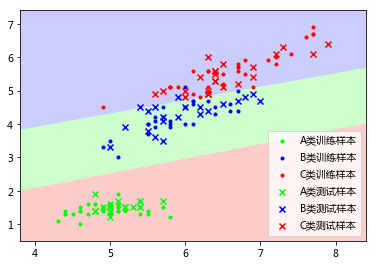

In [1]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import  tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


INPUT_SIZE = 2      
OUTPUT_SIZE = 3      # 输出的维数长度（比如鸢尾花有3类样本，使用长度为3的向量表示输出） 
LEARNING_RATE=0.02


# ===========定义深度学习模型===========
# 1. 定义训练数据（特征数据与标签数据）
#  定义特征数据
x = tf.placeholder(dtype=tf.float32, shape=[None, INPUT_SIZE])      
# 定义标签数据
y = tf.placeholder(dtype=tf.float32, shape=[None, 3])

# 2. 定义被训练的变量(根据训练的层数来决定)
# 神经网络层数设计4，8，5，3
# 第1层
w_init1 = tf.random.normal(shape=[INPUT_SIZE, 8], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init1 = tf.random.normal(shape=[8], mean=0, stddev=0.1, dtype=tf.float32)

w1 = tf.Variable(initial_value=w_init1)
b1 = tf.Variable(initial_value=b_init1)

# 第2层
w_init2 = tf.random.normal(shape=[8, 5], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init2 = tf.random.normal(shape=[5], mean=0, stddev=0.1, dtype=tf.float32)

w2 = tf.Variable(initial_value=w_init2)
b2 = tf.Variable(initial_value=b_init2)

# 第3层
w_init3 = tf.random.normal(shape=[5, 3], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init3 = tf.random.normal(shape=[3], mean=0, stddev=0.1, dtype=tf.float32)

w3 = tf.Variable(initial_value=w_init3)
b3 = tf.Variable(initial_value=b_init3)

# 3. 定义前向输出
# 第1层
# 加权求和
o_1 = tf.linalg.matmul(x, w1)
# 加偏置项
o_1 = tf.math.add(o_1, b1)
# 激活函数
o_1 = tf.math.tanh(o_1)

# 第2层
o_2 = tf.linalg.matmul(o_1, w2)
o_2 = tf.math.add(o_2, b2)
o_2 = tf.math.tanh(o_2)

# 第3层
o_3 = tf.linalg.matmul(o_2, w3)
o_3 = tf.math.add(o_3, b3)
o_3 = tf.math.sigmoid(o_3)

y_ = o_3

# 4. 定义损失函数与反向梯度更新优化算法
# 定义损失函数
loss = tf.losses.mean_squared_error(y, y_)

# ===========定义训练模型===========
# 1. 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
# 2. 最小化优化操作
trainer = optimizer.minimize(loss=loss)

# ===========执行训练与预测=========
# 1. 执行环境
# 构造一个执行会话
session = tf.Session()

# 获取上面定义的全局变量
global_v = tf.global_variables()
# print(global_v)

# 定义一个全局变量的初始化操作
op_init = tf.initializers.variables(global_v)
# op_init = tf.initializers.global_variables()    # 另外一种快捷方式

# 执行全局变量初始化操作(需要分配空间)
session.run(op_init)

# 2. 加载数据
data,target = datasets.load_iris(return_X_y=True)

# 3. 训练
# 把数据样本分成训练集与测试集
train_data, test_data,train_target, test_target = train_test_split(data, target, test_size=0.4,shuffle=True)

# print(np.where(train_target==1))
# print(train_target==1)

# 把训练的标签数据格式化成前面定义的3个特征输出格式
labels = np.zeros(shape=[len(train_target), 3], dtype=np.float32)
labels[np.where(train_target==0), 0] = 1
labels[np.where(train_target==1), 1] = 1
labels[np.where(train_target==2), 2] = 1

train_data = train_data[:, [0,2]]

test_data = test_data[:, [0,2]]

# 训练
TIMES=100000
for time in range(TIMES):
    _, loss_v = session.run(fetches=[trainer, loss], feed_dict={x: train_data, y: labels})
    # print(loss_v)
# 4. 预测输出
predict = session.run(fetches=y_, feed_dict={x: test_data})
# print(predict)
category=predict.argmax(axis=1)
counter= (category==test_target).sum()
print('识别正确的样本数：%d，总得样本数：%d，识别正确率：%8.2f%%' % (counter,len(test_data),100.0*counter/len(test_data)))

# ===========执行训练与预测=========
# 1. 可视化坐标轴
# 创建图像
figure = plt.figure(figsize=(6, 4))
# 创建坐标
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='分类可视化')

# 2. 可视化平面网格
# 网格区域数据
grid_x = data[:, 0]     # 第1个特征数据
grid_y = data[:, 2]     # 第3个特征数据
# 获取网格的数据区域返回
min_x, max_x = grid_x.min(), grid_x.max()
min_y, max_y = grid_y.min(), grid_y.max()

# 为了防止数据样本点绘制在边界，可以适当扩大网格区域
min_x -= 0.5; max_x += 0.5
min_y -= 0.5; max_y += 0.5

# 根据区域设置坐标轴的范围
ax.set_xbound(lower=min_x, upper=max_x)
ax.set_ybound(lower=min_y, upper=max_y)

# x, y进行等分
tick_x, tick_y =  np.mgrid[min_x:max_x:1000j , min_y:max_y:1000j]
# 形成网格坐标
grid_plane = np.stack([tick_x.flat, tick_y.flat], axis=1) 

# 使用训练的神经网络，来预测生成的网格，并不同对不同的结果使用不同的颜色绘制
grid_predict = session.run(fetches=y_, feed_dict={x: grid_plane})
# 把预测结果转换成0，1，2三种状态
z = grid_predict.argmax(axis=1)
print(z)
# 三类样本的绘制颜色
colors = mpl.colors.ListedColormap([(1.0, 0.8, 0.8, 0.5),  (0.8, 1.0, 0.8, 0.5),  (0.8, 0.8, 1.0, 0.5)])
# 使用pyplot绘制
ax.pcolormesh(tick_x, tick_y, z.reshape(tick_x.shape), cmap=colors)

# 3. 可视化训练样本数据集
a_x = train_data[np.where(train_target==0), 0] 
a_y = train_data[np.where(train_target==0), 1] 
b_x = train_data[np.where(train_target==1), 0] 
b_y = train_data[np.where(train_target==1), 1] 
c_x = train_data[np.where(train_target==2), 0] 
c_y = train_data[np.where(train_target==2), 1] 
ax.scatter(x=a_x, y=a_y, marker='.', color=(0, 1, 0, 1), label='A类训练样本')
ax.scatter(x=b_x, y=b_y, marker='.', color=(0, 0, 1, 1), label='B类训练样本')
ax.scatter(x=c_x, y=c_y, marker='.', color=(1, 0, 0, 1), label='C类训练样本')
# 4. 可视化测试样本数据集
ta_x = test_data[np.where(test_target==0), 0] 
ta_y = test_data[np.where(test_target==0), 1] 
tb_x = test_data[np.where(test_target==1), 0] 
tb_y = test_data[np.where(test_target==1), 1] 
tc_x = test_data[np.where(test_target==2), 0] 
tc_y = test_data[np.where(test_target==2), 1] 
ax.scatter(x=ta_x, y=ta_y, marker='x', color=(0, 1, 0, 1), label='A类测试样本')
ax.scatter(x=tb_x, y=tb_y, marker='x', color=(0, 0, 1, 1), label='B类测试样本')
ax.scatter(x=tc_x, y=tc_y, marker='x', color=(1, 0, 0, 1), label='C类测试样本')

ax.legend()
plt.show()

## 多层鸢尾花数据识别可视化

90 60
4.9367948
4.4268217
4.009408
3.6678007
3.369552
3.1095176
2.8721476
2.6383822
2.4200134
2.2418017
2.1223722
2.0476444
2.0022867
1.9644344
1.9297268
1.8981613
1.8668164
1.8385929
1.8116306
1.7865417
1.7615374
1.7388774
1.7174956
1.6976246
1.6781211
1.6594657
1.6418117
1.6248069
1.6091166
1.5946529
1.5809265
1.5683147
1.5564766
1.545185
1.5346477
1.5246187
1.5151101
1.5061133
1.4974943
1.4894505
1.4818273
1.4749292
1.4683353
1.4619503
1.455852
1.4498475
1.4439454
1.4381729
1.4325105
1.4270034
1.4220496
1.4175898
1.4133949
1.4093499
1.4053583
1.401545
1.3977689
1.3940402
1.3903078
1.3867192
1.3831054
1.3795831
1.3760492
1.3725435
1.3691183
1.3657094
1.3624934
1.3593328
1.3561462
1.3529764
1.3499057
1.3467872
1.3437392
1.340734
1.337715
1.3346838
1.3317044
1.3287331
1.3257353
1.3227544
1.3198256
1.3168668
1.313898
1.3109859
1.3080475
1.3051142
1.3022267
1.2993296
1.2964181
1.2935408
1.2906924
1.28784
1.2849733
1.2821838
1.2793776
1.2765182
1.2737116
1.2708904
1.268078
1.2652729
1.262

0.5638238
0.5637836
0.5637644
0.5637252
0.56371087
0.5636704
0.5636504
0.563677
0.5635867
0.5635632
0.5635242
0.563505
0.5634665
0.56345576
0.56347585
0.5633845
0.5633617
0.5633234
0.5633081
0.5633246
0.5632407
0.56321615
0.563179
0.56317
0.5631927
0.5630988
0.56307906
0.56308025
0.56304914
0.56299424
0.5629576
0.5629281
0.56290466
0.5629266
0.56291515
0.56282127
0.5628042
0.5628176
0.56280434
0.56272125
0.5627243
0.56269217
0.56272143
0.5626241
0.5625969
0.5625797
0.5625773
0.5625498
0.56257397
0.5624834
0.56245625
0.56242955
0.56240696
0.56239325
0.56238914
0.5623671
0.5623868
0.5622969
0.5622714
0.5622464
0.56222165
0.56220007
0.5621949
0.5622538
0.5621399
0.5621156
0.5620918
0.56206834
0.56204605
0.562078
0.5620278
0.562082
0.5619706
0.5619848
0.56198967
0.5619161
0.56191343
0.5618735
0.56186825
0.56183004
0.5618286
0.5618221
0.56183565
0.56174946
0.5617279
0.56170666
0.561686
0.56169945
0.56164646
0.56165755
0.5616112
0.5616237
0.561571
0.56155103
0.56153136
0.5615117
0.5614934
0.

0.5549735
0.5549277
0.5548973
0.5548758
0.554882
0.55491304
0.55488366
0.5548628
0.5548626
0.5548823
0.554858
0.554846
0.5548403
0.55484474
0.554834
0.5548496
0.5548291
0.5548429
0.5549109
0.5548652
0.5548348
0.55481327
0.5548152
0.55485094
0.55482143
0.5548004
0.55479765
0.5548829
0.5548365
0.55480576
0.55478406
0.55478114
0.55478996
0.55476993
0.554785
0.55485195
0.5548066
0.5547763
0.55475485
0.5547581
0.55479324
0.55476356
0.55474246
0.5547434
0.5547489
0.5547292
0.5547469
0.55481154
0.5547662
0.55473596
0.5547146
0.5547201
0.55472106
0.5547011
0.5547262
0.5547836
0.5547381
0.55470777
0.55468625
0.55470026
0.55472493
0.554695
0.55467427
0.55467176
0.5546792
0.55475503
0.55470884
0.55467814
0.55465657
0.5546625
0.5546631
0.55464303
0.5546636
0.55468196
0.5546529
0.5546323
0.5546432
0.55467135
0.55464184
0.5546208
0.55462855
0.55462795
0.554608
0.5546314
0.5546917
0.5546457
0.5546149
0.55459833
0.5545914
0.5546047
0.55463094
0.55460113
0.55458015
0.55458915
0.55458736
0.5545674
0.554

0.553164
0.55313236
0.5531272
0.55312294
0.5531243
0.5531209
0.5531176
0.5531152
0.553135
0.553116
0.55311245
0.55310905
0.5531106
0.55314505
0.5532033
0.55313987
0.5531185
0.5531139
0.5531098
0.5531061
0.5531055
0.55311096
0.55311096
0.5531065
0.5531031
0.5530997
0.5530965
0.55309325
0.55309457
0.5531315
0.5531836
0.55312765
0.55310386
0.55309874
0.5530943
0.55309033
0.5530868
0.55308765
0.5530997
0.5530935
0.5530873
0.55308396
0.5530807
0.55307823
0.55310154
0.5530794
0.553076
0.5530736
0.5531066
0.55317366
0.5531024
0.5530854
0.5530809
0.5530769
0.5530733
0.5530699
0.5530687
0.5530803
0.55307454
0.5530706
0.5530673
0.5530642
0.5530611
0.553058
0.55305904
0.5530609
0.55305934
0.5530656
0.5530641
0.55306077
0.5530574
0.55305415
0.55305094
0.55304873
0.5530762
0.55305
0.55304694
0.55304676
0.55308455
0.5531419
0.5530757
0.5530566
0.5530524
0.5530487
0.5530452
0.553042
0.55304354
0.5530476
0.55304927
0.55304307
0.5530399
0.5530367
0.5530338
0.55303085
0.55303246
0.55306405
0.5531261
0.5

0.5525194
0.55251783
0.55251616
0.5525146
0.55251324
0.55253524
0.5525186
0.5525165
0.55251455
0.55251265
0.552511
0.5525093
0.5525115
0.55252534
0.5525143
0.552512
0.5525104
0.55250883
0.5525072
0.55250573
0.55250466
0.55251044
0.5525268
0.552506
0.5525044
0.5525028
0.5525014
0.5524998
0.5525009
0.5525217
0.55250853
0.5525044
0.5525072
0.5525041
0.55250174
0.55249965
0.55249965
0.5525013
0.5525033
0.5525002
0.55249774
0.5524973
0.5524974
0.55249584
0.5524942
0.55249316
0.55249923
0.55251014
0.5524945
0.5524929
0.55249137
0.5524898
0.5524883
0.55248684
0.5524883
0.5525071
0.55249715
0.55249125
0.5524895
0.55248797
0.5524864
0.55248487
0.5524833
0.5524821
0.5525126
0.5524875
0.55248535
0.5524834
0.5524833
0.5524943
0.55248654
0.5524857
0.55248415
0.5524826
0.5524811
0.5524797
0.55247813
0.55247664
0.55247545
0.55247635
0.5525037
0.55247724
0.55247563
0.5524742
0.552474
0.5524864
0.55247986
0.5524747
0.5524756
0.5524756
0.5524738
0.55247223
0.5524708
0.55246925
0.55246776
0.5524663
0.552

0.5521754
0.5521719
0.5521568
0.55215716
0.55216134
0.5521609
0.552159
0.5521581
0.55215704
0.55215615
0.5521551
0.5521542
0.55215317
0.5521523
0.5521513
0.5521504
0.5521495
0.5521485
0.5521488
0.55217654
0.55215174
0.5521503
0.55214906
0.5521492
0.55215347
0.55215544
0.5521501
0.55214894
0.5521487
0.55215
0.55214876
0.5521476
0.5521467
0.5521457
0.5521447
0.5521438
0.55214286
0.5521419
0.552142
0.5521456
0.55217147
0.5521431
0.5521421
0.5521412
0.5521415
0.5521508
0.5521526
0.55214256
0.5521421
0.55214334
0.55214214
0.5521411
0.5521401
0.5521391
0.5521382
0.55213726
0.5521365
0.5521379
0.5521623
0.5521383
0.5521373
0.55213636
0.5521354
0.5521344
0.55213374
0.5521485
0.5521446
0.552137
0.55213654
0.55213875
0.5521372
0.5521358
0.5521347
0.5521336
0.55213267
0.5521317
0.5521308
0.5521298
0.5521303
0.5521449
0.5521388
0.5521336
0.55213255
0.5521316
0.5521306
0.5521296
0.5521286
0.5521277
0.55212677
0.5521259
0.5521249
0.552124
0.5521231
0.5521246
0.55216956
0.55212855
0.55212814
0.552126

0.5518865
0.55188566
0.5518849
0.55188423
0.5518836
0.55188286
0.5518822
0.5518816
0.551881
0.55188036
0.5518797
0.5518792
0.5518785
0.5518788
0.55189997
0.55189604
0.5518815
0.5518808
0.55188334
0.55188185
0.55188084
0.5518799
0.5518791
0.5518784
0.5518776
0.551877
0.5518763
0.5518757
0.55187505
0.5518751
0.5518932
0.55188686
0.55187815
0.55187726
0.5518781
0.5518791
0.55187774
0.5518767
0.5518759
0.55187505
0.5518744
0.55187374
0.551873
0.55187243
0.5518717
0.55187106
0.55187047
0.5518719
0.5518868
0.55188096
0.551872
0.5518713
0.5518714
0.5518726
0.55187166
0.5518708
0.5518702
0.5518695
0.55186886
0.5518683
0.55186766
0.55186707
0.55186653
0.55186653
0.55187935
0.5518945
0.5518689
0.55186826
0.5518676
0.5518669
0.5518675
0.5518692
0.55187064
0.5518688
0.5518676
0.55186665
0.5518658
0.5518651
0.5518647
0.5518662
0.55186516
0.55186445
0.5518638
0.55186313
0.5518629
0.55186325
0.55186236
0.5518616
0.55186087
0.5518602
0.55185956
0.55185986
0.5518779
0.5518703
0.55186254
0.55186266
0.55

0.55166423
0.5516637
0.5516632
0.551664
0.5516839
0.55166596
0.55166537
0.5516648
0.5516643
0.55166453
0.5516653
0.55166435
0.5516639
0.55166477
0.5516636
0.55166274
0.5516621
0.5516615
0.55166095
0.55166054
0.55166
0.55165946
0.551659
0.55165845
0.55166006
0.5516911
0.55166227
0.5516614
0.5516611
0.551663
0.55166185
0.55166095
0.55166024
0.5516596
0.55165905
0.5516584
0.5516579
0.55165744
0.5516569
0.55165637
0.55165595
0.5516554
0.55165523
0.5516559
0.551655
0.55165553
0.5516758
0.55166197
0.5516569
0.5516563
0.5516563
0.5516578
0.55165666
0.5516558
0.5516551
0.5516545
0.55165386
0.5516533
0.55165285
0.5516527
0.55165327
0.55165255
0.5516518
0.55165136
0.5516507
0.5516502
0.551651
0.5516682
0.5516622
0.55165374
0.5516529
0.55165404
0.55165446
0.55165315
0.5516522
0.5516514
0.5516507
0.55165017
0.5516496
0.551649
0.55164844
0.551648
0.5516475
0.55164707
0.55164653
0.55164605
0.5516456
0.5516463
0.5516639
0.5516619
0.55164915
0.5516483
0.55164766
0.55164915
0.5516493
0.551648
0.5516471

0.5514888
0.55148876
0.5515049
0.5515082
0.55149245
0.5514916
0.551491
0.551491
0.5514924
0.5514912
0.55149025
0.5514896
0.55148906
0.55148864
0.5514882
0.5514878
0.55148745
0.55148697
0.5514867
0.5514862
0.55148625
0.5514868
0.55148596
0.5514855
0.5514849
0.5514859
0.55150044
0.551495
0.55148894
0.551488
0.55148727
0.55148846
0.5514888
0.55148757
0.5514867
0.55148596
0.55148536
0.5514848
0.5514844
0.55148405
0.55148363
0.5514833
0.5514828
0.55148244
0.55148196
0.55148154
0.5514812
0.5514807
0.5514804
0.55148
0.5514796
0.5514793
0.5514793
0.5515003
0.55148286
0.5514823
0.55148184
0.5514838
0.5514827
0.5514819
0.5514812
0.5514806
0.5514801
0.5514795
0.55147916
0.5514788
0.5514783
0.551478
0.55147755
0.5514772
0.55147696
0.5514777
0.55147713
0.5514764
0.55147606
0.55147547
0.5514759
0.551493
0.55148804
0.55147934
0.55147845
0.55147797
0.55148005
0.5514787
0.5514777
0.551477
0.5514764
0.5514759
0.5514753
0.551475
0.55147463
0.55147415
0.55147386
0.5514734
0.55147296
0.55147254
0.5514722
0

0.55128825
0.5512845
0.55128783
0.55128306
0.551287
0.55128205
0.5512864
0.55128825
0.55128044
0.5512849
0.5512804
0.551284
0.55128175
0.5512837
0.5512823
0.5512804
0.5512822
0.5512785
0.55128163
0.55127716
0.55128074
0.5512763
0.55127954
0.55127555
0.55127835
0.5512749
0.55127704
0.5512743
0.5512783
0.5512775
0.55127764
0.5512811
0.55127335
0.5512757
0.55127376
0.5512729
0.5512735
0.5512714
0.55127275
0.55127037
0.55127174
0.5512695
0.55127275
0.55127275
0.5512721
0.5512687
0.5512723
0.5512665
0.55127245
0.5512722
0.5512667
0.5512684
0.55126673
0.5512665
0.5512662
0.5512652
0.5512664
0.55126816
0.55126685
0.5512639
0.551267
0.5512616
0.5512667
0.5512603
0.5512657
0.55125934
0.5512646
0.55125856
0.5512633
0.55125797
0.55126196
0.5512573
0.5512607
0.5512567
0.5512609
0.55126387
0.551276
0.5512603
0.5512549
0.55126065
0.5512527
0.55126053
0.55125284
0.55126405
0.5512522
0.5512601
0.55125237
0.5512581
0.5512518
0.5512567
0.55125093
0.5512558
0.5512498
0.55125505
0.55124855
0.55125445
0.55

0.5509664
0.5509754
0.5509678
0.55097216
0.55097157
0.551012
0.5509708
0.5509688
0.55097234
0.55096585
0.5509727
0.5509638
0.5509727
0.5509624
0.5509717
0.5509639
0.5509683
0.5509675
0.55099946
0.5509729
0.55096245
0.5509699
0.5509639
0.55096644
0.5509646
0.5509641
0.5509649
0.5509622
0.5509649
0.5509608
0.5509646
0.55095947
0.5509641
0.5509582
0.55096364
0.550957
0.5509632
0.5509926
0.55096465
0.55095583
0.55096436
0.5509577
0.5509597
0.5509588
0.5509572
0.55095917
0.5509553
0.55096024
0.55101275
0.5509533
0.55096203
0.55095476
0.55095875
0.55095553
0.5509562
0.5509559
0.5509698
0.5509577
0.5509533
0.5509591
0.5509501
0.55095977
0.5509497
0.5509575
0.5509514
0.5509539
0.55095214
0.55095136
0.55095285
0.550962
0.55095506
0.55094856
0.55095685
0.5509484
0.5509513
0.5509503
0.5509462
0.5509516
0.55094343
0.55095196
0.55094194
0.550951
0.55094355
0.5509474
0.5509444
0.55094486
0.5509479
0.55107605
0.5509465
0.55095273
0.5509452
0.550946
0.55094725
0.5509403
0.5509487
0.55093956
0.55094606

[0 0 0 ... 2 2 2]


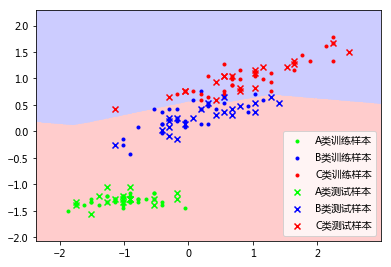

In [7]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import  tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


INPUT_SIZE = 2      
OUTPUT_SIZE = 3      # 输出的维数长度（比如鸢尾花有3类样本，使用长度为3的向量表示输出） 
LEARNING_RATE=0.05


# ===========定义深度学习模型===========
# 1. 定义训练数据（特征数据与标签数据）
#  定义特征数据
x = tf.placeholder(dtype=tf.float32, shape=[None, INPUT_SIZE])      
# 定义标签数据
y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_SIZE])

# 2. 定义被训练的变量(根据训练的层数来决定)
# 神经网络层数设计4，6，5，4,  3
# 第1层
w_init1 = tf.random.normal(shape=[INPUT_SIZE, 6], mean=0, stddev=1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init1 = tf.random.normal(shape=[6], mean=0, stddev=1, dtype=tf.float32)

w1 = tf.Variable(initial_value=w_init1)
b1 = tf.Variable(initial_value=b_init1)

# 第2层
w_init2 = tf.random.normal(shape=[6, 5], mean=0, stddev=1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init2 = tf.random.normal(shape=[5], mean=2, stddev=1, dtype=tf.float32)

w2 = tf.Variable(initial_value=w_init2)
b2 = tf.Variable(initial_value=b_init2)

# 第3层
w_init3 = tf.random.normal(shape=[5, 4], mean=0, stddev=1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init3 = tf.random.normal(shape=[4], mean=2, stddev=1, dtype=tf.float32)

w3 = tf.Variable(initial_value=w_init3)
b3 = tf.Variable(initial_value=b_init3)

# 第4层
w_init4 = tf.random.normal(shape=[4, 3], mean=0, stddev=1, dtype=tf.float32)       # 给被训练的变量一个初始值
b_init4 = tf.random.normal(shape=[3], mean=2, stddev=1, dtype=tf.float32)

w4 = tf.Variable(initial_value=w_init4)
b4 = tf.Variable(initial_value=b_init4)




# 3. 定义前向输出
# 第1层
# 加权求和
o_1 = tf.linalg.matmul(x, w1)
# 加偏置项
o_1 = tf.math.add(o_1, b1)
# 激活函数
o_1 = tf.nn.relu(o_1)

# 第2层
o_2 = tf.linalg.matmul(o_1, w2)
o_2 = tf.math.add(o_2, b2)
o_2 = tf.nn.relu(o_2)

# 第3层
o_3 = tf.linalg.matmul(o_2, w3)
o_3 = tf.math.add(o_3, b3)
o_3 = tf.nn.relu(o_3)

# 第4层
o_4 = tf.linalg.matmul(o_3, w4)
o_4 = tf.math.add(o_4, b4)
o_4 = tf.nn.relu(o_4)


y_ = o_4

# 4. 定义损失函数与反向梯度更新优化算法
# 定义损失函数
# loss = tf.losses.mean_squared_error(y, y_)
loss = tf.losses.sigmoid_cross_entropy(y ,y_)

# ===========定义训练模型===========
# 1. 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARNING_RATE)
# optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)

# 2. 最小化优化操作
trainer = optimizer.minimize(loss=loss)

# ===========执行训练与预测=========
# 1. 执行环境
# 构造一个执行会话
session = tf.Session()

# 获取上面定义的全局变量
global_v = tf.global_variables()
# print(global_v)

# 定义一个全局变量的初始化操作
op_init = tf.initializers.variables(global_v)
# op_init = tf.initializers.global_variables()    # 另外一种快捷方式

# 执行全局变量初始化操作(需要分配空间)
session.run(op_init)

# 2. 加载数据
data,target = datasets.load_iris(return_X_y=True)

data=preprocessing.scale(data)

# 3. 训练
# 把数据样本分成训练集与测试集
train_data, test_data,train_target, test_target = train_test_split(data, target, test_size=0.4,shuffle=True)

# print(np.where(train_target==1))
# print(train_target==1)

# 把训练的标签数据格式化成前面定义的3个特征输出格式
labels = np.zeros(shape=[len(train_target), 3], dtype=np.float32)
labels[np.where(train_target==0), 0] = 1
labels[np.where(train_target==1), 1] = 1
labels[np.where(train_target==2), 2] = 1
# print(labels)
train_data = train_data[:, [0,2]]

test_data = test_data[:, [0,2]]
print(len(train_data),len(test_data))
# 训练
TIMES=10000
for time in range(TIMES):
    _, loss_v = session.run(fetches=[trainer, loss], feed_dict={x: train_data, y: labels})
    print(loss_v)
# 4. 预测输出
predict = session.run(fetches=y_, feed_dict={x: test_data})
# print(predict)
category=predict.argmax(axis=1)
counter= (category==test_target).sum()
print('识别正确的样本数：%d，总得样本数：%d，识别正确率：%8.2f%%' % (counter,len(test_data),100.0*counter/len(test_data)))

# ===========执行训练与预测=========
# 1. 可视化坐标轴
# 创建图像
figure = plt.figure(figsize=(6, 4))
# 创建坐标
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='分类可视化')

# 2. 可视化平面网格
# 网格区域数据
grid_x = data[:, 0]     # 第1个特征数据
grid_y = data[:, 2]     # 第3个特征数据
# 获取网格的数据区域返回
min_x, max_x = grid_x.min(), grid_x.max()
min_y, max_y = grid_y.min(), grid_y.max()

# 为了防止数据样本点绘制在边界，可以适当扩大网格区域
min_x -= 0.5; max_x += 0.5
min_y -= 0.5; max_y += 0.5

# 根据区域设置坐标轴的范围
ax.set_xbound(lower=min_x, upper=max_x)
ax.set_ybound(lower=min_y, upper=max_y)

# x, y进行等分
tick_x, tick_y =  np.mgrid[min_x:max_x:1000j , min_y:max_y:1000j]
# 形成网格坐标
grid_plane = np.stack([tick_x.flat, tick_y.flat], axis=1) 

# 使用训练的神经网络，来预测生成的网格，并不同对不同的结果使用不同的颜色绘制
grid_predict = session.run(fetches=y_, feed_dict={x: grid_plane})
# 把预测结果转换成0，1，2三种状态
z = grid_predict.argmax(axis=1)
print(z)
# 三类样本的绘制颜色
colors = mpl.colors.ListedColormap([(1.0, 0.8, 0.8, 0.5),  (0.8, 1.0, 0.8, 0.5),  (0.8, 0.8, 1.0, 0.5)])
# 使用pyplot绘制
ax.pcolormesh(tick_x, tick_y, z.reshape(tick_x.shape), cmap=colors)

# 3. 可视化训练样本数据集
a_x = train_data[np.where(train_target==0), 0] 
a_y = train_data[np.where(train_target==0), 1] 
b_x = train_data[np.where(train_target==1), 0] 
b_y = train_data[np.where(train_target==1), 1] 
c_x = train_data[np.where(train_target==2), 0] 
c_y = train_data[np.where(train_target==2), 1] 
ax.scatter(x=a_x, y=a_y, marker='.', color=(0, 1, 0, 1), label='A类训练样本')
ax.scatter(x=b_x, y=b_y, marker='.', color=(0, 0, 1, 1), label='B类训练样本')
ax.scatter(x=c_x, y=c_y, marker='.', color=(1, 0, 0, 1), label='C类训练样本')
# 4. 可视化测试样本数据集
ta_x = test_data[np.where(test_target==0), 0] 
ta_y = test_data[np.where(test_target==0), 1] 
tb_x = test_data[np.where(test_target==1), 0] 
tb_y = test_data[np.where(test_target==1), 1] 
tc_x = test_data[np.where(test_target==2), 0] 
tc_y = test_data[np.where(test_target==2), 1] 
ax.scatter(x=ta_x, y=ta_y, marker='x', color=(0, 1, 0, 1), label='A类测试样本')
ax.scatter(x=tb_x, y=tb_y, marker='x', color=(0, 0, 1, 1), label='B类测试样本')
ax.scatter(x=tc_x, y=tc_y, marker='x', color=(1, 0, 0, 1), label='C类测试样本')

ax.legend()
plt.show()

神经网络隐藏层过多会产生梯度消失的问题。

## 全链接网络的模块封装

59
[0 0 2 2 0 0 1 2 1 1 2 2 2 2 1 0 0 0 1 1 1 0 0 1 2 2 1 2 0 2 2 0 2 1 0 1 0
 1 0 1 2 0 2 0 2 1 1 1 0 2 2 0 0 1 1 2 1 2 2 2]


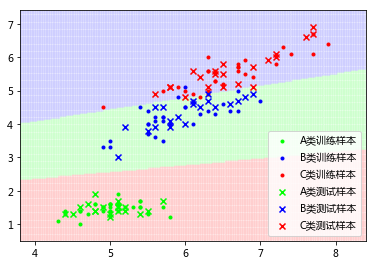

In [6]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import  tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


class FFNNLayer:
    def __init__(self, input_size, output_size, act_func):
        w_init = tf.random.normal(shape=[input_size, output_size], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
        b_init = tf.random.normal(shape=[output_size], mean=0, stddev=0.1, dtype=tf.float32)

        self.w = tf.Variable(initial_value=w_init)
        self.b = tf.Variable(initial_value=b_init)
        self.act_func = act_func
    def forward(self, data):
        # 加权求和
        a = tf.linalg.matmul(data, self.w)
        # 加偏置项
        a = tf.math.add(a, self.b)
        # 激活函数
        o = self.act_func(a)
        return o


class FFNNNet:
    def __init__(self, ffnn_struct):
        INPUT_SIZE = ffnn_struct[0][0]
        OUTPUT_SIZE = ffnn_struct[-1][1]
        self.x = tf.placeholder(dtype=tf.float32, shape=[None, INPUT_SIZE])      
        # 定义标签数据
        self.y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_SIZE])
        
        self.o = None
        
        input_data = self.x
        for input_size, output_size, act_func  in  ffnn_struct:
            layer = FFNNLayer(input_size=input_size, output_size=output_size, act_func=act_func)
            input_data = layer.forward(data=input_data)
            self.o = input_data
            
        self.session = tf.Session()
        global_v = tf.global_variables()
        op_init = tf.initializers.variables(global_v)
        self.session.run(op_init)
    
    def train(self, sample, labels, times=100000, learning_rate=0.01, verbose=False):
        loss = tf.losses.mean_squared_error(self.y, self.o)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        trainer = optimizer.minimize(loss=loss)
        for time in range(times):
            _, loss_v = self.session.run(fetches=[trainer, loss], feed_dict={self.x: sample, self.y: labels})
            if verbose: 
                print(loss_v)
        
    def predict(self, test):
        predict = self.session.run(fetches=self.o, feed_dict={self.x: test})
        # print(predict)
        category=predict.argmax(axis=1)
        return category
    
    def visual(self, data, train_data, test_data, train_target, test_target):
        figure = plt.figure(figsize=(6, 4))
        # 创建坐标
        ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='分类可视化')

        # 2. 可视化平面网格
        # 网格区域数据
        grid_x = data[:, 0]     # 第1个特征数据
        grid_y = data[:, 2]     # 第3个特征数据
        # 获取网格的数据区域返回
        min_x, max_x = grid_x.min(), grid_x.max()
        min_y, max_y = grid_y.min(), grid_y.max()

        # 为了防止数据样本点绘制在边界，可以适当扩大网格区域
        min_x -= 0.5; max_x += 0.5
        min_y -= 0.5; max_y += 0.5

        # 根据区域设置坐标轴的范围
        ax.set_xbound(lower=min_x, upper=max_x)
        ax.set_ybound(lower=min_y, upper=max_y)

        # x, y进行等分
        tick_x, tick_y =  np.mgrid[min_x:max_x:200j , min_y:max_y:200j]
        # 形成网格坐标
        grid_plane = np.stack([tick_x.flat, tick_y.flat], axis=1) 

        # 使用训练的神经网络，来预测生成的网格，并不同对不同的结果使用不同的颜色绘制
        grid_predict = self.session.run(fetches=self.o, feed_dict={self.x: grid_plane})
        # 把预测结果转换成0，1，2三种状态
        z = grid_predict.argmax(axis=1)
        # 三类样本的绘制颜色
        colors = mpl.colors.ListedColormap([(1.0, 0.8, 0.8, 0.5),  (0.8, 1.0, 0.8, 0.5),  (0.8, 0.8, 1.0, 0.5)])
        # 使用pyplot绘制
        ax.pcolormesh(tick_x, tick_y, z.reshape(tick_x.shape), cmap=colors)

        # 3. 可视化训练样本数据集
        a_x = train_data[np.where(train_target==0), 0] 
        a_y = train_data[np.where(train_target==0), 1] 
        b_x = train_data[np.where(train_target==1), 0] 
        b_y = train_data[np.where(train_target==1), 1] 
        c_x = train_data[np.where(train_target==2), 0] 
        c_y = train_data[np.where(train_target==2), 1] 
        ax.scatter(x=a_x, y=a_y, marker='.', color=(0, 1, 0, 1), label='A类训练样本')
        ax.scatter(x=b_x, y=b_y, marker='.', color=(0, 0, 1, 1), label='B类训练样本')
        ax.scatter(x=c_x, y=c_y, marker='.', color=(1, 0, 0, 1), label='C类训练样本')
        # 4. 可视化测试样本数据集
        ta_x = test_data[np.where(test_target==0), 0] 
        ta_y = test_data[np.where(test_target==0), 1] 
        tb_x = test_data[np.where(test_target==1), 0] 
        tb_y = test_data[np.where(test_target==1), 1] 
        tc_x = test_data[np.where(test_target==2), 0] 
        tc_y = test_data[np.where(test_target==2), 1] 
        ax.scatter(x=ta_x, y=ta_y, marker='x', color=(0, 1, 0, 1), label='A类测试样本')
        ax.scatter(x=tb_x, y=tb_y, marker='x', color=(0, 0, 1, 1), label='B类测试样本')
        ax.scatter(x=tc_x, y=tc_y, marker='x', color=(1, 0, 0, 1), label='C类测试样本')

        ax.legend()
        plt.show()


ffnn_struct = [
    [2, 8, tf.nn.relu],
    [8, 5, tf.nn.relu],
    [5, 4, tf.nn.relu],
    [4, 3, tf.math.sigmoid]
]
net = FFNNNet(ffnn_struct)
data,target = datasets.load_iris(return_X_y=True)

train_data, test_data,train_target, test_target = train_test_split(data, target, test_size=0.4,shuffle=True)

train_data = train_data[:, [0,2]]
test_data = test_data[:, [0,2]]
# print(np.where(train_target==1))
# print(train_target==1)

# 把训练的标签数据格式化成前面定义的3个特征输出格式
labels = np.zeros(shape=[len(train_target), 3], dtype=np.float32)
labels[np.where(train_target==0), 0] = 1
labels[np.where(train_target==1), 1] = 1
labels[np.where(train_target==2), 2] = 1
#train_target=labels


net.train(train_data, labels, verbose=True)
result = net.predict(test_data)
print((result==test_target).sum())
print(result)
net.visual(data, train_data, test_data,train_target, test_target)


0.24968828
0.24968413
0.24967995
0.24967581
0.24967167
0.24966756
0.24966337
0.24965927
0.24965516
0.24965103
0.24964692
0.24964279
0.24963869
0.24963461
0.24963051
0.24962643
0.24962234
0.24961826
0.2496142
0.24961014
0.24960606
0.24960202
0.24959795
0.24959393
0.24958986
0.24958584
0.2495818
0.24957779
0.24957377
0.24956974
0.24956574
0.24956173
0.24955772
0.24955374
0.24954978
0.24954578
0.2495418
0.24953781
0.24953385
0.24952988
0.2495259
0.24952199
0.249518
0.24951406
0.24951014
0.2495062
0.2495023
0.24949832
0.24949443
0.24949051
0.24948658
0.2494827
0.24947877
0.24947491
0.24947101
0.24946712
0.24946323
0.24945939
0.24945551
0.24945164
0.24944778
0.24944392
0.24944006
0.24943623
0.24943237
0.24942854
0.24942474
0.2494209
0.24941708
0.24941327
0.24940945
0.24940564
0.24940184
0.24939804
0.24939422
0.24939045
0.24938667
0.2493829
0.24937911
0.24937536
0.24937159
0.24936785
0.2493641
0.24936031
0.2493566
0.24935284
0.2493491
0.24934536
0.24934167
0.24933796
0.24933422
0.24933052
0.

0.24765983
0.24765824
0.24765667
0.2476551
0.2476535
0.2476519
0.24765034
0.24764878
0.2476472
0.2476456
0.24764404
0.24764246
0.24764091
0.24763936
0.2476378
0.24763623
0.24763466
0.24763311
0.24763155
0.24763
0.24762847
0.24762692
0.24762535
0.24762383
0.24762227
0.24762073
0.24761917
0.24761765
0.24761611
0.24761458
0.24761307
0.24761152
0.24761
0.24760847
0.24760695
0.24760544
0.24760391
0.2476024
0.24760085
0.24759933
0.24759784
0.24759634
0.24759483
0.24759331
0.24759184
0.24759033
0.24758883
0.24758732
0.24758582
0.24758434
0.24758282
0.24758133
0.24757984
0.24757835
0.24757689
0.24757537
0.24757393
0.24757244
0.24757098
0.24756947
0.24756801
0.24756655
0.24756508
0.24756359
0.24756213
0.24756065
0.2475592
0.24755773
0.24755628
0.24755482
0.24755336
0.2475519
0.24755047
0.24754901
0.24754757
0.24754612
0.24754469
0.24754322
0.24754182
0.24754035
0.24753891
0.2475375
0.24753605
0.24753462
0.24753319
0.24753176
0.24753033
0.24752891
0.24752751
0.24752605
0.24752466
0.24752323
0.24

0.24676666
0.24676616
0.2467657
0.24676526
0.2467648
0.24676433
0.24676386
0.24676342
0.24676295
0.2467625
0.24676201
0.24676155
0.24676113
0.24676065
0.24676022
0.24675976
0.24675933
0.24675885
0.24675839
0.24675792
0.24675749
0.24675705
0.2467566
0.24675614
0.24675569
0.24675524
0.24675478
0.24675435
0.24675389
0.24675344
0.24675299
0.24675256
0.24675211
0.24675167
0.24675122
0.24675076
0.24675034
0.24674992
0.24674945
0.24674901
0.24674854
0.24674812
0.24674767
0.24674724
0.24674682
0.24674636
0.24674594
0.24674551
0.24674505
0.24674462
0.24674417
0.24674374
0.24674332
0.24674287
0.24674246
0.24674203
0.2467416
0.24674115
0.24674073
0.2467403
0.24673985
0.24673943
0.24673899
0.24673858
0.24673817
0.24673773
0.24673729
0.24673687
0.24673645
0.246736
0.24673562
0.24673516
0.24673474
0.24673432
0.24673389
0.24673349
0.24673305
0.24673264
0.24673222
0.2467318
0.24673137
0.24673095
0.24673052
0.24673012
0.2467297
0.24672928
0.24672888
0.24672846
0.24672803
0.24672765
0.24672721
0.2467268

0.24650031
0.2465002
0.24650007
0.24649994
0.24649979
0.24649967
0.24649955
0.2464994
0.24649929
0.24649915
0.24649905
0.24649891
0.24649876
0.24649864
0.2464985
0.24649838
0.24649826
0.24649811
0.24649797
0.24649785
0.24649772
0.24649759
0.2464975
0.24649735
0.24649724
0.24649708
0.24649696
0.24649686
0.24649669
0.24649659
0.24649647
0.24649632
0.2464962
0.24649608
0.24649595
0.24649581
0.24649571
0.24649557
0.24649544
0.24649532
0.2464952
0.24649507
0.24649495
0.24649483
0.2464947
0.24649458
0.24649444
0.24649434
0.2464942
0.24649408
0.24649395
0.24649383
0.24649373
0.2464936
0.24649346
0.24649334
0.24649322
0.24649307
0.24649295
0.24649285
0.24649273
0.24649261
0.24649248
0.24649237
0.24649224
0.24649212
0.246492
0.24649186
0.24649176
0.24649164
0.2464915
0.24649139
0.24649125
0.24649115
0.24649101
0.24649091
0.24649078
0.24649067
0.24649055
0.24649043
0.24649028
0.2464902
0.24649006
0.24648994
0.24648982
0.24648972
0.2464896
0.24648947
0.24648938
0.24648926
0.24648914
0.246489
0.24

0.24642701
0.24642698
0.24642693
0.24642693
0.24642685
0.2464268
0.24642678
0.24642673
0.2464267
0.24642666
0.24642663
0.24642658
0.24642654
0.24642651
0.24642646
0.24642639
0.24642636
0.24642633
0.2464263
0.24642624
0.2464262
0.24642617
0.24642612
0.24642609
0.24642605
0.24642602
0.24642597
0.24642593
0.24642588
0.24642585
0.24642578
0.24642576
0.2464257
0.24642567
0.24642563
0.24642561
0.24642555
0.24642551
0.24642548
0.24642545
0.2464254
0.24642538
0.24642533
0.24642529
0.24642524
0.24642521
0.24642517
0.24642514
0.24642509
0.24642506
0.24642502
0.24642494
0.24642493
0.2464249
0.24642487
0.24642482
0.24642476
0.24642475
0.24642472
0.24642466
0.24642463
0.24642459
0.24642453
0.24642453
0.24642445
0.2464244
0.2464244
0.24642438
0.24642432
0.24642429
0.24642424
0.2464242
0.24642418
0.24642412
0.24642406
0.24642406
0.24642402
0.24642399
0.24642394
0.2464239
0.24642386
0.24642384
0.2464238
0.24642377
0.2464237
0.24642368
0.24642365
0.2464236
0.24642354
0.24642353
0.2464235
0.24642345
0.2

0.24640399
0.24640398
0.24640398
0.24640396
0.24640396
0.24640392
0.24640392
0.24640389
0.24640389
0.24640384
0.24640387
0.24640384
0.24640384
0.24640381
0.24640381
0.24640378
0.24640377
0.24640377
0.24640374
0.24640375
0.24640374
0.24640371
0.2464037
0.24640368
0.24640368
0.24640365
0.24640365
0.24640362
0.24640362
0.24640357
0.24640357
0.24640356
0.24640356
0.24640356
0.24640355
0.2464035
0.2464035
0.2464035
0.24640349
0.24640347
0.24640344
0.24640343
0.24640343
0.24640343
0.2464034
0.2464034
0.24640337
0.24640335
0.24640335
0.24640335
0.24640334
0.2464033
0.24640329
0.24640328
0.24640328
0.24640328
0.24640326
0.24640323
0.24640323
0.2464032
0.2464032
0.2464032
0.24640317
0.24640316
0.24640316
0.24640313
0.24640313
0.2464031
0.2464031
0.24640308
0.24640304
0.24640307
0.24640304
0.24640302
0.24640301
0.24640301
0.24640301
0.246403
0.246403
0.24640296
0.24640295
0.24640293
0.24640293
0.24640292
0.24640289
0.24640287
0.24640287
0.24640287
0.24640286
0.24640283
0.24640281
0.24640281
0.24

0.24639656
0.2463966
0.24639659
0.24639659
0.24639659
0.24639656
0.24639656
0.24639656
0.24639654
0.24639656
0.24639656
0.24639653
0.24639653
0.24639653
0.24639653
0.24639653
0.24639653
0.2463965
0.24639648
0.24639648
0.2463965
0.24639647
0.24639648
0.24639647
0.24639647
0.24639645
0.24639647
0.24639645
0.24639645
0.24639645
0.24639645
0.24639645
0.24639642
0.24639641
0.24639641
0.24639642
0.24639641
0.24639636
0.2463964
0.24639641
0.24639641
0.2463964
0.2463964
0.24639635
0.2463964
0.24639636
0.24639636
0.24639635
0.24639635
0.24639633
0.24639633
0.24639633
0.24639632
0.24639633
0.24639629
0.24639633
0.24639629
0.24639629
0.24639629
0.24639629
0.24639626
0.24639629
0.24639627
0.24639627
0.24639626
0.24639626
0.24639626
0.24639626
0.24639624
0.24639624
0.24639626
0.24639621
0.24639621
0.24639621
0.24639621
0.24639621
0.2463962
0.24639621
0.2463962
0.24639621
0.24639618
0.24639618
0.24639618
0.24639615
0.24639615
0.24639615
0.24639615
0.24639618
0.24639614
0.24639615
0.24639614
0.246396

0.24639368
0.24639367
0.24639368
0.24639367
0.24639368
0.24639367
0.24639367
0.24639367
0.24639364
0.24639367
0.24639367
0.24639364
0.24639367
0.24639367
0.24639367
0.24639367
0.24639364
0.24639364
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.24639362
0.2463936
0.24639359
0.2463936
0.24639359
0.2463936
0.2463936
0.2463936
0.24639362
0.2463936
0.24639359
0.24639359
0.24639359
0.24639356
0.24639356
0.24639356
0.24639359
0.24639359
0.24639359
0.24639359
0.24639359
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639355
0.24639353
0.24639355
0.2463935
0.24639355
0.2463935
0.24639353
0.2463935
0.2463935
0.2463935
0.24639355
0.2463935
0.24639355
0.24639353
0.24639353
0.2463935
0.24639353
0.2463935
0.2463935
0.2463935
0.2463935
0.24639349
0.24639349
0.24639349
0.24639347
0.24639349
0.24639349
0.24639349
0.24639347
0.24639347
0.24639347
0.24639347
0.24639347
0.246

0.2463922
0.2463922
0.2463922
0.2463922
0.24639219
0.24639218
0.2463922
0.24639218
0.24639219
0.24639218
0.24639218
0.24639219
0.24639219
0.24639218
0.24639219
0.24639218
0.24639218
0.24639218
0.24639218
0.24639219
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639218
0.24639216
0.24639216
0.24639213
0.24639218
0.24639218
0.24639216
0.24639216
0.24639218
0.24639213
0.24639213
0.24639213
0.24639213
0.24639216
0.24639213
0.24639213
0.24639213
0.24639213
0.24639213
0.24639216
0.24639213
0.24639213
0.24639216
0.24639213
0.24639213
0.24639213
0.2463921
0.24639213
0.24639213
0.24639213
0.24639213
0.24639212
0.24639213
0.24639212
0.24639213
0.24639212
0.24639212
0.2463921
0.24639212
0.2463921
0.24639213
0.24639212
0.24639212
0.24639213
0.24639213
0.2463921
0.2463921
0.2463921
0.2463921
0.2463921
0.2463921
0.24639212
0.2463921
0.24639207
0.2463921
0.2463921
0.2463921
0.2463921
0.2463921
0.2463921
0.2463921

0.2463913
0.2463913
0.24639128
0.2463913
0.24639125
0.2463913
0.2463913
0.2463913
0.2463913
0.24639125
0.24639125
0.24639125
0.24639125
0.2463913
0.24639128
0.24639125
0.2463913
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639128
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639122
0.24639125
0.24639125
0.24639124
0.24639125
0.24639124
0.24639125
0.24639125
0.24639125
0.24639125
0.24639125
0.24639124
0.24639125
0.24639125
0.24639122
0.24639125
0.24639124
0.24639124
0.24639124
0.24639125
0.24639124
0.24639125
0.24639122
0.24639122
0.24639122
0.24639122
0.24639124
0.24639124
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.24639122
0.2463912
0.2463912
0.2463912
0.2463912
0.2463912
0.24639122
0.2463912
0.2463912
0.24639122
0.2463912
0.2463912
0.24639118
0.24639122
0.2463912
0.2463912
0.246391

0.24639042
0.24639042
0.24639043
0.24639043
0.24639042
0.24639042
0.24639043
0.24639042
0.24639042
0.24639042
0.24639043
0.24639042
0.24639042
0.24639042
0.2463904
0.24639042
0.24639042
0.24639042
0.2463904
0.24639042
0.24639042
0.24639042
0.24639042
0.2463904
0.24639042
0.2463904
0.24639042
0.24639042
0.2463904
0.24639042
0.24639042
0.24639042
0.24639042
0.24639039
0.24639042
0.2463904
0.2463904
0.24639042
0.24639039
0.2463904
0.2463904
0.2463904
0.24639039
0.24639039
0.2463904
0.2463904
0.2463904
0.24639039
0.24639039
0.24639039
0.2463904
0.2463904
0.24639039
0.24639039
0.24639039
0.24639039
0.24639039
0.24639039
0.24639039
0.24639039
0.24639039
0.2463904
0.24639039
0.24639039
0.24639039
0.2463904
0.24639039
0.24639039
0.24639036
0.24639039
0.24639039
0.24639039
0.24639036
0.24639039
0.24639039
0.24639039
0.24639039
0.24639034
0.24639039
0.24639039
0.24639039
0.24639036
0.24639036
0.24639039
0.24639034
0.24639039
0.24639036
0.24639036
0.24639034
0.24639034
0.24639034
0.24639039
0.246

0.24638975
0.24638978
0.24638975
0.24638975
0.24638975
0.24638978
0.24638975
0.24638975
0.24638978
0.24638973
0.24638973
0.24638978
0.24638975
0.24638973
0.24638973
0.24638973
0.24638973
0.24638978
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638975
0.24638973
0.24638973
0.24638973
0.24638973
0.24638972
0.24638973
0.24638973
0.24638973
0.24638973
0.24638972
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638973
0.24638972
0.24638973
0.24638973
0.24638972
0.24638972
0.24638969
0.24638972
0.24638973
0.24638972
0.24638972
0.24638973
0.24638969
0.24638972
0.24638973
0.24638969
0.24638969
0.24638972
0.24638969
0.24638972
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638969
0.24638967
0.24638969
0.24638969
0.24638969
0.24638969
0.24638967
0.24638967
0.24638967
0.24638969
0.24638969

0.24638899
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638896
0.24638896
0.24638896
0.24638897
0.24638896
0.24638893
0.24638896
0.24638896
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638897
0.24638896
0.24638893
0.24638896
0.24638893
0.24638893
0.24638893
0.24638896
0.24638893
0.24638896
0.24638896
0.24638893
0.24638896
0.24638893
0.24638893
0.24638893
0.24638891
0.24638893
0.24638893
0.24638896
0.24638893
0.24638893
0.24638893
0.24638891
0.24638893
0.24638893
0.24638893
0.24638893
0.24638893
0.24638893
0.24638893
0.24638891
0.24638891
0.24638893
0.24638893
0.24638891
0.2463889
0.24638893
0.24638891
0.24638891
0.24638893
0.24638893
0.24638893
0.2463889
0.2463889
0.24638893
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.24638891
0.2463889
0.24638893
0.24638891
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.24638891
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.2463889
0.24638887


0.24638805
0.24638805
0.24638805
0.24638805
0.24638805
0.24638805
0.24638803
0.24638803
0.24638803
0.24638803
0.24638805
0.24638805
0.24638805
0.24638803
0.24638805
0.24638803
0.24638803
0.24638805
0.24638802
0.24638802
0.24638802
0.24638802
0.24638803
0.24638802
0.24638802
0.24638803
0.24638802
0.24638803
0.24638802
0.24638802
0.24638802
0.24638803
0.246388
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638797
0.24638797
0.24638797
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.24638802
0.246388
0.246388
0.24638802
0.246388
0.246388
0.246388
0.246388
0.246388
0.24638797
0.246388
0.24638802
0.246388
0.246388
0.246388
0.24638797
0.24638797
0.246388
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638802
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638797
0.24638796
0.24638797
0.24638797
0.24638796
0.24638797
0.24638797
0.2

0.24638708
0.24638708
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638706
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638702
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638705
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.24638702
0.246387
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638696
0.24638699
0.24638696
0.24638696
0.24638696
0.24638696
0.24638699
0.24638699
0.24638696
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0.24638699
0

0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638599
0.24638598
0.24638599
0.24638599
0.24638599
0.24638599
0.24638598
0.24638599
0.24638598
0.24638598
0.24638598
0.24638598
0.24638598
0.24638599
0.24638599
0.24638599
0.24638598
0.24638598
0.24638596
0.24638596
0.24638599
0.24638598
0.24638598
0.24638596
0.24638599
0.24638596
0.24638596
0.24638596
0.24638596
0.24638598
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638593
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638596
0.24638593
0.24638593
0.24638593
0.24638593
0.24638593
0.24638596
0.24638596
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.24638592
0.2463859
0.2463859
0.2463859
0.

0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.24638492
0.2463849
0.2463849
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638489
0.24638487
0.24638487
0.24638487
0.24638487
0.24638487
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638484
0.24638483
0

0.24638347
0.24638347
0.24638346
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638344
0.24638341
0.2463834
0.2463834
0.24638341
0.24638341
0.24638341
0.24638341
0.24638341
0.24638341
0.24638341
0.24638341
0.24638341
0.2463834
0.2463834
0.2463834
0.2463834
0.24638341
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.2463834
0.24638338
0.24638338
0.2463834
0.24638338
0.24638338
0.24638338
0.24638338
0.24638338
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638337
0.24638334
0.24638334
0.24638334
0.24638334
0.24638332
0.24638332
0.

0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638203
0.24638201
0.24638201
0.24638201
0.24638201
0.24638201
0.24638201
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638197
0.24638197
0.24638198
0.24638198
0.24638198
0.24638198
0.24638198
0.24638197
0.24638198
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638197
0.24638195
0.24638195
0.24638195
0.24638195
0.24638195
0.24638194
0.24638195
0.24638194
0.24638194
0.24638194
0.24638194
0.24638191
0.24638194
0.24638194
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.24638191
0.2463819
0.2463819
0

0.24638066
0.24638066
0.24638063
0.24638066
0.24638063
0.24638063
0.24638063
0.24638063
0.24638063
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.24638061
0.2463806
0.2463806
0.2463806
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638058
0.24638055
0.24638055
0.24638055
0.24638055
0.24638055
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638052
0.24638052
0.24638052
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638054
0.24638052
0.24638052
0.24638052
0.24638052
0.24638052
0.24638052
0.24638052
0.24638052
0.24638051
0.24638052
0.24638052
0.24638052
0.24638051
0.24638051
0.24638051
0.24638051
0.24638051
0.24638051
0.24638051
0.24638051
0.24638048
0.24638046
0.24638046
0.24638046
0.24638046
0.

0.24637912
0.24637912
0.24637912
0.24637912
0.2463791
0.2463791
0.2463791
0.2463791
0.2463791
0.2463791
0.2463791
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637909
0.24637908
0.24637908
0.24637908
0.24637908
0.24637908
0.24637908
0.24637908
0.24637908
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637905
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637902
0.24637899
0.24637899
0.24637899
0.24637899
0.24637899
0.24637899
0.24637899
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637897
0.24637896
0.24637896
0.24637896
0.24637896
0.24637894
0.24637894
0.24637894
0.24637894
0.24637894
0.24637894
0.24637894
0.24637894
0.2463

0.24637738
0.24637738
0.24637738
0.24637738
0.24637738
0.24637735
0.24637735
0.24637735
0.24637738
0.24637738
0.24637735
0.24637735
0.24637735
0.24637735
0.24637735
0.24637735
0.24637735
0.24637735
0.24637735
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637733
0.24637732
0.24637729
0.24637729
0.24637729
0.24637729
0.24637729
0.24637729
0.24637729
0.24637729
0.24637727
0.24637727
0.24637727
0.24637727
0.24637727
0.24637727
0.24637727
0.24637727
0.24637727
0.24637726
0.24637726
0.24637726
0.24637726
0.24637726
0.24637726
0.24637726
0.24637726
0.24637724
0.24637724
0.24637724
0.24637724
0.24637724
0.24637724
0.24637724
0.24637724
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.24637721
0.2463772
0.2463772
0.2463772
0.2463772
0.24637718
0.2463772
0.2463772
0.24637718
0.24637718
0.24637718
0.24637718
0.24637718
0.24637718
0.24637718
0.24637718
0.24637718
0.246

0.24637523
0.24637523
0.24637523
0.24637522
0.2463752
0.2463752
0.2463752
0.24637522
0.24637522
0.24637522
0.24637523
0.24637522
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.2463752
0.24637517
0.24637517
0.24637517
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637516
0.24637514
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.24637513
0.2463751
0.24637513
0.2463751
0.2463751
0.2463751
0.24637508
0.24637508
0.24637508
0.24637508
0.24637507
0.24637507
0.24637507
0.24637507
0.24637507
0.24637507
0.24637507
0.24637507
0.24637504
0.24637504
0.24637504
0.24637504
0.24637504
0.24637504
0.24637504
0.24637502
0.24637502
0.24637504
0.24637504
0.24637504
0.24637504
0.24637502
0.24637502
0.24637502
0.24637502
0.24637502
0.24637501
0.24637501
0.24637501
0.24637501
0.2463750

0.24637264
0.24637264
0.24637264
0.24637264
0.24637263
0.24637264
0.24637263
0.24637263
0.24637264
0.24637263
0.24637263
0.24637261
0.24637261
0.24637261
0.24637261
0.24637261
0.24637261
0.24637261
0.24637261
0.24637258
0.24637258
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637257
0.24637255
0.24637257
0.24637255
0.24637252
0.24637252
0.24637252
0.24637252
0.24637252
0.24637252
0.24637252
0.24637252
0.2463725
0.2463725
0.2463725
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637249
0.24637248
0.24637248
0.24637248
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637245
0.24637243
0.24637243
0.24637242
0.24637243
0.24637242
0.24637242
0.24637242
0.2463724
0.2463724
0.2463724
0.2463724
0.2463724
0.24637237
0.24637237
0.24637237
0.24637237
0.24637237
0.24637237
0.24637237
0.24637236
0.24637

0.24636972
0.2463697
0.2463697
0.2463697
0.2463697
0.2463697
0.24636972
0.2463697
0.2463697
0.2463697
0.2463697
0.2463697
0.2463697
0.2463697
0.2463697
0.24636969
0.24636969
0.24636966
0.24636966
0.24636966
0.24636969
0.24636969
0.24636969
0.24636966
0.24636966
0.24636966
0.24636966
0.24636966
0.24636966
0.24636964
0.24636964
0.24636963
0.24636963
0.24636963
0.24636963
0.24636963
0.24636962
0.24636962
0.24636959
0.24636962
0.24636959
0.24636959
0.24636959
0.24636959
0.24636959
0.24636959
0.24636959
0.24636959
0.24636957
0.24636956
0.24636956
0.24636956
0.24636956
0.24636956
0.24636954
0.24636956
0.24636956
0.24636956
0.24636956
0.24636954
0.24636954
0.24636956
0.24636954
0.24636951
0.24636954
0.24636951
0.24636951
0.2463695
0.2463695
0.24636948
0.24636948
0.24636948
0.24636951
0.24636951
0.2463695
0.2463695
0.2463695
0.2463695
0.24636948
0.24636948
0.24636948
0.24636948
0.24636945
0.24636945
0.24636945
0.24636944
0.24636944
0.24636944
0.24636944
0.24636944
0.24636944
0.24636944
0.24636

0.24636662
0.24636659
0.24636659
0.24636658
0.24636658
0.24636658
0.24636658
0.24636658
0.24636656
0.24636658
0.24636656
0.24636656
0.24636655
0.24636655
0.24636655
0.24636658
0.24636656
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.24636655
0.2463665
0.2463665
0.2463665
0.2463665
0.2463665
0.2463665
0.2463665
0.2463665
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636646
0.24636643
0.24636643
0.24636643
0.24636641
0.24636641
0.24636641
0.24636641
0.24636641
0.24636641
0.24636638
0.24636641
0.24636641
0.24636638
0.24636638
0.24636638
0.24636638
0.24636638
0.24636637
0.24636635
0.24636635
0.24636635
0.24636635
0.24636635
0.24636635
0.24636635
0.24636635
0.24636632
0.24636635
0.24636635
0.24636632
0.24636635
0.2463663
0.2463663
0.2463663
0.24636632
0.2463663
0.2463663
0.2463663
0.2463663
0.24636629
0.24636629
0.24636628
0.24636628
0.24636628
0.24636628
0.24636628
0.2

0.24636322
0.24636322
0.24636322
0.24636321
0.24636321
0.24636321
0.24636321
0.24636318
0.24636321
0.24636318
0.24636318
0.24636318
0.24636318
0.24636318
0.24636318
0.24636318
0.24636318
0.24636316
0.24636316
0.24636316
0.24636315
0.24636315
0.24636315
0.24636315
0.2463631
0.2463631
0.2463631
0.2463631
0.2463631
0.2463631
0.2463631
0.24636309
0.24636309
0.24636307
0.24636307
0.24636307
0.24636307
0.24636307
0.24636307
0.24636307
0.24636307
0.24636307
0.24636303
0.24636303
0.24636303
0.24636303
0.24636303
0.24636303
0.24636303
0.24636303
0.24636303
0.24636301
0.24636301
0.24636301
0.24636298
0.24636298
0.24636298
0.24636298
0.24636298
0.24636298
0.24636298
0.24636297
0.24636298
0.24636298
0.24636298
0.24636297
0.24636295
0.24636295
0.24636295
0.24636295
0.24636294
0.24636294
0.24636294
0.24636291
0.24636291
0.2463629
0.24636288
0.24636288
0.24636288
0.24636288
0.24636288
0.24636288
0.24636288
0.24636286
0.24636286
0.24636286
0.24636284
0.24636284
0.24636286
0.24636284
0.24636284
0.24636

0.24635921
0.24635921
0.24635921
0.24635921
0.24635921
0.2463592
0.2463592
0.24635921
0.24635917
0.24635917
0.24635917
0.24635917
0.24635917
0.24635915
0.24635914
0.24635915
0.24635914
0.24635914
0.24635914
0.24635914
0.24635912
0.24635912
0.2463591
0.2463591
0.2463591
0.24635908
0.24635908
0.24635908
0.24635908
0.24635908
0.24635907
0.24635907
0.24635905
0.24635907
0.24635907
0.24635905
0.24635907
0.24635907
0.24635905
0.24635902
0.24635902
0.24635902
0.24635902
0.24635902
0.24635902
0.24635902
0.24635899
0.24635899
0.24635899
0.24635899
0.24635899
0.24635899
0.24635899
0.24635896
0.24635896
0.24635895
0.24635895
0.24635892
0.24635893
0.24635892
0.24635893
0.24635892
0.24635892
0.24635892
0.24635892
0.24635892
0.24635892
0.24635889
0.24635887
0.24635887
0.24635887
0.24635887
0.24635887
0.24635886
0.24635886
0.24635887
0.24635886
0.24635883
0.24635883
0.24635883
0.24635883
0.24635881
0.24635881
0.2463588
0.2463588
0.2463588
0.2463588
0.2463588
0.2463588
0.2463588
0.2463588
0.24635878
0

0.24635437
0.24635437
0.24635437
0.24635437
0.24635436
0.24635436
0.24635436
0.24635433
0.24635433
0.24635431
0.24635433
0.24635433
0.24635433
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.2463543
0.24635425
0.24635425
0.24635425
0.24635425
0.24635424
0.24635424
0.24635422
0.24635422
0.24635422
0.24635418
0.24635418
0.24635418
0.24635418
0.24635416
0.24635416
0.24635416
0.24635415
0.24635416
0.24635415
0.24635415
0.24635415
0.24635415
0.24635415
0.24635412
0.24635412
0.2463541
0.2463541
0.2463541
0.2463541
0.2463541
0.2463541
0.2463541
0.24635406
0.24635406
0.24635406
0.24635406
0.24635406
0.24635404
0.24635404
0.24635404
0.24635403
0.24635403
0.24635403
0.24635403
0.24635401
0.24635401
0.24635401
0.24635398
0.24635398
0.24635398
0.24635397
0.24635395
0.24635395
0.24635395
0.24635395
0.24635392
0.24635392
0.24635391
0.24635391
0.24635391
0.24635391
0.24635391
0.24635388
0.24635388
0.24635388
0.24635388
0.24635388
0.24635388
0.24635388
0.246

0.24634926
0.24634922
0.24634922
0.24634922
0.24634922
0.24634922
0.2463492
0.2463492
0.24634919
0.24634919
0.24634916
0.24634914
0.24634914
0.24634914
0.24634913
0.24634913
0.24634913
0.24634911
0.24634911
0.24634911
0.24634911
0.24634911
0.24634911
0.24634911
0.24634908
0.24634907
0.24634907
0.24634907
0.24634907
0.24634907
0.24634907
0.24634907
0.24634904
0.24634904
0.24634904
0.24634904
0.246349
0.24634899
0.24634899
0.24634898
0.24634899
0.24634898
0.24634898
0.24634895
0.24634898
0.24634895
0.24634895
0.24634895
0.24634893
0.24634895
0.24634893
0.24634892
0.24634892
0.2463489
0.2463489
0.24634887
0.24634887
0.24634887
0.24634887
0.24634884
0.24634884
0.24634884
0.24634884
0.24634884
0.24634884
0.24634884
0.24634884
0.24634881
0.24634881
0.24634881
0.2463488
0.2463488
0.24634878
0.24634878
0.24634878
0.24634877
0.24634877
0.24634877
0.24634874
0.24634872
0.24634872
0.24634872
0.24634872
0.24634871
0.24634871
0.24634871
0.24634868
0.24634868
0.24634868
0.24634868
0.24634865
0.24634

0.2463432
0.2463432
0.2463432
0.2463432
0.24634315
0.24634315
0.24634315
0.24634315
0.24634314
0.24634315
0.24634315
0.24634315
0.24634312
0.24634312
0.24634309
0.24634309
0.24634312
0.24634308
0.24634308
0.24634308
0.24634306
0.24634305
0.24634305
0.24634305
0.24634302
0.24634302
0.24634302
0.24634302
0.246343
0.246343
0.246343
0.24634299
0.24634299
0.24634296
0.24634296
0.24634296
0.24634296
0.24634296
0.24634294
0.24634293
0.24634293
0.24634293
0.24634291
0.24634288
0.24634288
0.24634288
0.24634288
0.24634288
0.24634287
0.24634287
0.24634285
0.24634285
0.24634285
0.24634281
0.24634281
0.24634281
0.24634281
0.2463428
0.2463428
0.24634278
0.24634278
0.24634278
0.24634275
0.24634273
0.24634273
0.24634273
0.24634273
0.24634273
0.24634272
0.24634272
0.24634272
0.2463427
0.2463427
0.2463427
0.24634266
0.24634266
0.24634266
0.24634266
0.24634266
0.24634264
0.24634264
0.2463426
0.2463426
0.2463426
0.2463426
0.24634258
0.24634258
0.24634258
0.24634258
0.24634257
0.24634254
0.24634254
0.24634

0.24633525
0.24633525
0.24633524
0.24633522
0.24633522
0.24633522
0.24633521
0.24633518
0.24633518
0.24633518
0.24633515
0.24633515
0.24633515
0.24633515
0.24633512
0.2463351
0.2463351
0.2463351
0.2463351
0.2463351
0.24633509
0.24633507
0.24633507
0.24633504
0.24633504
0.24633503
0.24633503
0.24633503
0.24633503
0.24633503
0.24633498
0.24633498
0.24633497
0.24633496
0.24633496
0.24633496
0.24633494
0.24633491
0.24633491
0.24633488
0.24633488
0.24633488
0.24633488
0.24633488
0.24633488
0.24633488
0.24633485
0.24633485
0.24633484
0.24633484
0.24633484
0.24633482
0.2463348
0.24633478
0.24633476
0.24633476
0.24633476
0.24633476
0.24633473
0.24633473
0.24633473
0.2463347
0.24633473
0.2463347
0.24633469
0.24633469
0.24633467
0.24633464
0.24633464
0.24633461
0.24633461
0.24633463
0.24633461
0.24633461
0.24633461
0.2463346
0.24633457
0.24633457
0.24633455
0.24633455
0.24633454
0.24633454
0.24633454
0.24633451
0.24633451
0.2463345
0.2463345
0.2463345
0.24633448
0.24633448
0.24633446
0.24633442


0.2463263
0.24632625
0.24632625
0.24632625
0.24632624
0.24632622
0.24632622
0.2463262
0.2463262
0.2463262
0.24632622
0.24632618
0.24632616
0.24632616
0.24632615
0.24632615
0.24632612
0.2463261
0.2463261
0.24632609
0.24632606
0.24632606
0.24632604
0.24632603
0.24632603
0.24632601
0.24632598
0.24632598
0.24632598
0.24632597
0.24632595
0.24632592
0.24632595
0.24632592
0.24632592
0.24632591
0.24632591
0.24632588
0.24632588
0.24632585
0.24632588
0.24632585
0.24632584
0.24632584
0.24632584
0.24632579
0.24632579
0.24632579
0.24632576
0.24632576
0.24632575
0.24632572
0.24632572
0.24632572
0.24632572
0.24632572
0.24632569
0.24632569
0.24632569
0.24632567
0.24632564
0.24632564
0.24632561
0.24632561
0.24632561
0.24632557
0.24632557
0.24632557
0.24632555
0.24632554
0.24632554
0.24632554
0.24632551
0.2463255
0.2463255
0.24632548
0.24632548
0.24632545
0.24632545
0.24632545
0.24632543
0.24632542
0.24632542
0.24632542
0.24632537
0.24632537
0.24632537
0.24632537
0.24632534
0.24632534
0.24632534
0.24632

0.24631552
0.24631552
0.2463155
0.2463155
0.2463155
0.24631546
0.24631543
0.24631543
0.24631542
0.2463154
0.24631539
0.24631539
0.24631535
0.24631535
0.24631533
0.24631535
0.24631533
0.2463153
0.2463153
0.24631527
0.24631527
0.24631526
0.24631523
0.24631523
0.24631523
0.24631521
0.2463152
0.2463152
0.2463152
0.24631515
0.24631514
0.24631512
0.24631512
0.24631512
0.24631508
0.24631508
0.24631506
0.24631505
0.24631505
0.24631502
0.246315
0.246315
0.24631499
0.24631496
0.24631496
0.24631496
0.24631496
0.24631493
0.24631493
0.24631488
0.24631488
0.24631485
0.24631485
0.24631482
0.24631485
0.24631482
0.2463148
0.24631478
0.24631478
0.24631475
0.24631475
0.24631473
0.24631472
0.2463147
0.2463147
0.2463147
0.24631467
0.24631466
0.24631464
0.24631464
0.24631462
0.24631462
0.2463146
0.24631459
0.24631457
0.24631454
0.24631454
0.24631451
0.24631451
0.24631451
0.24631448
0.24631447
0.24631448
0.24631445
0.24631444
0.24631445
0.24631444
0.2463144
0.24631439
0.24631439
0.24631435
0.24631433
0.24631

0.24630226
0.24630225
0.24630225
0.24630222
0.24630219
0.24630217
0.24630214
0.24630217
0.24630214
0.24630213
0.24630211
0.24630211
0.24630207
0.24630205
0.24630204
0.24630204
0.24630204
0.24630204
0.246302
0.24630198
0.24630195
0.24630193
0.24630192
0.24630192
0.24630187
0.24630187
0.24630186
0.24630183
0.24630184
0.2463018
0.2463018
0.24630179
0.24630179
0.24630177
0.24630177
0.24630173
0.24630173
0.24630171
0.24630167
0.24630165
0.24630165
0.24630165
0.2463016
0.2463016
0.24630158
0.24630158
0.24630158
0.24630153
0.24630153
0.2463015
0.2463015
0.24630146
0.24630147
0.24630146
0.24630144
0.24630143
0.2463014
0.24630138
0.24630138
0.24630135
0.24630135
0.24630131
0.24630131
0.24630132
0.24630131
0.24630126
0.24630125
0.24630123
0.24630123
0.24630122
0.24630119
0.24630117
0.24630116
0.24630113
0.24630113
0.24630111
0.2463011
0.24630108
0.24630108
0.24630105
0.24630105
0.24630104
0.24630103
0.246301
0.24630098
0.24630097
0.24630097
0.24630097
0.24630092
0.24630089
0.24630089
0.24630088


0.24628891
0.2462889
0.24628885
0.24628884
0.24628884
0.24628882
0.24628879
0.24628878
0.24628876
0.24628873
0.24628872
0.24628869
0.24628869
0.24628869
0.24628866
0.24628864
0.2462886
0.2462886
0.24628857
0.24628855
0.24628852
0.24628852
0.24628852
0.24628851
0.2462885
0.24628848
0.24628845
0.24628843
0.24628839
0.24628837
0.24628836
0.24628831
0.24628834
0.2462883
0.2462883
0.24628825
0.24628825
0.24628823
0.24628824
0.24628823
0.24628818
0.24628815
0.24628815
0.24628812
0.2462881
0.24628809
0.24628809
0.24628808
0.24628803
0.246288
0.246288
0.24628796
0.24628796
0.24628797
0.24628796
0.24628791
0.24628791
0.2462879
0.24628788
0.24628784
0.24628784
0.24628781
0.24628781
0.24628776
0.24628776
0.24628775
0.24628773
0.24628769
0.24628764
0.24628767
0.24628764
0.24628761
0.24628761
0.24628761
0.2462876
0.24628757
0.24628755
0.24628754
0.24628754
0.2462875
0.24628747
0.24628744
0.24628742
0.24628742
0.24628742
0.2462874
0.24628736
0.24628735
0.24628735
0.2462873
0.24628729
0.24628727
0.24

0.24627344
0.24627343
0.24627338
0.2462734
0.24627338
0.24627337
0.24627334
0.24627331
0.2462733
0.24627326
0.24627325
0.24627323
0.24627322
0.24627319
0.24627316
0.24627313
0.24627312
0.24627309
0.24627309
0.24627306
0.24627306
0.24627304
0.246273
0.246273
0.24627297
0.24627292
0.2462729
0.24627289
0.24627285
0.24627285
0.24627285
0.24627285
0.24627282
0.24627277
0.24627276
0.24627274
0.24627271
0.2462727
0.24627265
0.24627265
0.24627262
0.24627261
0.24627261
0.24627255
0.24627255
0.24627252
0.2462725
0.24627249
0.24627247
0.24627244
0.24627241
0.24627239
0.24627237
0.24627236
0.24627234
0.24627231
0.24627231
0.2462723
0.24627228
0.24627227
0.24627224
0.2462722
0.24627216
0.24627215
0.24627213
0.24627213
0.24627209
0.24627207
0.24627204
0.24627201
0.24627201
0.24627197
0.24627197
0.24627197
0.24627194
0.24627194
0.2462719
0.24627186
0.24627186
0.24627182
0.24627179
0.24627179
0.24627176
0.24627174
0.2462717
0.2462717
0.24627167
0.24627165
0.24627165
0.24627161
0.24627157
0.24627155
0.

0.24625617
0.24625614
0.2462561
0.2462561
0.24625607
0.24625607
0.24625602
0.24625596
0.246256
0.24625595
0.24625593
0.24625592
0.24625587
0.24625586
0.24625583
0.2462558
0.24625579
0.24625576
0.24625574
0.2462557
0.24625568
0.24625565
0.24625565
0.2462556
0.24625558
0.24625558
0.24625553
0.24625553
0.24625549
0.24625546
0.24625541
0.2462554
0.24625538
0.24625535
0.24625534
0.24625532
0.24625531
0.24625526
0.24625522
0.2462552
0.24625519
0.24625519
0.24625514
0.24625511
0.24625507
0.24625506
0.24625506
0.24625501
0.246255
0.246255
0.24625497
0.24625492
0.24625492
0.24625488
0.24625485
0.24625483
0.2462548
0.24625477
0.24625477
0.24625473
0.2462547
0.2462547
0.24625465
0.24625464
0.24625462
0.24625458
0.24625458
0.24625453
0.2462545
0.24625449
0.24625446
0.24625443
0.24625438
0.24625437
0.24625438
0.24625435
0.24625431
0.2462543
0.24625427
0.24625424
0.24625419
0.24625418
0.24625416
0.24625415
0.24625412
0.2462541
0.24625409
0.24625406
0.24625403
0.24625401
0.24625397
0.24625392
0.24625

0.24623293
0.24623291
0.24623287
0.24623285
0.24623284
0.2462328
0.24623278
0.24623276
0.24623269
0.24623269
0.24623263
0.2462326
0.2462326
0.24623257
0.24623252
0.2462325
0.24623245
0.24623242
0.24623238
0.24623238
0.24623233
0.2462323
0.24623229
0.24623224
0.24623221
0.24623217
0.24623215
0.24623212
0.24623209
0.24623208
0.24623199
0.24623197
0.24623194
0.24623191
0.24623191
0.24623188
0.24623184
0.24623181
0.24623176
0.24623173
0.24623169
0.24623169
0.24623165
0.24623162
0.24623157
0.24623157
0.24623154
0.2462315
0.24623147
0.24623147
0.24623138
0.24623136
0.24623135
0.24623129
0.24623127
0.24623127
0.24623123
0.2462312
0.24623115
0.24623114
0.2462311
0.24623103
0.24623102
0.246231
0.24623096
0.24623093
0.2462309
0.24623089
0.24623086
0.2462308
0.24623078
0.24623074
0.24623069
0.24623069
0.24623062
0.24623062
0.24623056
0.24623054
0.24623054
0.24623051
0.24623047
0.24623042
0.2462304
0.24623038
0.24623032
0.24623032
0.24623027
0.24623026
0.24623021
0.24623019
0.24623014
0.24623013
0

0.24620704
0.24620703
0.24620697
0.24620697
0.24620694
0.2462069
0.24620685
0.24620682
0.24620675
0.24620672
0.2462067
0.24620667
0.24620663
0.24620658
0.24620655
0.2462065
0.24620649
0.24620643
0.2462064
0.24620636
0.24620634
0.24620628
0.24620628
0.24620621
0.24620616
0.24620613
0.24620609
0.24620606
0.24620602
0.24620602
0.24620599
0.2462059
0.24620588
0.24620585
0.24620579
0.24620576
0.24620575
0.24620569
0.24620567
0.24620561
0.2462056
0.24620555
0.24620552
0.24620548
0.24620545
0.24620539
0.24620534
0.24620533
0.24620529
0.24620526
0.24620521
0.24620518
0.24620514
0.2462051
0.24620506
0.24620503
0.24620499
0.24620497
0.24620491
0.24620487
0.24620484
0.24620481
0.24620478
0.24620472
0.2462047
0.24620464
0.24620464
0.2462046
0.24620456
0.24620451
0.24620447
0.24620442
0.24620438
0.24620436
0.2462043
0.2462043
0.24620424
0.2462042
0.24620418
0.24620415
0.24620411
0.24620403
0.24620399
0.24620396
0.24620394
0.24620391
0.24620388
0.24620384
0.24620381
0.24620375
0.24620369
0.24620368


0.24616441
0.24616434
0.24616428
0.24616425
0.24616419
0.24616414
0.2461641
0.24616404
0.246164
0.24616393
0.24616392
0.24616386
0.24616379
0.24616373
0.2461637
0.24616367
0.24616362
0.24616356
0.24616352
0.24616344
0.24616341
0.24616337
0.2461633
0.24616325
0.24616322
0.24616317
0.2461631
0.24616307
0.24616301
0.24616295
0.2461629
0.24616288
0.24616282
0.24616276
0.24616271
0.24616267
0.24616261
0.24616256
0.2461625
0.24616247
0.24616241
0.24616234
0.2461623
0.24616227
0.24616222
0.24616215
0.24616209
0.24616206
0.246162
0.24616195
0.24616192
0.24616188
0.24616182
0.24616176
0.24616168
0.24616165
0.2461616
0.24616158
0.24616154
0.24616146
0.24616142
0.24616134
0.24616133
0.24616127
0.24616124
0.24616118
0.24616113
0.24616107
0.24616104
0.24616097
0.2461609
0.24616086
0.24616085
0.24616078
0.24616072
0.24616069
0.24616063
0.24616058
0.2461605
0.2461605
0.24616043
0.24616039
0.24616036
0.24616028
0.24616022
0.24616021
0.24616015
0.24616009
0.24616005
0.24615997
0.24615994
0.2461599
0.24

0.24611847
0.2461184
0.24611835
0.24611828
0.24611825
0.24611816
0.24611808
0.24611802
0.24611798
0.24611792
0.24611786
0.2461178
0.24611773
0.24611767
0.2461176
0.24611758
0.24611747
0.24611741
0.24611734
0.2461173
0.24611725
0.24611717
0.2461171
0.24611706
0.24611698
0.2461169
0.24611686
0.24611683
0.24611677
0.24611668
0.2461166
0.24611656
0.24611652
0.24611644
0.24611636
0.2461163
0.24611625
0.24611618
0.24611612
0.24611607
0.24611603
0.24611594
0.24611586
0.2461158
0.24611577
0.24611568
0.24611561
0.24611557
0.24611549
0.24611542
0.24611539
0.24611534
0.24611527
0.2461152
0.24611513
0.24611506
0.246115
0.24611492
0.24611488
0.2461148
0.24611475
0.24611469
0.24611461
0.24611455
0.2461145
0.24611443
0.24611437
0.24611431
0.24611425
0.2461142
0.24611412
0.24611405
0.24611399
0.24611396
0.24611387
0.24611379
0.24611373
0.24611366
0.2461136
0.24611355
0.24611351
0.24611343
0.24611336
0.24611332
0.24611324
0.24611318
0.2461131
0.24611305
0.246113
0.24611291
0.24611287
0.24611281
0.24611

0.24606597
0.2460659
0.24606583
0.24606575
0.24606569
0.2460656
0.24606554
0.24606548
0.24606541
0.24606533
0.24606526
0.24606518
0.24606512
0.24606507
0.24606496
0.24606492
0.24606484
0.2460648
0.24606468
0.2460646
0.24606453
0.24606448
0.24606441
0.24606434
0.24606428
0.2460642
0.24606414
0.24606404
0.24606399
0.24606392
0.24606389
0.24606377
0.2460637
0.24606365
0.24606358
0.2460635
0.24606343
0.24606335
0.2460633
0.24606322
0.24606316
0.24606308
0.24606301
0.24606293
0.24606289
0.24606282
0.24606274
0.24606267
0.24606258
0.24606253
0.24606247
0.2460624
0.2460623
0.24606223
0.24606216
0.24606209
0.24606203
0.24606198
0.24606189
0.24606182
0.24606174
0.24606171
0.2460616
0.24606155
0.24606147
0.2460614
0.24606137
0.24606125
0.24606118
0.24606113
0.24606103
0.24606098
0.24606091
0.24606083
0.24606077
0.2460607
0.24606062
0.24606057
0.24606049
0.24606042
0.24606033
0.2460603
0.24606022
0.2460601
0.24606007
0.24606001
0.24605991
0.24605983
0.24605978
0.24605972
0.24605961
0.24605957
0.2

0.2460016
0.24600154
0.24600144
0.2460014
0.24600129
0.2460012
0.24600112
0.24600102
0.24600096
0.24600086
0.24600078
0.2460007
0.24600063
0.24600054
0.24600044
0.24600038
0.24600029
0.24600022
0.24600014
0.24600004
0.24599995
0.24599989
0.2459998
0.24599972
0.24599962
0.24599956
0.24599946
0.24599935
0.24599929
0.2459992
0.24599913
0.24599904
0.24599893
0.24599887
0.24599877
0.24599871
0.2459986
0.24599853
0.24599843
0.24599838
0.2459983
0.24599819
0.24599811
0.24599804
0.24599792
0.24599786
0.24599777
0.24599768
0.24599761
0.24599752
0.24599743
0.24599735
0.24599728
0.2459972
0.2459971
0.24599703
0.24599694
0.24599686
0.24599677
0.24599667
0.2459966
0.24599652
0.24599643
0.24599634
0.24599625
0.24599618
0.24599606
0.245996
0.24599591
0.24599585
0.24599575
0.24599567
0.24599558
0.24599548
0.24599543
0.24599533
0.24599522
0.24599513
0.24599506
0.24599499
0.24599491
0.24599482
0.24599472
0.24599466
0.24599457
0.2459945
0.24599439
0.2459943
0.24599421
0.24599415
0.24599408
0.24599397
0.2

0.24592626
0.2459262
0.2459261
0.24592602
0.2459259
0.24592577
0.24592568
0.24592558
0.24592544
0.24592538
0.24592525
0.24592516
0.24592504
0.24592496
0.24592488
0.24592476
0.24592467
0.24592456
0.24592446
0.24592434
0.24592425
0.24592414
0.24592404
0.24592392
0.24592385
0.24592373
0.24592365
0.24592352
0.24592343
0.24592331
0.24592324
0.24592312
0.245923
0.24592292
0.24592282
0.2459227
0.24592261
0.2459225
0.24592239
0.2459223
0.24592216
0.24592207
0.24592197
0.2459219
0.24592179
0.2459217
0.24592155
0.24592148
0.24592134
0.24592127
0.24592115
0.24592108
0.24592094
0.24592087
0.24592072
0.24592064
0.24592054
0.24592043
0.24592033
0.24592023
0.24592012
0.24592003
0.24591996
0.24591982
0.24591972
0.24591959
0.2459195
0.24591938
0.2459193
0.24591918
0.24591911
0.24591896
0.24591888
0.24591877
0.24591866
0.24591856
0.24591847
0.24591836
0.24591823
0.24591815
0.24591805
0.24591798
0.24591786
0.24591774
0.24591762
0.24591751
0.2459174
0.24591732
0.2459172
0.24591713
0.24591702
0.2459169
0.2

0.24583668
0.24583654
0.24583644
0.24583633
0.24583618
0.24583606
0.24583593
0.24583584
0.24583569
0.24583557
0.24583545
0.24583532
0.24583521
0.24583508
0.24583495
0.24583481
0.24583468
0.24583457
0.24583447
0.24583434
0.2458342
0.24583408
0.24583396
0.24583386
0.2458337
0.24583358
0.24583346
0.24583332
0.24583322
0.2458331
0.24583296
0.24583283
0.2458327
0.24583259
0.24583246
0.24583232
0.24583222
0.2458321
0.24583195
0.24583183
0.2458317
0.24583158
0.24583147
0.24583134
0.24583122
0.2458311
0.24583097
0.24583088
0.24583071
0.24583061
0.24583049
0.24583034
0.24583024
0.24583012
0.24582997
0.24582985
0.24582973
0.2458296
0.24582946
0.24582936
0.24582924
0.24582909
0.24582897
0.24582885
0.24582875
0.24582863
0.24582851
0.24582836
0.24582824
0.2458281
0.24582797
0.24582787
0.24582775
0.24582762
0.2458275
0.24582738
0.24582726
0.24582712
0.24582699
0.24582687
0.24582677
0.2458266
0.2458265
0.24582636
0.24582624
0.24582611
0.24582599
0.24582589
0.24582577
0.24582562
0.2458255
0.24582537
0

0.24571232
0.24571216
0.24571203
0.24571186
0.24571174
0.2457116
0.24571145
0.24571128
0.24571113
0.245711
0.24571086
0.24571073
0.24571057
0.24571043
0.24571028
0.24571015
0.24570999
0.24570985
0.2457097
0.24570957
0.24570942
0.24570929
0.24570914
0.245709
0.24570885
0.24570869
0.24570855
0.24570839
0.24570827
0.24570812
0.24570797
0.24570785
0.2457077
0.24570756
0.2457074
0.24570726
0.24570711
0.24570696
0.24570683
0.24570669
0.24570651
0.24570636
0.24570626
0.2457061
0.24570596
0.24570581
0.24570566
0.24570553
0.24570538
0.24570522
0.24570507
0.24570493
0.24570478
0.24570465
0.2457045
0.24570437
0.24570419
0.24570408
0.24570392
0.24570376
0.24570362
0.24570349
0.24570331
0.24570316
0.24570303
0.24570289
0.24570274
0.2457026
0.24570246
0.24570231
0.24570215
0.24570201
0.24570185
0.24570173
0.24570158
0.24570145
0.24570127
0.24570112
0.24570099
0.24570084
0.24570069
0.24570057
0.24570042
0.24570027
0.24570014
0.24569996
0.24569981
0.24569967
0.24569952
0.24569936
0.24569923
0.24569908

0.24557109
0.24557091
0.24557072
0.24557057
0.24557039
0.2455702
0.24557
0.24556988
0.24556965
0.24556948
0.2455693
0.24556915
0.24556895
0.24556875
0.24556857
0.2455684
0.24556822
0.24556805
0.24556786
0.24556766
0.2455675
0.24556732
0.24556711
0.24556693
0.24556679
0.24556659
0.24556641
0.24556625
0.24556607
0.24556588
0.2455657
0.2455655
0.24556534
0.24556515
0.24556495
0.2455648
0.24556461
0.24556442
0.24556425
0.24556407
0.2455639
0.2455637
0.24556355
0.24556336
0.24556316
0.24556297
0.24556278
0.24556263
0.24556243
0.24556229
0.24556206
0.2455619
0.24556173
0.24556153
0.24556135
0.24556117
0.24556099
0.2455608
0.24556065
0.24556045
0.24556026
0.24556005
0.24555989
0.24555974
0.24555951
0.24555936
0.24555916
0.24555896
0.24555881
0.2455586
0.24555844
0.24555826
0.24555807
0.24555787
0.24555771
0.24555753
0.24555735
0.24555717
0.24555698
0.24555679
0.24555661
0.24555643
0.24555627
0.24555607
0.24555592
0.24555568
0.24555552
0.24555531
0.24555515
0.24555497
0.24555477
0.2455546
0.24

0.24538799
0.24538778
0.24538754
0.24538735
0.24538709
0.24538688
0.24538666
0.24538642
0.2453862
0.24538594
0.24538574
0.24538551
0.24538529
0.24538505
0.24538483
0.2453846
0.24538437
0.24538414
0.24538393
0.24538368
0.24538346
0.24538322
0.245383
0.24538277
0.24538253
0.24538232
0.24538209
0.24538188
0.24538162
0.2453814
0.24538115
0.24538094
0.2453807
0.24538048
0.24538025
0.24538001
0.24537979
0.24537957
0.24537933
0.2453791
0.24537888
0.24537864
0.2453784
0.2453782
0.24537796
0.24537773
0.2453775
0.24537727
0.24537705
0.24537678
0.24537657
0.24537632
0.24537612
0.2453759
0.24537568
0.24537541
0.2453752
0.24537495
0.24537475
0.24537453
0.24537428
0.24537402
0.2453738
0.24537358
0.24537337
0.24537311
0.24537289
0.24537265
0.24537243
0.24537218
0.24537195
0.24537173
0.24537152
0.24537125
0.24537106
0.24537079
0.24537058
0.24537033
0.2453701
0.24536987
0.24536964
0.24536942
0.24536918
0.24536894
0.2453687
0.24536848
0.24536823
0.245368
0.24536778
0.24536753
0.24536732
0.2453671
0.2453

0.24516314
0.24516287
0.24516258
0.2451623
0.24516197
0.24516171
0.24516141
0.24516113
0.24516085
0.24516053
0.24516025
0.24515998
0.24515967
0.2451594
0.2451591
0.2451588
0.2451585
0.24515824
0.24515793
0.24515766
0.24515736
0.24515705
0.24515675
0.24515648
0.2451562
0.24515587
0.2451556
0.24515529
0.245155
0.24515472
0.24515443
0.24515413
0.24515384
0.24515355
0.24515328
0.24515297
0.24515267
0.24515235
0.24515209
0.24515179
0.24515148
0.24515122
0.2451509
0.24515063
0.24515034
0.24515001
0.24514973
0.24514943
0.24514915
0.24514884
0.24514857
0.24514827
0.24514797
0.2451477
0.24514736
0.24514708
0.2451468
0.2451465
0.24514621
0.24514589
0.24514559
0.24514532
0.24514502
0.24514471
0.24514443
0.24514414
0.24514385
0.2451435
0.24514323
0.24514298
0.24514267
0.24514237
0.24514206
0.24514176
0.24514149
0.24514118
0.24514088
0.24514057
0.2451403
0.24513999
0.24513969
0.24513939
0.24513912
0.24513882
0.24513851
0.24513821
0.2451379
0.24513765
0.2451373
0.24513702
0.24513672
0.24513641
0.245

0.24483484
0.24483448
0.24483404
0.24483365
0.24483328
0.24483292
0.2448325
0.2448321
0.24483171
0.24483131
0.24483094
0.24483052
0.24483013
0.24482973
0.24482936
0.24482895
0.24482857
0.24482815
0.24482776
0.24482739
0.24482699
0.24482659
0.24482617
0.24482577
0.24482541
0.244825
0.2448246
0.24482422
0.2448238
0.24482341
0.24482304
0.24482264
0.24482223
0.24482183
0.24482143
0.24482103
0.24482065
0.24482025
0.24481983
0.24481945
0.24481907
0.24481864
0.24481827
0.24481787
0.24481747
0.24481708
0.24481666
0.2448163
0.24481587
0.24481548
0.24481507
0.24481468
0.2448143
0.24481387
0.24481349
0.24481308
0.2448127
0.24481228
0.24481188
0.24481148
0.2448111
0.24481067
0.2448103
0.24480988
0.24480945
0.24480908
0.24480869
0.24480829
0.2448079
0.24480747
0.24480706
0.24480668
0.24480624
0.24480587
0.24480549
0.24480507
0.24480465
0.24480426
0.24480386
0.24480347
0.24480307
0.24480262
0.24480225
0.24480185
0.24480145
0.24480106
0.24480066
0.24480022
0.24479984
0.24479942
0.24479906
0.24479865


0.24441384
0.2444133
0.24441281
0.24441224
0.24441169
0.24441119
0.24441065
0.24441013
0.2444096
0.24440907
0.24440853
0.244408
0.24440746
0.24440692
0.2444064
0.24440587
0.24440533
0.2444048
0.2444043
0.24440375
0.24440318
0.24440266
0.24440213
0.2444016
0.2444011
0.24440052
0.24439998
0.24439946
0.24439892
0.24439842
0.24439786
0.24439734
0.24439678
0.24439625
0.24439569
0.24439518
0.24439465
0.24439411
0.24439357
0.24439305
0.24439251
0.24439193
0.24439143
0.2443909
0.24439034
0.24438983
0.24438931
0.24438873
0.2443882
0.24438767
0.2443871
0.24438655
0.24438606
0.2443855
0.24438496
0.24438442
0.24438389
0.24438335
0.2443828
0.24438225
0.24438171
0.24438117
0.24438062
0.24438012
0.24437954
0.244379
0.24437848
0.2443779
0.24437739
0.24437684
0.2443763
0.24437572
0.24437518
0.24437463
0.24437408
0.24437355
0.24437302
0.24437249
0.2443719
0.24437137
0.24437082
0.24437028
0.24436973
0.24436918
0.24436864
0.24436808
0.24436752
0.24436699
0.24436645
0.24436589
0.24436535
0.24436478
0.24436

0.24384049
0.24383976
0.24383904
0.24383833
0.24383762
0.24383694
0.24383615
0.24383546
0.24383475
0.24383403
0.24383333
0.24383259
0.24383186
0.24383114
0.24383043
0.24382973
0.243829
0.24382828
0.24382755
0.24382682
0.2438261
0.24382538
0.24382468
0.24382396
0.2438232
0.24382249
0.2438218
0.24382107
0.24382034
0.24381962
0.2438189
0.24381816
0.24381745
0.24381672
0.24381599
0.24381527
0.24381454
0.24381381
0.2438131
0.24381237
0.24381162
0.24381092
0.24381019
0.24380948
0.24380873
0.243808
0.24380727
0.24380657
0.24380581
0.24380511
0.2438044
0.24380368
0.2438029
0.24380219
0.24380146
0.24380073
0.24379998
0.24379928
0.24379855
0.2437978
0.24379705
0.24379635
0.24379562
0.2437949
0.24379414
0.24379341
0.24379268
0.24379197
0.2437912
0.24379048
0.24378975
0.24378902
0.24378829
0.24378756
0.24378681
0.24378608
0.24378532
0.2437846
0.24378388
0.24378315
0.24378239
0.24378166
0.24378094
0.24378021
0.24377945
0.2437787
0.24377796
0.24377726
0.24377653
0.24377576
0.24377503
0.2437743
0.243

0.24306454
0.24306357
0.24306259
0.24306163
0.24306066
0.2430597
0.24305873
0.24305774
0.24305679
0.24305582
0.24305485
0.24305387
0.2430529
0.24305193
0.24305098
0.24305001
0.24304901
0.24304806
0.24304709
0.2430461
0.24304514
0.24304417
0.24304317
0.24304219
0.24304123
0.24304026
0.24303928
0.24303833
0.24303734
0.24303636
0.24303539
0.24303441
0.24303342
0.24303241
0.24303146
0.24303049
0.24302952
0.24302852
0.24302757
0.24302654
0.24302557
0.24302462
0.24302362
0.24302265
0.24302167
0.24302067
0.24301971
0.24301872
0.24301775
0.24301676
0.24301578
0.2430148
0.2430138
0.24301282
0.24301183
0.24301086
0.24300984
0.24300887
0.24300788
0.2430069
0.24300593
0.24300493
0.24300392
0.24300295
0.24300198
0.24300098
0.24299999
0.242999
0.242998
0.24299702
0.24299602
0.24299504
0.24299404
0.24299306
0.24299207
0.24299105
0.24299008
0.24298908
0.2429881
0.2429871
0.24298611
0.2429851
0.2429841
0.24298312
0.2429821
0.24298114
0.24298014
0.24297912
0.24297814
0.24297714
0.24297613
0.24297516
0.2

0.24203037
0.24202906
0.24202776
0.24202646
0.2420251
0.24202381
0.24202251
0.2420212
0.24201988
0.24201858
0.24201728
0.24201596
0.24201466
0.24201332
0.24201202
0.24201073
0.24200939
0.24200809
0.24200676
0.24200542
0.24200414
0.24200282
0.24200149
0.24200018
0.24199885
0.24199757
0.24199623
0.24199492
0.24199356
0.24199226
0.24199092
0.24198963
0.2419883
0.24198698
0.24198566
0.24198432
0.241983
0.24198166
0.24198034
0.24197903
0.2419777
0.24197638
0.24197504
0.24197373
0.2419724
0.24197109
0.24196973
0.24196842
0.24196708
0.24196576
0.24196443
0.24196309
0.24196178
0.24196045
0.24195911
0.24195778
0.24195644
0.2419551
0.24195378
0.24195243
0.24195111
0.24194977
0.24194843
0.24194711
0.24194576
0.24194443
0.24194309
0.24194175
0.24194042
0.24193907
0.24193771
0.2419364
0.24193506
0.2419337
0.24193235
0.24193104
0.24192971
0.24192837
0.241927
0.24192566
0.24192435
0.24192299
0.24192163
0.24192028
0.24191895
0.24191761
0.24191625
0.2419149
0.24191354
0.24191222
0.24191086
0.24190952
0

0.24078166
0.24078
0.24077827
0.24077654
0.24077484
0.24077313
0.24077141
0.24076968
0.24076797
0.24076624
0.24076453
0.24076283
0.24076109
0.24075939
0.24075767
0.24075595
0.24075425
0.24075249
0.24075079
0.24074906
0.24074733
0.24074562
0.2407439
0.24074216
0.24074043
0.24073872
0.240737
0.24073526
0.24073353
0.2407318
0.24073008
0.24072836
0.24072662
0.2407249
0.24072318
0.24072143
0.2407197
0.24071796
0.24071623
0.24071449
0.24071278
0.24071103
0.2407093
0.24070753
0.24070583
0.2407041
0.24070235
0.24070063
0.24069887
0.24069713
0.24069539
0.24069366
0.24069193
0.24069019
0.24068841
0.24068668
0.24068493
0.2406832
0.24068144
0.2406797
0.24067795
0.24067621
0.24067448
0.24067272
0.24067096
0.2406692
0.24066746
0.2406657
0.24066399
0.24066223
0.24066047
0.24065872
0.24065697
0.24065521
0.24065346
0.2406517
0.24064997
0.2406482
0.24064644
0.24064465
0.24064294
0.24064118
0.2406394
0.24063763
0.24063589
0.24063411
0.24063236
0.24063061
0.24062885
0.24062708
0.2406253
0.24062355
0.24062

0.23891097
0.23890868
0.23890634
0.23890404
0.23890175
0.23889942
0.2388971
0.23889476
0.23889248
0.23889016
0.23888785
0.23888554
0.23888321
0.23888089
0.23887855
0.23887627
0.23887391
0.23887162
0.23886925
0.23886696
0.23886463
0.2388623
0.23885998
0.23885763
0.23885532
0.23885298
0.23885065
0.2388483
0.23884602
0.23884365
0.23884133
0.238839
0.23883668
0.23883434
0.238832
0.23882966
0.23882732
0.238825
0.23882264
0.2388203
0.23881795
0.2388156
0.23881328
0.23881093
0.23880862
0.23880625
0.23880388
0.23880157
0.23879924
0.23879689
0.23879454
0.2387922
0.23878983
0.23878747
0.23878518
0.23878281
0.23878044
0.23877807
0.23877573
0.23877339
0.23877102
0.2387687
0.23876633
0.23876399
0.2387616
0.2387593
0.23875692
0.23875456
0.23875219
0.2387498
0.23874748
0.23874512
0.23874275
0.23874038
0.23873802
0.23873566
0.23873329
0.23873095
0.23872858
0.23872621
0.23872383
0.23872146
0.2387191
0.23871674
0.23871437
0.23871198
0.2387096
0.23870724
0.23870488
0.23870249
0.23870012
0.23869774
0.2386

0.23687157
0.23686863
0.23686565
0.23686272
0.23685974
0.23685679
0.23685381
0.23685083
0.23684788
0.2368449
0.23684195
0.23683897
0.23683602
0.23683304
0.23683006
0.23682709
0.23682411
0.23682113
0.23681816
0.23681518
0.2368122
0.23680924
0.23680626
0.23680328
0.23680028
0.23679729
0.23679432
0.23679136
0.23678836
0.23678541
0.23678243
0.23677947
0.23677649
0.23677349
0.23677056
0.23676756
0.23676457
0.23676158
0.23675859
0.23675564
0.23675264
0.23674965
0.23674667
0.2367437
0.23674072
0.23673773
0.23673473
0.23673174
0.23672876
0.23672576
0.23672277
0.23671979
0.23671676
0.2367138
0.23671082
0.2367078
0.23670478
0.23670182
0.2366988
0.23669578
0.23669282
0.23668979
0.23668678
0.23668379
0.23668078
0.23667778
0.23667477
0.23667178
0.23666874
0.23666571
0.23666272
0.23665972
0.23665671
0.23665369
0.23665069
0.23664767
0.23664466
0.23664162
0.23663862
0.2366356
0.23663257
0.23662956
0.23662654
0.2366235
0.23662049
0.23661749
0.23661442
0.23661141
0.23660837
0.23660535
0.23660232
0.23659

0.2342039
0.2342002
0.23419648
0.23419277
0.23418905
0.23418534
0.23418163
0.23417793
0.23417424
0.2341705
0.2341668
0.23416306
0.2341594
0.23415565
0.23415191
0.23414817
0.23414446
0.23414074
0.23413701
0.2341333
0.23412958
0.23412584
0.23412213
0.23411839
0.23411465
0.23411095
0.23410721
0.23410346
0.23409973
0.23409598
0.23409225
0.23408854
0.2340848
0.23408104
0.2340773
0.23407356
0.23406981
0.23406605
0.23406234
0.2340586
0.23405485
0.23405111
0.23404735
0.23404361
0.23403987
0.2340361
0.23403235
0.2340286
0.23402485
0.2340211
0.23401733
0.2340136
0.23400986
0.23400608
0.2340023
0.23399855
0.23399483
0.23399103
0.23398727
0.2339835
0.23397972
0.23397596
0.2339722
0.23396844
0.23396467
0.23396088
0.2339571
0.23395336
0.23394954
0.23394577
0.23394203
0.23393823
0.23393446
0.23393066
0.23392689
0.2339231
0.23391934
0.23391554
0.23391174
0.23390798
0.23390415
0.2339004
0.2338966
0.23389283
0.23388903
0.23388523
0.23388141
0.23387764
0.23387383
0.23387004
0.23386623
0.23386241
0.233858

0.23082425
0.23081957
0.23081493
0.23081024
0.23080559
0.23080093
0.23079625
0.23079157
0.23078689
0.23078223
0.23077755
0.23077285
0.2307682
0.23076351
0.23075885
0.23075415
0.23074949
0.2307448
0.23074012
0.23073539
0.23073071
0.23072605
0.23072134
0.23071666
0.23071195
0.23070726
0.23070255
0.23069789
0.23069316
0.23068848
0.23068379
0.23067905
0.23067436
0.23066963
0.23066494
0.23066023
0.23065552
0.23065081
0.23064609
0.23064141
0.23063667
0.23063198
0.23062724
0.2306225
0.23061779
0.23061308
0.23060833
0.23060362
0.23059888
0.23059416
0.23058945
0.23058471
0.23057999
0.23057522
0.23057051
0.23056577
0.23056103
0.2305563
0.23055154
0.23054682
0.23054206
0.23053734
0.23053257
0.23052782
0.23052306
0.2305183
0.23051357
0.2305088
0.23050408
0.23049931
0.23049456
0.23048979
0.23048504
0.23048025
0.2304755
0.23047073
0.23046596
0.23046121
0.23045644
0.23045166
0.23044689
0.23044212
0.23043735
0.23043258
0.2304278
0.23042302
0.23041825
0.23041348
0.23040867
0.23040389
0.23039912
0.23039

0.22596562
0.2259599
0.22595413
0.22594841
0.22594266
0.22593689
0.22593112
0.2259254
0.2259196
0.22591388
0.2259081
0.22590236
0.22589661
0.22589085
0.22588506
0.22587931
0.22587356
0.22586781
0.22586201
0.22585624
0.22585045
0.22584473
0.22583894
0.22583315
0.2258274
0.22582161
0.22581583
0.22581005
0.22580427
0.22579849
0.22579269
0.22578694
0.22578114
0.22577533
0.22576958
0.22576378
0.22575799
0.22575217
0.22574641
0.22574058
0.22573479
0.22572899
0.22572319
0.22571741
0.2257116
0.22570582
0.22569999
0.22569418
0.2256884
0.22568259
0.22567676
0.22567096
0.22566515
0.22565933
0.2256535
0.2256477
0.2256419
0.22563607
0.22563024
0.22562443
0.22561862
0.22561279
0.22560698
0.22560112
0.22559528
0.22558948
0.22558364
0.22557782
0.22557198
0.22556616
0.22556034
0.22555447
0.22554862
0.2255428
0.22553696
0.22553112
0.22552526
0.22551945
0.22551359
0.22550774
0.22550188
0.22549602
0.22549018
0.22548436
0.22547847
0.22547263
0.22546674
0.22546092
0.22545506
0.22544917
0.22544332
0.22543745

0.2205421
0.22053567
0.22052917
0.22052273
0.22051626
0.22050975
0.22050329
0.22049683
0.22049034
0.22048385
0.22047737
0.22047092
0.22046444
0.22045796
0.22045147
0.22044498
0.22043853
0.22043203
0.22042553
0.22041905
0.22041255
0.22040607
0.22039959
0.2203931
0.22038662
0.2203801
0.22037362
0.22036715
0.22036064
0.22035414
0.22034763
0.22034115
0.22033462
0.22032814
0.22032166
0.22031513
0.22030863
0.22030215
0.22029564
0.22028916
0.2202826
0.2202761
0.22026959
0.22026308
0.22025658
0.22025006
0.22024357
0.22023705
0.22023052
0.220224
0.22021748
0.22021095
0.22020444
0.22019795
0.22019142
0.22018489
0.22017838
0.22017185
0.22016533
0.22015879
0.22015226
0.22014572
0.2201392
0.22013265
0.22012615
0.22011961
0.22011307
0.22010654
0.22010002
0.22009346
0.22008692
0.22008042
0.22007385
0.22006732
0.22006077
0.22005424
0.2200477
0.22004114
0.22003461
0.22002806
0.22002152
0.22001496
0.22000839
0.22000188
0.2199953
0.21998876
0.21998222
0.21997562
0.2199691
0.21996252
0.21995598
0.21994942

0.2144561
0.21444888
0.21444172
0.2144345
0.21442729
0.21442012
0.21441288
0.21440569
0.2143985
0.21439129
0.21438408
0.21437685
0.21436965
0.21436244
0.21435522
0.21434802
0.2143408
0.21433358
0.21432637
0.21431915
0.21431194
0.21430472
0.2142975
0.21429028
0.21428303
0.21427582
0.21426861
0.21426138
0.21425416
0.21424693
0.21423969
0.21423249
0.21422523
0.214218
0.2142108
0.21420354
0.21419632
0.21418907
0.21418186
0.21417461
0.21416737
0.21416014
0.21415287
0.21414566
0.21413842
0.21413116
0.21412392
0.21411666
0.21410947
0.2141022
0.21409497
0.2140877
0.21408047
0.21407318
0.21406594
0.21405868
0.21405144
0.21404418
0.21403694
0.2140297
0.21402244
0.21401516
0.21400791
0.21400066
0.2139934
0.21398613
0.21397889
0.21397157
0.21396434
0.21395709
0.21394981
0.21394253
0.21393529
0.213928
0.21392074
0.21391349
0.21390621
0.21389891
0.21389164
0.21388437
0.21387708
0.21386983
0.21386257
0.21385528
0.213848
0.2138407
0.21383342
0.21382613
0.21381885
0.21381158
0.21380429
0.213797
0.21378

0.20850071
0.20849296
0.20848522
0.20847748
0.20846973
0.20846197
0.20845425
0.2084465
0.20843875
0.20843098
0.20842326
0.20841551
0.20840774
0.2084
0.20839223
0.20838447
0.20837674
0.20836899
0.20836122
0.20835346
0.20834571
0.20833796
0.2083302
0.20832244
0.20831467
0.20830691
0.20829915
0.20829138
0.20828362
0.20827584
0.20826809
0.20826031
0.20825252
0.20824479
0.20823699
0.20822924
0.20822148
0.20821369
0.20820591
0.20819815
0.20819038
0.20818259
0.20817482
0.20816703
0.20815925
0.20815147
0.20814371
0.2081359
0.20812812
0.20812035
0.20811257
0.20810479
0.208097
0.20808922
0.20808142
0.20807362
0.20806584
0.20805803
0.20805024
0.20804244
0.20803465
0.20802689
0.20801906
0.20801128
0.20800348
0.20799568
0.20798786
0.20798007
0.20797227
0.20796448
0.20795667
0.20794888
0.20794107
0.20793325
0.20792545
0.20791765
0.20790985
0.20790203
0.2078942
0.20788643
0.2078786
0.20787078
0.20786297
0.20785515
0.20784737
0.20783953
0.20783173
0.2078239
0.20781608
0.20780827
0.20780045
0.20779262


0.20194757
0.20193893
0.20193031
0.20192169
0.20191307
0.20190445
0.2018958
0.2018872
0.20187859
0.20186995
0.20186132
0.20185268
0.20184407
0.20183544
0.20182683
0.20181817
0.20180954
0.20180091
0.20179226
0.20178364
0.201775
0.20176634
0.20175771
0.20174907
0.20174041
0.20173177
0.20172314
0.20171447
0.20170584
0.2016972
0.20168854
0.20167992
0.20167126
0.2016626
0.20165394
0.20164528
0.20163664
0.20162795
0.20161934
0.2016107
0.20160206
0.20159338
0.20158476
0.20157608
0.20156746
0.2015588
0.20155014
0.2015415
0.20153286
0.2015242
0.20151554
0.20150688
0.20149823
0.20148957
0.20148093
0.20147227
0.20146362
0.20145497
0.20144628
0.20143765
0.20142895
0.20142029
0.20141165
0.20140296
0.20139429
0.20138563
0.20137696
0.20136829
0.20135963
0.20135094
0.20134228
0.20133361
0.20132492
0.20131627
0.20130758
0.2012989
0.20129022
0.20128155
0.20127288
0.20126419
0.20125552
0.20124683
0.20123816
0.20122945
0.20122078
0.20121208
0.20120339
0.20119469
0.20118603
0.20117733
0.20116863
0.20115994

0.19351669
0.19350742
0.19349813
0.19348887
0.19347958
0.1934703
0.19346102
0.19345173
0.19344246
0.19343315
0.19342388
0.1934146
0.1934053
0.19339602
0.19338669
0.19337742
0.1933681
0.19335884
0.19334954
0.19334023
0.19333094
0.19332165
0.19331235
0.19330303
0.19329375
0.19328442
0.19327511
0.19326583
0.1932565
0.19324718
0.19323787
0.19322857
0.19321926
0.19320995
0.19320065
0.1931913
0.19318199
0.19317268
0.19316335
0.19315404
0.19314471
0.19313541
0.19312607
0.19311674
0.19310741
0.19309811
0.19308876
0.19307943
0.19307011
0.19306076
0.19305143
0.1930421
0.19303279
0.19302343
0.1930141
0.19300476
0.19299541
0.19298607
0.19297673
0.19296737
0.19295803
0.19294868
0.19293936
0.19293
0.19292067
0.1929113
0.19290195
0.1928926
0.19288324
0.19287388
0.19286454
0.19285518
0.19284582
0.19283646
0.19282708
0.19281775
0.19280837
0.19279902
0.19278964
0.19278027
0.19277091
0.19276154
0.19275218
0.19274281
0.19273342
0.19272408
0.19271469
0.1927053
0.19269592
0.19268654
0.19267717
0.19266781
0.

0.18552321
0.18551202
0.18550085
0.18548967
0.18547857
0.1854676
0.1854566
0.1854456
0.18543461
0.18542363
0.18541262
0.18540162
0.1853906
0.1853796
0.18536858
0.18535759
0.18534656
0.18533555
0.18532455
0.18531352
0.18530251
0.18529148
0.18528047
0.18526945
0.18525845
0.1852474
0.18523636
0.18522534
0.18521431
0.18520327
0.18519224
0.1851812
0.18517017
0.18515912
0.18514806
0.18513705
0.185126
0.18511494
0.18510388
0.18509285
0.18508181
0.18507072
0.18505968
0.18504864
0.18503757
0.1850265
0.18501545
0.18500438
0.18499333
0.18498226
0.18497115
0.1849601
0.18494904
0.18493795
0.18492687
0.18491581
0.18490471
0.18489362
0.18488255
0.18487146
0.18486038
0.18484928
0.18483822
0.18482712
0.18481602
0.18480492
0.18479382
0.18478271
0.18477163
0.18476051
0.18474941
0.18473831
0.18472719
0.18471608
0.18470497
0.18469387
0.18468277
0.18467163
0.18466052
0.1846494
0.18463828
0.18462715
0.18461601
0.18460491
0.18459377
0.18458264
0.18457152
0.18456037
0.18454926
0.18453811
0.18452698
0.18451583


0.17419724
0.174185
0.17417273
0.1741605
0.17414826
0.17413603
0.17412378
0.17411156
0.17409931
0.17408706
0.17407486
0.1740626
0.17405038
0.17403813
0.17402588
0.17401366
0.1740014
0.17398918
0.17397694
0.1739647
0.17395245
0.1739402
0.17392796
0.17391574
0.17390348
0.17389125
0.17387901
0.17386676
0.17385453
0.17384228
0.17383003
0.17381783
0.17380556
0.1737933
0.1737811
0.17376885
0.1737566
0.17374435
0.1737321
0.17371987
0.17370762
0.17369537
0.17368312
0.1736709
0.17365865
0.17364639
0.17363414
0.17362191
0.17360967
0.17359743
0.1735852
0.17357296
0.1735607
0.17354847
0.17353623
0.17352398
0.17351173
0.1734995
0.17348725
0.173475
0.17346275
0.17345051
0.17343827
0.17342602
0.17341377
0.17340153
0.1733893
0.17337705
0.17336479
0.17335254
0.1733403
0.17332806
0.17331581
0.17330356
0.17329134
0.17327908
0.17326683
0.17325458
0.17324236
0.1732301
0.17321785
0.1732056
0.17319337
0.17318107
0.17316887
0.1731566
0.17314436
0.17313212
0.17311989
0.17310764
0.17309536
0.17308316
0.1730709


0.16319713
0.16318153
0.16316593
0.16315033
0.16313472
0.16311912
0.16310352
0.1630879
0.16307232
0.16305672
0.16304111
0.16302551
0.16300991
0.16299431
0.16297871
0.1629631
0.16294748
0.1629319
0.1629163
0.1629007
0.1628851
0.1628695
0.1628539
0.16283827
0.16282268
0.16280708
0.16279148
0.16277587
0.16276027
0.16274467
0.16272907
0.16271347
0.16269787
0.16268227
0.16266668
0.16265106
0.16263546
0.16261986
0.16260427
0.16258867
0.16257307
0.16255748
0.16254188
0.16252628
0.16251068
0.16249512
0.16247952
0.16246389
0.16244832
0.16243272
0.16241711
0.1624015
0.1623859
0.16237034
0.16235474
0.16233921
0.16232403
0.16230884
0.16229366
0.16227847
0.1622633
0.16224813
0.16223295
0.1622178
0.16220242
0.16218674
0.16217107
0.16215537
0.1621397
0.16212402
0.16210836
0.16209269
0.162077
0.1620613
0.16204563
0.16202995
0.16201428
0.1619986
0.16198292
0.16196723
0.16195156
0.16193588
0.1619202
0.16190456
0.16188888
0.1618732
0.16185762
0.16184239
0.16182713
0.16181189
0.16179664
0.16178139
0.16176

0.1504567
0.15044108
0.1504255
0.15040989
0.15039429
0.1503787
0.1503631
0.15034752
0.15033191
0.15031633
0.15030076
0.15028515
0.15026957
0.15025398
0.1502384
0.15022282
0.15020724
0.15019166
0.1501761
0.15016098
0.15014592
0.15013084
0.15011576
0.1501007
0.1500856
0.15007053
0.15005547
0.15004039
0.15002532
0.15001023
0.14999518
0.14998011
0.14996503
0.14994997
0.1499349
0.14991984
0.14990479
0.1498897
0.14987464
0.14985958
0.14984451
0.14982946
0.14981441
0.14979935
0.1497843
0.14976923
0.14975418
0.14973913
0.14972408
0.14970905
0.14969398
0.14967895
0.14966388
0.14964886
0.14963381
0.14961874
0.14960371
0.14958867
0.14957362
0.1495586
0.14954357
0.14952852
0.1495135
0.14949845
0.1494834
0.14946836
0.14945334
0.1494383
0.14942327
0.14940822
0.1493932
0.14937818
0.14936316
0.14934814
0.14933312
0.14931808
0.14930305
0.14928803
0.14927302
0.149258
0.14924298
0.14922796
0.14921296
0.14919794
0.14918292
0.1491679
0.1491529
0.14913788
0.1491229
0.14910787
0.14909287
0.14907785
0.1490628

0.13820288
0.13819112
0.13817938
0.13816763
0.13815588
0.13814412
0.13813238
0.13812065
0.1381089
0.13809717
0.13808542
0.1380737
0.13806196
0.1380502
0.13803847
0.13802673
0.138015
0.13800329
0.13799156
0.13797982
0.13796811
0.13795637
0.13794465
0.13793293
0.1379212
0.13790949
0.13789779
0.13788606
0.13787434
0.13786264
0.13785093
0.13783921
0.1378275
0.1378158
0.1378041
0.13779238
0.13778068
0.137769
0.13775729
0.13774559
0.13773388
0.1377222
0.1377105
0.13769881
0.13768716
0.13767548
0.13766389
0.13765222
0.1376406
0.13762896
0.1376173
0.13760568
0.13759403
0.1375824
0.13757078
0.13755913
0.13754754
0.13753588
0.13752426
0.13751264
0.137501
0.13748942
0.13747779
0.13746616
0.13745457
0.13744295
0.13743134
0.13741975
0.13740811
0.13739653
0.13738492
0.13737331
0.13736172
0.13735013
0.13733852
0.13732694
0.13731533
0.13730374
0.13729215
0.13728055
0.13726898
0.1372574
0.1372458
0.13723423
0.13722265
0.13721107
0.13719949
0.13718793
0.13717633
0.13716479
0.13715321
0.13714164
0.137130

0.12839815
0.12838727
0.12837642
0.12836558
0.12835473
0.12834387
0.12833302
0.12832218
0.12831134
0.12830049
0.12828965
0.12827882
0.12826797
0.12825714
0.1282463
0.12823549
0.12822464
0.12821382
0.128203
0.12819217
0.12818134
0.12817052
0.1281597
0.12814888
0.12813807
0.12812725
0.12811643
0.12810567
0.12809487
0.1280841
0.12807332
0.12806255
0.12805176
0.12804098
0.12803023
0.12801945
0.12800866
0.12799792
0.12798713
0.12797637
0.12796563
0.12795484
0.12794411
0.12793335
0.1279226
0.12791185
0.12790109
0.12789033
0.12787959
0.12786886
0.12785812
0.12784737
0.12783661
0.12782589
0.12781516
0.12780444
0.1277937
0.12778297
0.12777224
0.12776151
0.12775078
0.12774009
0.12772936
0.12771864
0.12770791
0.12769718
0.12768649
0.12767579
0.12766506
0.12765436
0.12764364
0.12763296
0.12762225
0.12761158
0.12760085
0.12759016
0.12757945
0.12756877
0.12755808
0.12754738
0.1275367
0.127526
0.12751533
0.12750463
0.12749398
0.12748328
0.12747261
0.12746194
0.12745124
0.12744059
0.1274299
0.12741925

0.120152876
0.12014339
0.12013391
0.12012444
0.12011495
0.12010548
0.120096005
0.12008656
0.120077096
0.12006762
0.12005816
0.12004872
0.120039254
0.1200298
0.12002035
0.12001091
0.12000145
0.11999201
0.11998258
0.11997314
0.11996369
0.11995426
0.11994482
0.1199354
0.11992597
0.119916536
0.11990712
0.1198977
0.11988827
0.11987886
0.11986944
0.11986004
0.11985061
0.119841225
0.11983181
0.119822405
0.119813
0.1198036
0.11979426
0.11978486
0.11977554
0.11976616
0.11975684
0.11974747
0.11973816
0.119728774
0.119719446
0.119710095
0.119700775
0.11969143
0.119682096
0.11967278
0.11966345
0.11965414
0.11964481
0.11963551
0.11962617
0.11961688
0.11960775
0.119598635
0.1195895
0.11958042
0.119571306
0.119562194
0.1195531
0.119544
0.119534925
0.11952581
0.11951675
0.11950764
0.11949858
0.11948949
0.11948043
0.11947135
0.119462274
0.1194532
0.119444154
0.119435094
0.11942604
0.119416505
0.11940504
0.11939373
0.119382404
0.11937109
0.11935977
0.11934845
0.11933715
0.119325854
0.119314544
0.1193032

0.112420976
0.11241137
0.11240175
0.11239215
0.112382546
0.11237295
0.11236334
0.11235374
0.11234415
0.112334535
0.11232496
0.11231537
0.112305775
0.112296194
0.112286605
0.11227703
0.11226746
0.11225733
0.11224639
0.11223549
0.11222465
0.11221382
0.112202995
0.11219218
0.112181336
0.11217055
0.11215973
0.112148896
0.11213808
0.11212728
0.112116486
0.112105675
0.11209489
0.11208408
0.11207329
0.11206249
0.11205172
0.11204092
0.11203013
0.11201937
0.112008594
0.11199781
0.111987025
0.11197628
0.11196551
0.11195475
0.11194397
0.11193323
0.11192247
0.11191171
0.11190098
0.11189022
0.11187948
0.111868724
0.11185802
0.11184727
0.11183653
0.111825794
0.11181507
0.11180435
0.11179362
0.11178289
0.111772195
0.111761466
0.11175075
0.111740045
0.11172935
0.11171863
0.11170793
0.11169722
0.11168656
0.11167585
0.111665145
0.11165445
0.111643784
0.11163309
0.11162242
0.11161173
0.11160108
0.11159041
0.11157973
0.11156906
0.1115584
0.11154775
0.11153709
0.111526445
0.11151577
0.11150513
0.11149452
0

0.10460587
0.10459726
0.1045887
0.10458012
0.10457154
0.10456297
0.10455441
0.104545854
0.10453729
0.10452873
0.10452019
0.10451161
0.10450306
0.10449451
0.10448596
0.10447743
0.10446888
0.104460336
0.104451805
0.10444327
0.104434736
0.10442621
0.10441769
0.10440916
0.10440064
0.104392126
0.1043836
0.104375094
0.104366586
0.10435807
0.104349576
0.10434109
0.10433258
0.10432407
0.10431561
0.1043071
0.10429862
0.104290135
0.104281634
0.10427317
0.1042647
0.10425623
0.10424774
0.10423929
0.10423081
0.10422234
0.10421389
0.10420544
0.10419698
0.10418853
0.10418009
0.104171626
0.10416319
0.104154736
0.1041463
0.10413786
0.104129426
0.104121
0.104112566
0.10410414
0.10409572
0.104087286
0.10407888
0.104070455
0.10406205
0.10405301
0.10404203
0.10403106
0.10402012
0.104009174
0.103998214
0.10398728
0.10397635
0.10396541
0.10395448
0.103943564
0.10393266
0.10392175
0.10391085
0.103899956
0.10388906
0.10387819
0.1038673
0.10385643
0.10384556
0.1038347
0.10382384
0.10381298
0.103802145
0.1037913

0.091806754
0.09179517
0.0917836
0.09177202
0.091760464
0.09174889
0.09173733
0.09172577
0.09171422
0.09170267
0.09169111
0.09167955
0.091667995
0.091656454
0.09164491
0.091633365
0.09162184
0.0916103
0.09159878
0.09158724
0.09157571
0.091564186
0.091552675
0.09154115
0.09152964
0.09151813
0.091506615
0.09149511
0.0914836
0.091472104
0.09146061
0.0914491
0.091437615
0.09142613
0.09141463
0.09140314
0.09139166
0.09138018
0.09136871
0.09135722
0.09134575
0.091334276
0.0913228
0.09131134
0.09129988
0.09128842
0.09127696
0.09126551
0.09125404
0.09124259
0.09123115
0.0912197
0.09120826
0.09119682
0.091185376
0.09117395
0.09116253
0.091151096
0.09113966
0.091128245
0.09111683
0.0911054
0.091093786
0.09107995
0.09106615
0.09105232
0.09103854
0.09102474
0.09101096
0.09099719
0.09098342
0.09096966
0.090955906
0.090942174
0.09092842
0.09091469
0.09090097
0.09088724
0.09087355
0.090859845
0.090846136
0.09083247
0.090818785
0.0908051
0.09079146
0.090777785
0.09076412
0.0907505
0.09073684
0.0907232

0.08080451
0.08079126
0.08077799
0.08076473
0.08075149
0.08073824
0.080725
0.080711775
0.08069855
0.08068533
0.08067209
0.080658875
0.08064566
0.08063244
0.08061924
0.08060602
0.080592826
0.080579616
0.08056643
0.080553226
0.08053963
0.08052517
0.08051073
0.08049628
0.08048186
0.080467425
0.08045299
0.08043858
0.080424175
0.08040976
0.08039533
0.08038095
0.08036657
0.08035217
0.080337785
0.0803234
0.080309026
0.08029467
0.080280304
0.08026594
0.08025158
0.08023724
0.08022289
0.08020856
0.08019423
0.08017989
0.08016558
0.08015126
0.08013695
0.08012264
0.08010834
0.08009404
0.08007975
0.08006546
0.080051176
0.0800369
0.08002262
0.080008365
0.079994105
0.079979844
0.079965584
0.079951346
0.07993709
0.07992287
0.07990864
0.0798944
0.07988018
0.07986596
0.079851754
0.07983755
0.079823345
0.07980916
0.07979496
0.07978077
0.07976663
0.07975273
0.079738826
0.07972493
0.07971105
0.07969716
0.07968329
0.07966942
0.07965556
0.07964171
0.07962785
0.07961401
0.07960017
0.079586335
0.079572506
0.079

0.070170395
0.07015941
0.07014844
0.07013748
0.07012651
0.070115544
0.0701046
0.07009365
0.070082694
0.07007176
0.07006082
0.07004989
0.07003896
0.07002802
0.0700171
0.07000619
0.06999528
0.06998436
0.06997346
0.06996257
0.06995167
0.06994078
0.06992988
0.06991901
0.06990812
0.069897264
0.06988639
0.06987552
0.06986466
0.06985381
0.06984296
0.06983211
0.06982127
0.06981043
0.069799595
0.06978876
0.069777936
0.069767125
0.0697563
0.069745496
0.06973468
0.06972387
0.06971307
0.069702275
0.06969148
0.06968069
0.06966991
0.06965913
0.06964835
0.06963758
0.06962681
0.06961605
0.06960529
0.06959455
0.06958379
0.06957305
0.0695623
0.0695516
0.069540896
0.06953023
0.06951953
0.06950885
0.06949819
0.0694875
0.069476835
0.06946617
0.06945551
0.06944485
0.06943422
0.069423564
0.069412924
0.06940229
0.06939166
0.06938101
0.06937041
0.06935979
0.06934916
0.069338575
0.06932796
0.06931734
0.069306746
0.06929616
0.06928554
0.06927496
0.06926439
0.06925382
0.06924323
0.06923267
0.06922211
0.06921154
0

0.060807087
0.060797986
0.060788907
0.060779814
0.06077073
0.060761645
0.060752574
0.060743503
0.060734425
0.060725365
0.0607163
0.060707245
0.060698196
0.06068914
0.060680103
0.060671043
0.060662
0.060652975
0.06064394
0.060634907
0.06062588
0.060616862
0.060607854
0.06059884
0.060589824
0.060580816
0.060571823
0.06056281
0.060553823
0.060544834
0.060535852
0.060526866
0.060517885
0.060508914
0.06049993
0.06049097
0.06048204
0.060473174
0.060464315
0.060455456
0.060446605
0.06043776
0.06042891
0.060420074
0.06041123
0.060402397
0.06039357
0.060384735
0.060375925
0.060367107
0.060358286
0.060349483
0.060340673
0.060331874
0.06032307
0.060314275
0.06030549
0.0602967
0.060287923
0.060279142
0.06027036
0.060261603
0.060252834
0.06024406
0.060235307
0.060226545
0.06021779
0.060209047
0.0602003
0.060191546
0.06018282
0.060174085
0.060165342
0.06015662
0.0601479
0.060139168
0.060130466
0.060121756
0.06011304
0.06010434
0.060095623
0.06008693
0.06007824
0.060069542
0.060060855
0.06005217
0.06

0.05446884
0.05446226
0.05445567
0.054449104
0.05444254
0.05443595
0.05442941
0.054422818
0.054416247
0.054409705
0.05440313
0.054396573
0.054390017
0.05438345
0.054376915
0.054370355
0.054363795
0.054357268
0.054350704
0.054344177
0.05433764
0.054331083
0.05432458
0.054318026
0.0543115
0.05430498
0.054298438
0.054291926
0.054285396
0.054278873
0.054272376
0.054265834
0.054259337
0.054252826
0.054246303
0.05423982
0.0542333
0.05422711
0.05422105
0.054214977
0.054208957
0.054202884
0.05419685
0.054190826
0.054184772
0.054178767
0.054172724
0.054166697
0.0541607
0.054154664
0.054148674
0.054142665
0.05413665
0.054130677
0.05412467
0.05411867
0.05411271
0.054106716
0.05410074
0.054094773
0.054088794
0.054082833
0.054076873
0.0540709
0.05406497
0.054059006
0.05405305
0.054047123
0.05404117
0.054035235
0.05402931
0.054023374
0.054017447
0.054011535
0.054005604
0.053999696
0.05399379
0.05398787
0.05398197
0.053976074
0.053970154
0.053964276
0.053958382
0.053952474
0.05394661
0.053940743
0.05

0.050156042
0.050151415
0.05014678
0.05014213
0.0501375
0.050132867
0.050128233
0.050123602
0.050118994
0.050114345
0.050109725
0.050105084
0.050100468
0.050095845
0.05009123
0.050086603
0.050081998
0.050077382
0.050072756
0.050068155
0.050063536
0.050058924
0.0500543
0.050049696
0.050045095
0.050040495
0.05003588
0.05003127
0.050026666
0.05002207
0.05001748
0.050012883
0.05000828
0.05000368
0.049999073
0.0499945
0.04998991
0.049985208
0.049979515
0.049973823
0.049968112
0.049962424
0.049956724
0.049951058
0.04994536
0.04993968
0.049933996
0.04992832
0.049922667
0.049916998
0.049911335
0.04990568
0.049900018
0.049894366
0.049888726
0.04988307
0.049877435
0.049871787
0.04986615
0.049860526
0.049854897
0.04984927
0.04984364
0.04983803
0.04983241
0.04982681
0.049821187
0.049815588
0.04980997
0.049804375
0.049798794
0.049793188
0.049787596
0.049782
0.049776416
0.049770843
0.049765266
0.04975969
0.049754113
0.04974853
0.049742967
0.049737405
0.049731836
0.049726285
0.049720716
0.049715165
0

0.04615407
0.046148524
0.04614299
0.046137463
0.04613193
0.046126403
0.046120882
0.04611536
0.04610984
0.046104327
0.04609881
0.046093293
0.04608777
0.04608227
0.046076763
0.046071272
0.04606577
0.046060275
0.046054784
0.04604929
0.0460438
0.046038315
0.046032824
0.046027336
0.046021856
0.04601638
0.046010904
0.04600542
0.045999955
0.045994483
0.045989014
0.045983553
0.045978088
0.045972623
0.04596717
0.045961715
0.045956258
0.045950804
0.045945358
0.04593991
0.04593447
0.045929022
0.045923587
0.045918144
0.045912705
0.045907278
0.04590184
0.045896415
0.045890994
0.045885563
0.045880135
0.045874726
0.0458693
0.045863878
0.045858465
0.045853063
0.045847643
0.045842227
0.045836825
0.045831423
0.04582602
0.045820616
0.04581522
0.04580983
0.045804434
0.045799047
0.045793638
0.04578826
0.04578287
0.045777492
0.045772105
0.045766726
0.045761347
0.045755967
0.0457506
0.045745216
0.045739852
0.04573448
0.045729112
0.045723747
0.045718383
0.04571303
0.04570767
0.045702305
0.045696955
0.04569161

0.042195186
0.042190958
0.042186726
0.042182498
0.04217827
0.042174045
0.04216981
0.042165585
0.042161364
0.04215714
0.04215292
0.042148694
0.042144474
0.042140257
0.04213604
0.04213182
0.04212761
0.042123385
0.04211918
0.042114973
0.042110767
0.04210656
0.042102356
0.04209818
0.042093992
0.042089824
0.04208563
0.04208147
0.042077284
0.04207312
0.04206894
0.04206477
0.042060602
0.042056426
0.04205227
0.042048085
0.04204394
0.042039756
0.04203561
0.04203144
0.042027272
0.04202313
0.042018946
0.0420148
0.042010643
0.04200648
0.042002335
0.041998178
0.04199403
0.041989878
0.04198572
0.04198159
0.041977417
0.041973285
0.041969135
0.041964978
0.041960854
0.0419567
0.041952558
0.041948427
0.041944277
0.041940145
0.041936006
0.041931856
0.041927744
0.041923597
0.041919455
0.041915342
0.0419112
0.041907072
0.041902952
0.041898824
0.041894685
0.041890584
0.04188645
0.04188231
0.04187821
0.041874073
0.041869953
0.041865855
0.04186172
0.0418576
0.041853495
0.04184938
0.041845255
0.041841153
0.041

0.039129328
0.039125822
0.039122354
0.03911885
0.039115377
0.039111868
0.0391084
0.0391049
0.03910143
0.03909793
0.039094463
0.03909097
0.039087497
0.039084002
0.03908053
0.03907704
0.039073564
0.039070077
0.0390666
0.03906312
0.039059643
0.03905616
0.039052684
0.039049204
0.039045736
0.03904226
0.03903879
0.03903531
0.03903184
0.039028365
0.039024893
0.03902143
0.039017953
0.039014474
0.039011013
0.039007545
0.03900407
0.039000608
0.03899713
0.038993668
0.038990196
0.038986735
0.03898327
0.03897981
0.038976382
0.03897307
0.038969733
0.03896644
0.03896311
0.038959797
0.03895648
0.038953163
0.038949862
0.03894653
0.03894324
0.03893992
0.03893661
0.0389333
0.038929988
0.0389267
0.038923375
0.038920082
0.038916774
0.03891346
0.038910173
0.03890685
0.03890357
0.038900256
0.038896963
0.038893666
0.03889036
0.03888707
0.03888376
0.038880482
0.038877174
0.03887389
0.038870588
0.0388673
0.038864017
0.038860716
0.03885744
0.038854133
0.03885086
0.038847562
0.03884429
0.03884099
0.03883771
0.038

0.036474407
0.03647143
0.03646846
0.036465507
0.036462523
0.03645957
0.036456607
0.036453627
0.036450673
0.036447708
0.036444735
0.036441788
0.036438815
0.036435846
0.036432892
0.03642992
0.036426958
0.036424
0.036421023
0.036418073
0.036415115
0.036412142
0.036409196
0.036406226
0.03640326
0.036400314
0.036397334
0.036394376
0.036391422
0.036388457
0.036385503
0.03638254
0.036379572
0.03637663
0.03637366
0.0363707
0.036367755
0.03636479
0.03636183
0.03635888
0.036355905
0.036352955
0.036350008
0.036347035
0.03634409
0.036341134
0.036338165
0.036335234
0.03633227
0.036329303
0.036326364
0.036323406
0.03632045
0.036317505
0.036314543
0.0363116
0.03630865
0.03630569
0.036302753
0.036299802
0.03629684
0.036293905
0.036290947
0.036287993
0.036285058
0.036282096
0.036279157
0.03627621
0.036273256
0.03627031
0.036267366
0.036264412
0.036261473
0.036258526
0.03625557
0.036252633
0.036249686
0.036246732
0.036243808
0.036240853
0.036237907
0.036234975
0.036232024
0.03622909
0.03622615
0.0362232

0.034268346
0.034265712
0.03426298
0.034260307
0.03425763
0.03425498
0.034252275
0.034249615
0.03424692
0.034244243
0.03424157
0.03423887
0.034236196
0.034233548
0.034230832
0.03422816
0.034225527
0.034222797
0.034220174
0.034217447
0.034214772
0.034212098
0.034209453
0.03420675
0.034204092
0.034201402
0.03419873
0.034196056
0.034193374
0.03419071
0.034188017
0.03418534
0.03418269
0.034179986
0.034177307
0.034174666
0.034171954
0.034169275
0.034166604
0.03416393
0.034161307
0.034158584
0.03415595
0.03415324
0.034150597
0.0341479
0.03414524
0.034142558
0.034139883
0.03413721
0.034134537
0.034131873
0.03412919
0.034126513
0.03412386
0.034121167
0.034118485
0.034115855
0.034113143
0.03411047
0.034107845
0.03410512
0.03410245
0.034099776
0.034097098
0.03409444
0.034091767
0.034089137
0.034086432
0.034083795
0.034081087
0.03407844
0.034075756
0.0340731
0.034070417
0.034067754
0.034065075
0.034062404
0.034059744
0.034057066
0.034054395
0.03405174
0.034049053
0.034046378
0.034043733
0.0340410

0.032208074
0.03220561
0.032203127
0.032200664
0.032198187
0.03219571
0.03219324
0.032190777
0.03218832
0.03218584
0.032183375
0.03218089
0.032178417
0.032175943
0.03217351
0.032171007
0.032168552
0.03216607
0.032163605
0.032161135
0.032158658
0.03215618
0.032153714
0.032151267
0.032148775
0.032146305
0.03214383
0.03214135
0.032138877
0.032136418
0.032133967
0.03213148
0.032129012
0.032126535
0.032124072
0.03212159
0.032119114
0.032116648
0.032114193
0.032111708
0.032109246
0.032106772
0.0321043
0.032101825
0.032099362
0.032096907
0.032094426
0.032091953
0.03208947
0.032087006
0.032084532
0.032082092
0.032079592
0.03207713
0.032074653
0.032072194
0.032069717
0.032067243
0.032064766
0.032062303
0.032059837
0.032057367
0.0320549
0.032052413
0.032049943
0.032047477
0.03204502
0.032042537
0.03204007
0.0320376
0.032035124
0.032032654
0.03203021
0.03202771
0.032025255
0.032022778
0.032020308
0.032017823
0.032015357
0.032012913
0.03201043
0.032007955
0.032005478
0.032003
0.032000527
0.0319980

0.027798105
0.027792862
0.027787657
0.027782416
0.02777722
0.027771985
0.027766773
0.02776156
0.027756348
0.027751146
0.027745934
0.027740745
0.027735524
0.027730351
0.027725136
0.027719963
0.027714763
0.027709585
0.027704395
0.02769922
0.027694045
0.02768886
0.027683692
0.027678521
0.027673358
0.02766818
0.02766303
0.02765786
0.027652716
0.027647553
0.027642418
0.027637253
0.027632123
0.027626963
0.02762184
0.027616685
0.02761157
0.027606416
0.027601304
0.02759616
0.027591057
0.027585916
0.027580809
0.027575687
0.027570583
0.02756546
0.027560368
0.027555255
0.027550153
0.02754505
0.02753996
0.027534865
0.027529774
0.027524685
0.0275196
0.027514517
0.027509442
0.027504366
0.02749929
0.027494228
0.027489148
0.027484091
0.027479028
0.027473977
0.027468909
0.027463878
0.027458811
0.027453778
0.027448723
0.027443733
0.02743875
0.02743382
0.027428877
0.027423944
0.027419014
0.027414078
0.027409155
0.027404241
0.027399316
0.027394403
0.027389484
0.02738458
0.027379675
0.027374763
0.027369866

0.024432287
0.02442937
0.024426453
0.024423528
0.02442062
0.024417708
0.024414802
0.024411893
0.024408989
0.024406081
0.024403177
0.024400277
0.024397373
0.024394475
0.024391577
0.024388682
0.024385788
0.024382891
0.024380002
0.024377113
0.024374228
0.024371343
0.02436846
0.02436558
0.024362702
0.024359828
0.02435695
0.024354074
0.024351202
0.024348328
0.024345463
0.024342587
0.02433972
0.024336852
0.024333991
0.024331128
0.024328273
0.024325412
0.024322547
0.024319692
0.02431684
0.024313994
0.024311136
0.02430829
0.024305444
0.024302596
0.02429975
0.024296904
0.024294063
0.024291225
0.024288384
0.024285547
0.024282703
0.024279874
0.02427704
0.024274211
0.024271378
0.02426855
0.024265729
0.0242629
0.024260081
0.024257265
0.024254436
0.024251617
0.02424881
0.024245994
0.024243183
0.024240369
0.024237562
0.024234753
0.024231946
0.024229141
0.024226336
0.024223533
0.024220733
0.02421794
0.024215143
0.024212353
0.024209557
0.024206767
0.024203978
0.024201188
0.024198405
0.02419561
0.024192

0.022724975
0.022722911
0.022720842
0.022718778
0.022716718
0.022714656
0.022712586
0.02271052
0.02270846
0.022706404
0.022704344
0.022702279
0.022700228
0.02269817
0.02269611
0.022694053
0.022692002
0.022689948
0.022687893
0.022685837
0.022683788
0.022681737
0.022679687
0.022677636
0.022675589
0.02267354
0.022671495
0.022669446
0.0226674
0.022665357
0.022663312
0.022661274
0.022659225
0.022657184
0.022655146
0.022653103
0.022651065
0.022649024
0.022646986
0.022644944
0.022642909
0.022640873
0.022638839
0.022636805
0.022634769
0.022632733
0.02263071
0.022628672
0.022626644
0.022624612
0.022622585
0.022620559
0.022618538
0.022616515
0.022614494
0.022612462
0.02261044
0.022608418
0.022606395
0.022604374
0.022602355
0.022600342
0.022598319
0.022596302
0.022594282
0.022592269
0.022590255
0.022588244
0.022586226
0.02258421
0.022582198
0.02258019
0.022578178
0.02257616
0.022574153
0.022572143
0.022570139
0.022568135
0.022566129
0.022564115
0.022562113
0.02256011
0.022558102
0.0225561
0.02255

0.021371994
0.021370357
0.021368716
0.021367079
0.021365432
0.021363797
0.02136215
0.021360515
0.021358876
0.02135723
0.021355595
0.021353954
0.021352319
0.02135068
0.021349048
0.021347415
0.02134578
0.021344142
0.021342507
0.02134087
0.02133924
0.021337604
0.021335974
0.021334339
0.021332707
0.021331072
0.02132944
0.021327805
0.021326179
0.021324543
0.021322913
0.021321282
0.021319652
0.021318026
0.021316394
0.021314764
0.021313138
0.021311507
0.02130988
0.021308253
0.021306628
0.021305002
0.021303378
0.021301756
0.021300135
0.02129851
0.021296883
0.021295257
0.021293635
0.021292014
0.021290397
0.021288771
0.021287154
0.021285525
0.021283906
0.021282287
0.021280669
0.021279048
0.021277433
0.02127581
0.0212742
0.021272583
0.021270959
0.021269336
0.021267729
0.021266112
0.021264499
0.021262892
0.021261273
0.021259656
0.021258049
0.021256438
0.02125482
0.02125321
0.021251602
0.021249985
0.021248376
0.021246772
0.02124516
0.021243548
0.021241939
0.02124033
0.02123872
0.02123711
0.0212355


0.020255389
0.020253947
0.020252654
0.020251231
0.020249894
0.020248517
0.02024713
0.0202458
0.020244375
0.020243097
0.020241654
0.020240335
0.020238953
0.020237584
0.020236239
0.020234825
0.02023354
0.0202321
0.020230804
0.020229388
0.020228053
0.020226689
0.020225303
0.020223986
0.020222552
0.020221284
0.020219844
0.02021854
0.020217143
0.020215783
0.020214444
0.020213032
0.02021174
0.0202103
0.020209022
0.0202076
0.020206274
0.020204904
0.020203523
0.020202197
0.020200782
0.0201995
0.02019807
0.020196779
0.020195374
0.020194037
0.020192675
0.02019129
0.020189976
0.020188551
0.020187287
0.020185852
0.020184554
0.020183168
0.020181818
0.020180473
0.020179082
0.020177783
0.020176353
0.020175094
0.020173667
0.020172365
0.02017098
0.020169634
0.02016829
0.020166906
0.0201656
0.020164175
0.020162916
0.020161493
0.02016019
0.02015881
0.020157464
0.020156123
0.02015474
0.020153435
0.02015201
0.020150762
0.020149332
0.020148033
0.020146651
0.020145308
0.020143975
0.020142589
0.020141287
0.02

0.019233659
0.019232366
0.019231247
0.019229956
0.019228818
0.019227546
0.019226387
0.019225128
0.01922397
0.019222725
0.019221539
0.019220315
0.01921912
0.019217907
0.019216692
0.019215496
0.019214274
0.019213088
0.019211851
0.019210681
0.019209426
0.019208271
0.019207003
0.019205866
0.01920459
0.019203462
0.019202173
0.019201048
0.019199764
0.019198634
0.019197362
0.019196212
0.019194953
0.019193787
0.019192552
0.01919137
0.01919015
0.01918896
0.019187752
0.019186541
0.01918535
0.019184127
0.01918295
0.019181717
0.019180555
0.019179303
0.019178154
0.019176895
0.019175762
0.01917448
0.01917336
0.01917208
0.019170959
0.01916968
0.019168546
0.01916729
0.019166136
0.019164896
0.019163728
0.019162498
0.01916132
0.019160105
0.019158907
0.01915771
0.019156504
0.019155322
0.019154094
0.01915293
0.01915169
0.019150533
0.019149289
0.019148149
0.01914688
0.019145757
0.019144481
0.019143367
0.019142086
0.019140968
0.0191397
0.019138563
0.019137314
0.019136162
0.019134924
0.019133756
0.019132541


0.018241718
0.018240573
0.018239569
0.018238423
0.018237386
0.018236272
0.018235207
0.018234128
0.018233033
0.01823198
0.01823085
0.018229835
0.018228684
0.01822767
0.018226538
0.0182255
0.018224392
0.018223317
0.018222248
0.018221142
0.018220102
0.018218968
0.018217962
0.018216817
0.018215792
0.018214667
0.018213613
0.018212525
0.018211443
0.018210387
0.01820927
0.018208237
0.018207096
0.018206095
0.01820496
0.018203922
0.018202813
0.018201746
0.018200673
0.018199572
0.018198527
0.018197402
0.01819639
0.018195247
0.018194234
0.018193107
0.01819206
0.018190973
0.018189892
0.01818883
0.018187724
0.018186688
0.018185548
0.018184548
0.01818341
0.01818239
0.018181272
0.018180216
0.018179137
0.01817805
0.018177005
0.018175876
0.01817487
0.01817372
0.018172719
0.01817159
0.018170552
0.018169452
0.018168375
0.018167313
0.018166212
0.018165186
0.018164044
0.01816305
0.01816191
0.018160887
0.018159775
0.018158725
0.018157652
0.018156562
0.018155513
0.018154396
0.018153384
0.018152254
0.01815124

0.017440997
0.017439995
0.017438993
0.01743804
0.017436992
0.017436072
0.017435037
0.017434066
0.017433085
0.017432066
0.017431132
0.017430084
0.017429147
0.017428128
0.01742714
0.017426178
0.017425137
0.017424228
0.017423185
0.017422225
0.017421233
0.017420227
0.017419279
0.01741824
0.017417314
0.017416291
0.017415313
0.017414343
0.017413313
0.017412387
0.01741135
0.017410401
0.017409395
0.0174084
0.017407453
0.017406408
0.017405493
0.017404461
0.017403495
0.01740251
0.017401494
0.01740057
0.01739953
0.017398586
0.017397577
0.017396588
0.017395634
0.017394597
0.01739369
0.017392647
0.017391693
0.017390706
0.017389696
0.01738876
0.017387718
0.017386792
0.017385775
0.017384795
0.017383834
0.017382802
0.017381888
0.017380852
0.017379902
0.017378906
0.017377906
0.017376961
0.017375927
0.017375007
0.017373987
0.017373007
0.017372044
0.017371023
0.017370103
0.01736907
0.017368123
0.017367125
0.01736613
0.017365186
0.017364146
0.017363232
0.01736221
0.017361239
0.017360277
0.017359251
0.0173

0.016737461
0.01673659
0.0167357
0.016734768
0.016733896
0.016733026
0.016732078
0.016731244
0.016730301
0.01672943
0.016728539
0.016727611
0.016726734
0.016725857
0.016724916
0.016724084
0.016723154
0.016722232
0.016721409
0.016720455
0.01671958
0.0167187
0.016717773
0.0167169
0.01671603
0.016715085
0.016714247
0.016713316
0.016712403
0.016711587
0.016710622
0.016709764
0.016708866
0.016707938
0.016707081
0.016706202
0.016705267
0.016704423
0.016703485
0.016702624
0.016701724
0.016700802
0.016699955
0.016699046
0.01669812
0.01669728
0.016696382
0.016695475
0.016694607
0.016693685
0.016692812
0.01669195
0.016691001
0.016690178
0.016689248
0.016688336
0.016687518
0.01668657
0.016685706
0.016684823
0.016683897
0.016683042
0.01668215
0.016681245
0.01668039
0.016679471
0.016678588
0.016677724
0.016676793
0.016675964
0.016675042
0.016674127
0.016673299
0.016672375
0.016671475
0.016670639
0.016669698
0.01666885
0.01666795
0.016667027
0.016666198
0.016665287
0.016664367
0.01666356
0.016662609

0.016117338
0.016116522
0.016115705
0.016114837
0.016114082
0.016113214
0.016112406
0.016111588
0.016110724
0.01610996
0.016109088
0.016108286
0.016107466
0.016106604
0.016105836
0.016104965
0.01610417
0.016103344
0.016102491
0.016101722
0.016100844
0.016100056
0.01609922
0.016098378
0.016097598
0.01609673
0.016095942
0.016095104
0.016094267
0.016093478
0.016092611
0.01609183
0.016090987
0.016090149
0.016089365
0.016088497
0.016087718
0.01608687
0.016086044
0.016085248
0.016084386
0.016083615
0.016082758
0.016081931
0.01608114
0.016080271
0.016079508
0.01607865
0.016077831
0.016077027
0.01607616
0.016075404
0.01607454
0.016073728
0.01607292
0.016072057
0.016071301
0.016070435
0.016069626
0.016068809
0.016067954
0.016067201
0.016066328
0.01606553
0.01606471
0.016063858
0.016063092
0.016062224
0.01606143
0.016060608
0.016059764
0.016058993
0.016058128
0.016057339
0.01605651
0.016055666
0.016054893
0.016054032
0.01605325
0.016052414
0.016051581
0.0160508
0.016049938
0.016049162
0.01604832

0.01540208
0.015401322
0.015400591
0.015399795
0.015399072
0.015398308
0.015397523
0.015396817
0.015396028
0.01539528
0.015394539
0.015393746
0.015393037
0.015392258
0.015391485
0.0153907705
0.015389973
0.015389242
0.01538849
0.015387697
0.015387001
0.015386211
0.015385456
0.0153847225
0.015383935
0.015383203
0.015382444
0.015381661
0.015380961
0.015380169
0.01537942
0.015378683
0.015377885
0.015377178
0.015376406
0.015375635
0.015374923
0.015374132
0.015373395
0.015372643
0.015371854
0.015371151
0.015370372
0.015369611
0.015368888
0.0153680965
0.015367377
0.0153666185
0.015365834
0.0153651405
0.01536435
0.015363603
0.01536287
0.015362081
0.015361369
0.015360602
0.015359827
0.01535912
0.015358334
0.015357593
0.015356853
0.015356064
0.015355363
0.01535459
0.015353821
0.015353108
0.015352321
0.015351588
0.015350843
0.015350056
0.015349359
0.015348578
0.015347813
0.015347105
0.015346313
0.015345589
0.015344832
0.015344048
0.015343356
0.015342567
0.015341823
0.015341096
0.015340311
0.01533

0.014716935
0.014716232
0.01471556
0.014714913
0.014714174
0.014713493
0.014712832
0.014712101
0.014711405
0.01471071
0.014710086
0.0147093525
0.0147086475
0.014708011
0.014707277
0.014706581
0.014705878
0.014705203
0.014704563
0.014703824
0.014703145
0.014702481
0.014701753
0.014701052
0.014700364
0.014699737
0.014699004
0.014698302
0.014697659
0.01469693
0.014696226
0.014695531
0.014694869
0.014694214
0.01469348
0.014692809
0.014692142
0.01469141
0.01469071
0.014690041
0.014689404
0.014688666
0.014687984
0.014687326
0.014686603
0.014685904
0.014685214
0.014684588
0.01468385
0.014683165
0.0146825155
0.014681791
0.014681093
0.014680394
0.014679735
0.014679074
0.014678342
0.014677678
0.014677005
0.014676285
0.014675585
0.014674918
0.014674267
0.014673536
0.014672836
0.014672151
0.014671531
0.014670797
0.014670107
0.014669457
0.014668725
0.014668033
0.014667337
0.014666723
0.01466599
0.014665293
0.014664653
0.014663925
0.0146632325
0.014662535
0.014661876
0.014661219
0.014660485
0.014659

0.0141537925
0.014153144
0.014152505
0.014151885
0.01415124
0.014150584
0.014149933
0.01414933
0.014148679
0.0141480295
0.014147377
0.014146762
0.014146127
0.014145469
0.014144821
0.0141441915
0.014143569
0.014142914
0.014142266
0.014141624
0.014141011
0.014140355
0.014139715
0.014139053
0.014138453
0.014137807
0.014137153
0.014136501
0.01413588
0.014135251
0.014134603
0.014133949
0.014133317
0.0141327
0.014132044
0.014131396
0.014130753
0.014130138
0.014129491
0.01412884
0.014128186
0.014127586
0.014126938
0.014126285
0.014125631
0.01412502
0.014124384
0.014123729
0.014123086
0.01412246
0.014121833
0.014121182
0.014120538
0.014119894
0.0141192805
0.0141186295
0.01411798
0.014117334
0.014116731
0.01411608
0.01411543
0.014114785
0.014114174
0.014113536
0.014112882
0.014112235
0.014111614
0.014110987
0.01411034
0.014109687
0.014109061
0.014108436
0.01410779
0.014107139
0.014106503
0.014105891
0.014105242
0.014104593
0.014103944
0.014103346
0.014102695
0.014102051
0.014101397
0.014100794


0.0136008095
0.013600229
0.0135996435
0.013599035
0.013598423
0.013597843
0.013597259
0.013596654
0.013596049
0.013595467
0.013594878
0.013594273
0.013593666
0.013593087
0.0135925
0.013591895
0.013591285
0.013590711
0.013590126
0.013589518
0.01358891
0.013588335
0.013587744
0.013587136
0.013586534
0.01358596
0.013585371
0.013584764
0.013584154
0.013583587
0.0135829905
0.013582384
0.013581779
0.013581209
0.013580613
0.0135800075
0.013579401
0.013578836
0.013578236
0.013577631
0.01357703
0.01357646
0.013575861
0.013575257
0.013574655
0.013574082
0.013573489
0.013572881
0.013572278
0.013571718
0.013571116
0.013570512
0.013569904
0.013569338
0.013568742
0.013568138
0.013567532
0.013566968
0.013566364
0.013565762
0.013565158
0.013564596
0.013563995
0.013563392
0.013562781
0.0135622285
0.01356162
0.013561018
0.013560411
0.0135598555
0.013559253
0.013558643
0.013558042
0.013557482
0.013556881
0.0135562755
0.013555672
0.013555113
0.013554506
0.013553904
0.0135533
0.013552738
0.013552138
0.0135

0.013141597
0.013141049
0.013140504
0.013139934
0.013139364
0.013138812
0.013138273
0.013137698
0.013137133
0.013136579
0.013136041
0.013135471
0.013134901
0.013134344
0.013133812
0.013133235
0.013132671
0.013132107
0.01313158
0.0131310085
0.0131304385
0.013129873
0.013129349
0.013128775
0.013128209
0.013127641
0.013127118
0.013126549
0.013125982
0.01312541
0.013124883
0.013124318
0.013123751
0.0131231835
0.013122647
0.013122087
0.013121521
0.013120954
0.0131204175
0.013119864
0.013119293
0.013118727
0.013118183
0.013117636
0.013117067
0.013116497
0.013115955
0.013115411
0.013114843
0.013114271
0.013113725
0.013113184
0.013112616
0.013112047
0.013111494
0.013110957
0.013110387
0.01310982
0.013109262
0.013108727
0.013108163
0.013107593
0.013107034
0.013106503
0.01310594
0.013105371
0.013104804
0.013104278
0.013103711
0.01310314
0.013102578
0.013102047
0.013101487
0.013100919
0.013100351
0.013099823
0.013099261
0.013098696
0.013098126
0.013097593
0.013097036
0.0130964685
0.013095906
0.01

0.012684798
0.012684267
0.012683731
0.012683194
0.012682685
0.012682169
0.012681633
0.012681108
0.012680579
0.012680078
0.0126795415
0.012679007
0.012678471
0.0126779815
0.01267745
0.01267692
0.012676384
0.012675877
0.012675359
0.012674827
0.012674298
0.012673777
0.012673273
0.012672732
0.012672203
0.012671674
0.01267118
0.012670649
0.0126701165
0.012669582
0.012669077
0.012668559
0.012668028
0.012667494
0.012666976
0.0126664685
0.012665937
0.012665409
0.01266488
0.012664381
0.012663851
0.012663316
0.012662787
0.012662289
0.012661766
0.012661235
0.012660703
0.012660187
0.012659681
0.012659151
0.012658622
0.012658093
0.012657599
0.012657068
0.012656536
0.012656007
0.012655506
0.0126549825
0.0126544535
0.012653921
0.012653408
0.012652903
0.012652372
0.0126518365
0.012651313
0.012650814
0.01265029
0.012649762
0.012649231
0.012648732
0.012648211
0.01264768
0.012647148
0.012646637
0.012646129
0.012645598
0.01264507
0.012644543
0.012644049
0.012643516
0.012642989
0.01264246
0.012641962
0.012

0.012273845
0.012273353
0.012272881
0.01227238
0.0122718755
0.01227138
0.012270901
0.012270412
0.012269911
0.012269411
0.012268915
0.012268443
0.012267943
0.01226744
0.012266942
0.01226646
0.012265977
0.012265475
0.012264975
0.012264476
0.0122640105
0.012263508
0.012263009
0.012262509
0.01226202
0.012261541
0.012261042
0.012260544
0.012260042
0.01225957
0.012259075
0.0122585725
0.012258075
0.012257583
0.012257108
0.012256606
0.012256116
0.01225561
0.012255135
0.012254646
0.012254145
0.012253647
0.012253148
0.01225268
0.012252178
0.012251678
0.012251182
0.0122507
0.012250219
0.01224972
0.012249222
0.012248722
0.012248255
0.012247759
0.012247257
0.012246758
0.0122462725
0.012245791
0.012245297
0.0122447945
0.012244295
0.012243821
0.012243333
0.012242838
0.012242334
0.012241845
0.012241371
0.012240877
0.012240374
0.012239876
0.012239397
0.01223891
0.012238414
0.0122379195
0.012237418
0.012236953
0.012236459
0.012235956
0.012235458
0.0122349765
0.012234497
0.012233994
0.012233497
0.0122329

0.011931334
0.011930883
0.011930423
0.011929946
0.0119294785
0.011929002
0.011928549
0.011928087
0.011927616
0.011927137
0.011926675
0.011926226
0.011925748
0.01192528
0.0119248
0.011924352
0.011923888
0.01192341
0.011922948
0.011922469
0.01192202
0.011921563
0.011921086
0.011920607
0.011920145
0.0119197
0.011919222
0.011918754
0.01191828
0.011917824
0.0119173685
0.011916888
0.011916425
0.011915951
0.0119154975
0.011915039
0.011914563
0.011914088
0.011913622
0.011913176
0.011912708
0.011912236
0.011911761
0.011911303
0.011910852
0.011910374
0.0119099105
0.011909435
0.011908979
0.011908524
0.011908051
0.01190758
0.01190711
0.0119066695
0.011906197
0.011905727
0.011905254
0.011904797
0.011904348
0.011903875
0.011903408
0.011902933
0.011902478
0.011902025
0.01190155
0.011901085
0.011900615
0.011900162
0.011899705
0.011899236
0.01189876
0.011898293
0.01189785
0.01189738
0.011896911
0.011896435
0.011895985
0.011895533
0.011895053
0.011894591
0.01189412
0.011893668
0.01189321
0.011892736
0.0

0.0115888
0.011588359
0.011587906
0.011587462
0.011587019
0.011586594
0.011586146
0.0115857
0.011585254
0.01158481
0.011584379
0.011583934
0.011583494
0.011583041
0.011582599
0.011582157
0.011581732
0.011581283
0.011580837
0.011580392
0.011579943
0.0115795145
0.011579072
0.0115786325
0.011578184
0.011577743
0.011577296
0.011576877
0.011576425
0.011575985
0.011575534
0.0115750935
0.011574664
0.0115742255
0.01157378
0.011573335
0.011572893
0.011572448
0.011572028
0.011571579
0.011571135
0.011570687
0.011570246
0.011569815
0.011569382
0.01156893
0.011568491
0.011568043
0.011567605
0.011567176
0.011566737
0.011566293
0.011565843
0.011565403
0.011564973
0.011564539
0.011564092
0.011563649
0.011563199
0.01156276
0.011562333
0.011561898
0.011561449
0.011561005
0.0115605565
0.011560126
0.011559692
0.011559251
0.011558805
0.011558362
0.011557918
0.011557491
0.011557055
0.011556603
0.01155617
0.011555717
0.011555288
0.011554854
0.011554417
0.011553965
0.011553526
0.01155308
0.011552653
0.0115522

0.011264413
0.011263983
0.011263566
0.011263146
0.011262744
0.01126231
0.0112618925
0.011261468
0.011261046
0.011260624
0.01126022
0.011259795
0.011259374
0.01125896
0.011258529
0.011258111
0.011257688
0.011257283
0.011256855
0.011256442
0.011256015
0.011255595
0.011255169
0.011254767
0.011254344
0.011253924
0.011253505
0.011253078
0.011252656
0.011252241
0.011251836
0.011251407
0.0112509895
0.011250565
0.011250146
0.011249722
0.011249317
0.011248898
0.011248475
0.011248055
0.01124763
0.011247213
0.011246793
0.011246389
0.011245963
0.011245549
0.0112451175
0.011244702
0.011244275
0.011243872
0.011243451
0.011243038
0.01124261
0.01124219
0.011241769
0.01124135
0.011240947
0.011240524
0.011240108
0.011239683
0.011239266
0.0112388395
0.011238435
0.011238021
0.011237605
0.01123718
0.011236758
0.011236334
0.011235917
0.011235518
0.0112350965
0.011234679
0.011234254
0.0112338355
0.011233414
0.011233008
0.011232598
0.011232183
0.011231756
0.011231337
0.0112309195
0.011230502
0.011230094
0.011

0.010971079
0.010970698
0.010970297
0.010969893
0.010969494
0.010969086
0.01096869
0.010968287
0.010967886
0.0109675005
0.010967097
0.010966698
0.010966292
0.010965898
0.010965491
0.010965088
0.010964696
0.0109643
0.010963901
0.0109635
0.010963099
0.010962699
0.01096229
0.010961899
0.010961507
0.010961106
0.010960706
0.010960305
0.010959903
0.010959499
0.010959103
0.010958704
0.010958317
0.010957915
0.01095751
0.010957116
0.010956708
0.010956309
0.010955906
0.010955513
0.010955128
0.010954722
0.010954324
0.010953924
0.0109535195
0.010953117
0.010952711
0.010952329
0.010951931
0.010951528
0.0109511325
0.010950727
0.010950334
0.0109499255
0.010949535
0.010949142
0.010948742
0.010948343
0.010947938
0.010947542
0.010947138
0.0109467385
0.010946347
0.010945954
0.0109455595
0.010945151
0.010944754
0.0109443525
0.01094395
0.010943553
0.010943166
0.010942771
0.010942369
0.010941969
0.010941574
0.010941166
0.01094077
0.010940372
0.010939986
0.010939589
0.010939188
0.01093879
0.01093839
0.010937

0.010625934
0.010625563
0.010625179
0.0106248045
0.010624425
0.010624046
0.010623669
0.01062329
0.010622914
0.010622544
0.010622168
0.010621795
0.010621417
0.010621037
0.010620666
0.010620279
0.0106199095
0.01061953
0.0106191505
0.010618784
0.01061841
0.010618026
0.010617652
0.010617273
0.010616898
0.0106165195
0.010616141
0.010615763
0.010615399
0.010615021
0.0106146475
0.0106142685
0.0106138885
0.010613517
0.010613136
0.01061276
0.010612383
0.010612006
0.010611639
0.010611267
0.010610881
0.010610509
0.010610128
0.010609749
0.010609379
0.010609
0.010608618
0.010608259
0.010607878
0.010607502
0.010607128
0.010606747
0.010606371
0.010605994
0.010605617
0.010605245
0.010604868
0.010604493
0.010604126
0.010603742
0.010603368
0.010602992
0.01060261
0.0106022395
0.010601861
0.010601479
0.010601119
0.010600743
0.010600363
0.010599989
0.0105996085
0.010599231
0.010598859
0.010598481
0.010598099
0.010597732
0.01059736
0.010596987
0.010596609
0.010596228
0.010595858
0.01059548
0.010595105
0.010

0.010316219
0.010315862
0.010315504
0.010315158
0.010314796
0.010314436
0.010314083
0.010313725
0.010313365
0.010313013
0.010312654
0.010312293
0.010311931
0.010311579
0.010311225
0.0103108715
0.010310514
0.010310159
0.010309799
0.010309446
0.010309084
0.010308726
0.010308371
0.0103080105
0.010307651
0.010307299
0.010306945
0.010306589
0.0103062345
0.010305879
0.010305516
0.010305162
0.010304805
0.010304446
0.010304089
0.010303731
0.010303371
0.010303015
0.010302666
0.010302311
0.010301955
0.010301601
0.010301238
0.010300879
0.010300528
0.010300167
0.010299807
0.010299455
0.010299101
0.010298737
0.010298389
0.010298035
0.0102976775
0.010297323
0.01029697
0.010296609
0.010296253
0.0102959005
0.010295539
0.0102951825
0.010294829
0.010294468
0.010294118
0.01029377
0.01029341
0.010293053
0.0102927
0.01029234
0.01029198
0.010291631
0.010291276
0.010290916
0.01029056
0.010290202
0.010289851
0.0102895
0.010289146
0.010288791
0.010288431
0.01028808
0.010287719
0.010287369
0.010287016
0.0102866

0.010063171
0.010062831
0.0100624915
0.010062144
0.010061806
0.010061472
0.010061126
0.010060787
0.010060448
0.010060107
0.010059768
0.010059428
0.0100590885
0.010058744
0.010058399
0.010058059
0.010057723
0.010057378
0.010057036
0.010056695
0.010056358
0.0100560095
0.010055678
0.010055339
0.010055001
0.010054653
0.010054316
0.010053975
0.010053632
0.0100532975
0.010052955
0.01005261
0.010052271
0.010051935
0.010051591
0.01005125
0.01005091
0.010050574
0.010050237
0.010049895
0.01004956
0.010049219
0.010048876
0.010048535
0.010048194
0.010047856
0.010047511
0.010047175
0.010046837
0.010046488
0.0100461515
0.010045817
0.010045481
0.010045137
0.010044804
0.010044458
0.010044119
0.010043781
0.010043443
0.010043097
0.0100427605
0.01004242
0.01004208
0.010041736
0.010041397
0.010041062
0.010040722
0.010040381
0.010040045
0.010039709
0.010039368
0.010039023
0.010038685
0.010038347
0.010038004
0.010037668
0.010037327
0.0100369835
0.0100366445
0.010036308
0.01003597
0.010035629
0.010035288
0.0

0.0097839525
0.009783628
0.00978331
0.009782984
0.00978266
0.009782335
0.009782015
0.00978169
0.009781364
0.0097810365
0.009780719
0.009780389
0.009780068
0.009779743
0.009779421
0.009779098
0.009778772
0.009778445
0.009778126
0.009777801
0.009777481
0.009777154
0.0097768335
0.009776508
0.009776188
0.009775858
0.009775535
0.009775212
0.00977489
0.009774565
0.0097742425
0.009773917
0.0097735915
0.009773264
0.009772948
0.009772619
0.009772292
0.009771974
0.009771649
0.009771323
0.009770997
0.009770674
0.009770361
0.009770035
0.009769712
0.009769384
0.009769064
0.009768738
0.009768414
0.009768091
0.009767771
0.009767444
0.009767118
0.009766798
0.009766476
0.009766152
0.009765828
0.0097655
0.009765182
0.009764853
0.009764531
0.009764207
0.009763884
0.009763562
0.009763241
0.009762918
0.009762597
0.009762272
0.009761949
0.009761626
0.009761307
0.00976098
0.009760657
0.009760333
0.009760011
0.009759685
0.00975936
0.0097590415
0.009758723
0.009758395
0.009758071
0.009757747
0.009757427
0.0097

0.009558482
0.009558175
0.009557864
0.009557552
0.0095572425
0.009556934
0.00955662
0.009556312
0.009556003
0.009555695
0.009555382
0.009555074
0.0095547605
0.00955445
0.009554143
0.009553831
0.009553521
0.009553213
0.009552905
0.009552592
0.009552282
0.009551973
0.009551658
0.009551355
0.009551039
0.009550733
0.009550423
0.009550116
0.009549805
0.009549493
0.009549182
0.009548872
0.009548565
0.009548259
0.009547943
0.009547632
0.009547329
0.0095470175
0.009546708
0.009546395
0.009546083
0.009545779
0.009545466
0.0095451595
0.009544852
0.009544539
0.009544235
0.009543923
0.009543609
0.0095433
0.009542997
0.009542684
0.00954237
0.009542059
0.009541752
0.009541445
0.009541138
0.009540827
0.009540511
0.009540203
0.009539897
0.009539586
0.009539279
0.009538964
0.009538662
0.00953835
0.009538039
0.009537729
0.009537417
0.009537112
0.009536804
0.009536491
0.009536183
0.009535871
0.009535565
0.009535257
0.009534947
0.009534641
0.009534329
0.009534022
0.009533712
0.009533401
0.009533095
0.0095

0.009315685
0.00931539
0.009315094
0.009314798
0.009314499
0.009314208
0.009313913
0.009313618
0.009313323
0.009313025
0.009312731
0.009312435
0.009312142
0.009311846
0.00931155
0.009311252
0.009310964
0.009310667
0.009310371
0.009310074
0.009309781
0.009309485
0.009309189
0.009308892
0.009308598
0.009308301
0.009308005
0.009307712
0.009307418
0.009307122
0.009306826
0.009306531
0.00930624
0.00930594
0.00930565
0.009305352
0.009305056
0.009304762
0.0093044685
0.009304173
0.009303877
0.009303579
0.00930329
0.009302992
0.009302699
0.0093024
0.009302105
0.009301811
0.009301517
0.009301225
0.009300927
0.0093006315
0.009300333
0.009300041
0.009299746
0.0092994515
0.009299156
0.00929886
0.009298566
0.009298272
0.009297978
0.009297685
0.009297385
0.009297092
0.009296799
0.009296503
0.009296211
0.009295915
0.009295618
0.009295322
0.009295029
0.009294733
0.009294439
0.009294141
0.009293852
0.00929356
0.009293262
0.00929297
0.009292671
0.009292378
0.009292085
0.009291787
0.009291496
0.009291198


0.009106332
0.009106046
0.009105764
0.009105482
0.009105194
0.009104913
0.009104625
0.009104344
0.009104062
0.00910378
0.009103493
0.009103206
0.009102925
0.009102639
0.009102357
0.009102075
0.009101792
0.009101507
0.009101221
0.009100936
0.009100657
0.009100375
0.009100091
0.009099802
0.009099522
0.009099235
0.009098953
0.0090986695
0.009098388
0.009098103
0.00909782
0.009097534
0.009097249
0.00909697
0.009096687
0.009096402
0.009096121
0.009095832
0.0090955505
0.009095268
0.009094984
0.009094701
0.009094414
0.009094135
0.00909385
0.00909357
0.0090932865
0.009093003
0.009092717
0.0090924315
0.009092149
0.009091869
0.009091586
0.009091302
0.009091016
0.009090732
0.009090451
0.0090901675
0.009089886
0.009089601
0.009089316
0.009089032
0.009088751
0.009088469
0.0090881875
0.0090879025
0.009087624
0.009087335
0.009087052
0.009086774
0.009086492
0.0090862075
0.0090859225
0.009085641
0.009085358
0.009085073
0.009084792
0.009084513
0.009084227
0.009083941
0.009083659
0.009083378
0.0090831
0.

0.00888461
0.008884338
0.008884065
0.008883798
0.008883523
0.008883254
0.008882979
0.008882707
0.008882438
0.008882168
0.008881897
0.008881624
0.008881351
0.008881078
0.008880811
0.008880534
0.008880265
0.008879993
0.008879724
0.008879447
0.008879181
0.008878908
0.008878639
0.008878368
0.008878098
0.008877828
0.008877553
0.008877282
0.008877012
0.008876738
0.008876467
0.008876195
0.008875924
0.008875652
0.008875383
0.008875109
0.008874839
0.008874567
0.008874298
0.008874026
0.008873755
0.008873489
0.008873214
0.008872945
0.008872674
0.008872406
0.008872137
0.008871864
0.008871593
0.008871322
0.008871052
0.00887078
0.008870509
0.008870243
0.008869968
0.008869699
0.008869427
0.008869153
0.008868888
0.008868618
0.008868346
0.008868078
0.008867806
0.008867537
0.00886727
0.008866998
0.008866728
0.00886646
0.00886619
0.008865919
0.008865649
0.008865381
0.008865106
0.008864836
0.008864568
0.008864295
0.0088640265
0.0088637555
0.008863487
0.008863218
0.008862945
0.008862677
0.008862406
0.00886

0.008662955
0.008662695
0.008662434
0.008662176
0.0086619165
0.008661654
0.0086614005
0.008661142
0.008660883
0.008660624
0.00866036
0.008660105
0.008659847
0.008659589
0.008659334
0.008659074
0.0086588105
0.0086585535
0.008658296
0.008658041
0.008657778
0.008657521
0.008657261
0.008657003
0.008656748
0.008656486
0.008656228
0.008655971
0.008655709
0.008655449
0.008655194
0.008654934
0.008654675
0.00865442
0.008654159
0.008653901
0.00865364
0.008653382
0.008653125
0.008652865
0.008652607
0.008652351
0.008652092
0.008651835
0.008651572
0.008651316
0.008651056
0.0086508
0.008650541
0.008650282
0.0086500235
0.0086497655
0.008649507
0.00864925
0.008648986
0.008648732
0.00864847
0.008648213
0.008647958
0.008647697
0.008647441
0.008647183
0.008646922
0.008646664
0.008646406
0.00864615
0.008645887
0.008645635
0.008645371
0.00864512
0.008644857
0.008644601
0.008644339
0.008644081
0.008643822
0.008643564
0.008643307
0.00864305
0.008642789
0.008642532
0.008642274
0.008642017
0.008641756
0.008641

0.00847296
0.008472712
0.008472469
0.008472216
0.008471967
0.008471718
0.00847147
0.00847122
0.00847097
0.008470725
0.008470475
0.008470227
0.0084699765
0.008469727
0.008469484
0.008469235
0.008468984
0.008468733
0.008468488
0.00846824
0.008467989
0.008467742
0.0084674945
0.008467248
0.008466993
0.008466747
0.0084665
0.008466252
0.008466009
0.008465755
0.008465508
0.008465263
0.0084650135
0.008464761
0.008464514
0.008464271
0.008464018
0.008463771
0.008463524
0.008463277
0.008463033
0.008462777
0.008462533
0.008462285
0.008462038
0.008461785
0.00846154
0.008461289
0.008461045
0.0084607955
0.008460548
0.008460303
0.008460052
0.008459807
0.008459557
0.008459308
0.008459062
0.008458815
0.008458562
0.008458317
0.008458072
0.00845782
0.008457574
0.008457325
0.00845708
0.00845683
0.008456582
0.008456335
0.0084560895
0.008455842
0.008455591
0.008455344
0.008455098
0.008454849
0.008454599
0.008454351
0.008454105
0.008453861
0.00845361
0.008453363
0.008453115
0.008452868
0.00845262
0.008452372


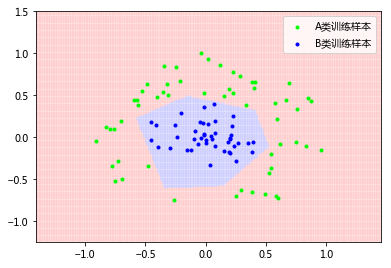

In [1]:
% matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import  tensorflow as tf
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd


class FFNNLayer:
    def __init__(self, input_size, output_size, act_func):
        w_init = tf.random.normal(shape=[input_size, output_size], mean=0, stddev=0.1, dtype=tf.float32)       # 给被训练的变量一个初始值
        b_init = tf.random.normal(shape=[output_size], mean=0, stddev=0.1, dtype=tf.float32)

        self.w = tf.Variable(initial_value=w_init)
        self.b = tf.Variable(initial_value=b_init)
        self.act_func = act_func
    def forward(self, data):
        # 加权求和
        a = tf.linalg.matmul(data, self.w)
        # 加偏置项
        a = tf.math.add(a, self.b)
        # 激活函数
        o = self.act_func(a)
        return o


class FFNNNet:
    def __init__(self, ffnn_struct):
        INPUT_SIZE = ffnn_struct[0][0]
        OUTPUT_SIZE = ffnn_struct[-1][1]
        self.x = tf.placeholder(dtype=tf.float32, shape=[None, INPUT_SIZE])      
        # 定义标签数据
        self.y = tf.placeholder(dtype=tf.float32, shape=[None, OUTPUT_SIZE])
        
        self.o = None
        
        input_data = self.x
        for input_size, output_size, act_func  in  ffnn_struct:
            layer = FFNNLayer(input_size=input_size, output_size=output_size, act_func=act_func)
            input_data = layer.forward(data=input_data)
            self.o = input_data
            
        self.session = tf.Session()
        global_v = tf.global_variables()
        op_init = tf.initializers.variables(global_v)
        self.session.run(op_init)
    
    def train(self, sample, labels, times=100000, learning_rate=0.01, verbose=False):
        loss = tf.losses.mean_squared_error(self.y, self.o)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
        trainer = optimizer.minimize(loss=loss)
        for time in range(times):
            _, loss_v = self.session.run(fetches=[trainer, loss], feed_dict={self.x: sample, self.y: labels})
            if verbose: 
                print(loss_v)
                
        
    def predict(self, test):
        predict = self.session.run(fetches=self.o, feed_dict={self.x: test})
        # print(predict)
        category=predict.argmax(axis=1)
        return category
    
    def visual(self, train_data, train_target):
        figure = plt.figure(figsize=(6, 4))
        # 创建坐标
        ax = figure.add_axes([0.1, 0.1, 0.8, 0.8], label='分类可视化')

        # 2. 可视化平面网格
        # 网格区域数据
        grid_x = train_data[:, 0]     # 第1个特征数据
        grid_y = train_data[:, 1]     # 第2个特征数据
        # 获取网格的数据区域返回
        min_x, max_x = grid_x.min(), grid_x.max()
        min_y, max_y = grid_y.min(), grid_y.max()

        # 为了防止数据样本点绘制在边界，可以适当扩大网格区域
        min_x -= 0.5; max_x += 0.5
        min_y -= 0.5; max_y += 0.5

        # 根据区域设置坐标轴的范围
        ax.set_xbound(lower=min_x, upper=max_x)
        ax.set_ybound(lower=min_y, upper=max_y)

        # x, y进行等分
        tick_x, tick_y =  np.mgrid[min_x:max_x:200j , min_y:max_y:200j]
        # 形成网格坐标
        grid_plane = np.stack([tick_x.flat, tick_y.flat], axis=1) 

        # 使用训练的神经网络，来预测生成的网格，并不同对不同的结果使用不同的颜色绘制
        grid_predict = self.session.run(fetches=self.o, feed_dict={self.x: grid_plane})
        # 把预测结果转换成0，1，2三种状态
        z = grid_predict.argmax(axis=1)
        # 三类样本的绘制颜色
        colors = mpl.colors.ListedColormap([(1.0, 0.8, 0.8, 0.5),  (0.8, 1.0, 0.8, 0.5),  (0.8, 0.8, 1.0, 0.5)])
        # 使用pyplot绘制
        ax.pcolormesh(tick_x, tick_y, z.reshape(tick_x.shape), cmap=colors)

        # 3. 可视化训练样本数据集
        a_x = train_data[np.where(train_target==0), 0] 
        a_y = train_data[np.where(train_target==0), 1] 
        b_x = train_data[np.where(train_target==1), 0] 
        b_y = train_data[np.where(train_target==1), 1] 

        ax.scatter(x=a_x, y=a_y, marker='.', color=(0, 1, 0, 1), label='A类训练样本')
        ax.scatter(x=b_x, y=b_y, marker='.', color=(0, 0, 1, 1), label='B类训练样本')

        ax.legend()
        plt.show()


ffnn_struct = [
    [2, 4, tf.nn.relu],
    [4, 3, tf.nn.relu],
    [3, 2, tf.math.sigmoid]
]
net = FFNNNet(ffnn_struct)
data = pd.read_csv('train_data.csv')

train_data = data[['feature1','feature2']]
train_target = data['label']
train_data = np.array(train_data)
train_target = np.array(train_target)

train_target[train_target == -1.0] = 0
# print(np.where(train_target==1))
# print(train_target==1)

# 把训练的标签数据格式化成前面定义的3个特征输出格式
labels = np.zeros(shape=[len(train_target), 2], dtype=np.float32)
labels[np.where(train_target==0), 0] = 1
labels[np.where(train_target==1), 1] = 1


net.train(train_data, labels, verbose=True)
result = net.predict(train_data)
print(result)
net.visual(train_data,train_target)



神经网络的非线性性可以从这个例子得到证明。
线性与非线性性，与训练的数据特征还有关系。